In [170]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [171]:
# open the csv
dataframe = pd.read_csv("full-dataset.csv")


In [172]:
dataframe.describe()

ID          SES       PERIPH       JEWISH    ALLOCATION  \
count  1785.000000  1785.000000  1785.000000  1785.000000   1773.000000   
mean    128.000000     5.011204     4.961905     0.667787   2976.851100   
std      73.632221     2.363514     1.895742     0.471139   3526.301571   
min       1.000000     1.000000     1.000000     0.000000      0.000000   
25%      64.000000     3.000000     4.000000     0.000000   1253.000000   
50%     128.000000     5.000000     5.000000     1.000000   2405.000000   
75%     192.000000     7.000000     6.000000     1.000000   3656.000000   
max     255.000000    10.000000    10.000000     1.000000  53775.000000   

             YEAR  YEAR_2014=ref.  DIST_FROM_TLV  JEWS_PERCENT   MAJORITY=1  \
count  1785.00000     1785.000000    1495.000000   1785.000000  1785.000000   
mean   2017.00000        2.995518      70.402609     62.412829     0.667787   
std       2.00056        2.003635      50.956805     44.634865     0.471139   
min    2014.00000        0.000000       0.000000      0.000000     0.000000   
25%    2015.00000        1.000000      23.300000      0.000000     0.000000   
50%    2017.00000        3.000000      75.100000     92.000000     1.000000   
75%    2019.00000        5.000000     105.400000     97.800000     1.000000   
max    2020.00000        6.000000     321.700000    100.000000     1.000000   

       Teachers-skills    immigrant  Special-Education  \
count      1778.000000  1774.000000        1778.000000   
mean         35.819460     1.590192           5.344769   
std           9.560195     2.100287           3.071064   
min           0.000000     0.000000           0.000000   
25%          30.000000     0.000000           3.000000   
50%          37.000000     1.000000           5.000000   
75%          42.000000     2.000000           7.000000   
max          77.000000    15.000000          29.000000   

       Matriculation-eligibility  Excellent-matriculation-eligibility  \
count                1556.000000                          1556.000000   
mean                   73.273779                             8.109897   
std                    18.695794                             7.067256   
min                     0.000000                             0.000000   
25%                    65.000000                             3.000000   
50%                    77.000000                             7.000000   
75%                    87.000000                            11.000000   
max                   100.000000                            57.000000   

              Math   Class-size  Teacher-student-ratio  Social-involvement  
count  1556.000000  1771.000000            1778.000000          200.000000  
mean     13.290488    26.761717              11.002812           58.915000  
std       8.805388     2.773303               3.713955           10.668027  
min       0.000000     8.000000               3.000000           32.000000  
25%       7.000000    25.000000              10.000000           51.000000  
50%      12.000000    27.000000              11.000000           59.000000  
75%      18.000000    28.000000              12.000000           67.000000  
max      80.000000    35.000000              67.000000           90.000000

# Valid Columns

## Percentage of notnull values

In [173]:
def percentage_of_not_null_col(col):
    return col.count() / len(col)

In [174]:
# print the percentage of not null values for each column
# as a table format
print(dataframe.apply(percentage_of_not_null_col, axis=0))

RASHUT                                 1.000000
ID                                     1.000000
SES                                    1.000000
PERIPH                                 1.000000
JEWISH                                 1.000000
ALLOCATION                             0.993277
YEAR                                   1.000000
YEAR_2014=ref.                         1.000000
DIST_FROM_TLV                          0.837535
JEWS_PERCENT                           1.000000
MAJORITY=1                             1.000000
Teachers-skills                        0.996078
immigrant                              0.993838
Special-Education                      0.996078
Matriculation-eligibility              0.871709
Excellent-matriculation-eligibility    0.871709
Math                                   0.871709
Class-size                             0.992157
Teacher-student-ratio                  0.996078
Social-involvement                     0.112045
dtype: float64


"Social-involvement" can be dropped because it's missing most of the values.

In [175]:
cleaned_df = dataframe.drop("Social-involvement", axis=1)

## Checking that every Rashut is tested foreach year

In [176]:
for rashut_id in cleaned_df.ID.unique():
    if set(cleaned_df.YEAR[cleaned_df.ID == rashut_id].tolist()) != set(range(2014, 2021)):
        print(rashut_id)

# Imputation

After droping the columns, we will impute missing values with probably regression imputation.
==TODO==

# Graphs

## SES - Social Economic Status

In [177]:
# plot the SES column (histogram)
sn.displot(cleaned_df["SES"], kde=True, rug=False, bins=20)

Next we'd like to see if there's a Rashut that changed it's SES over the years.

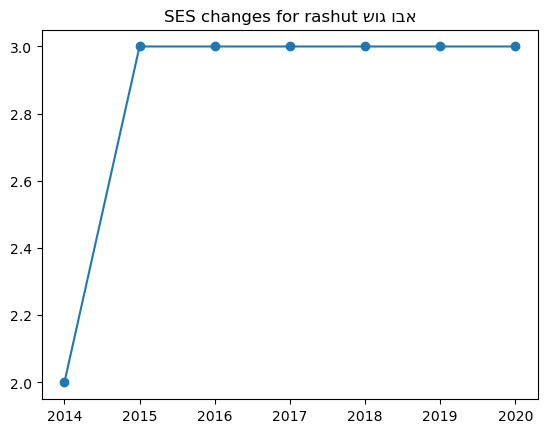

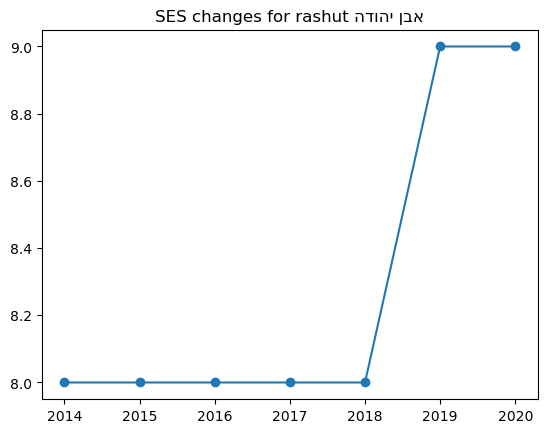

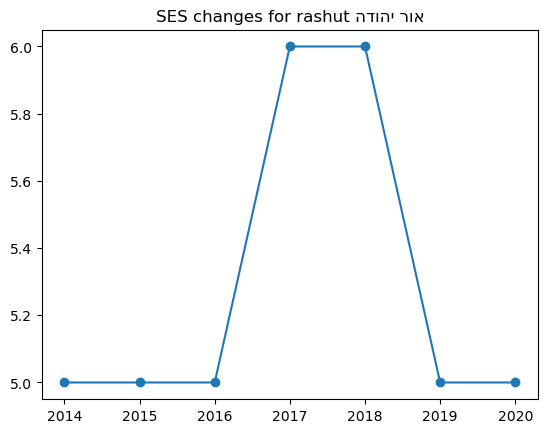

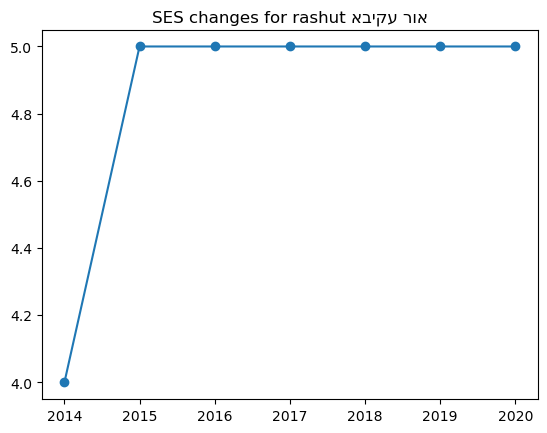

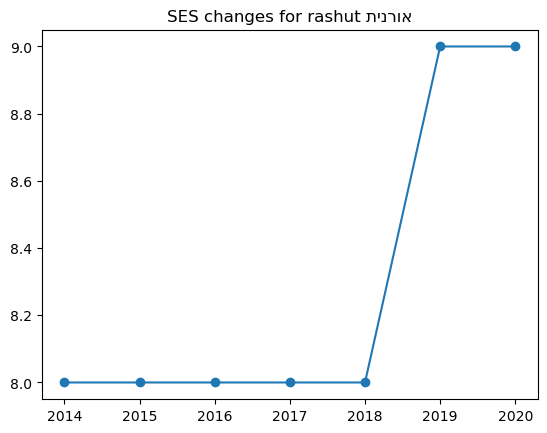

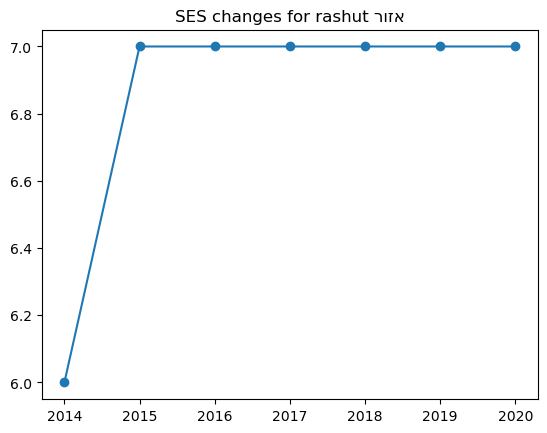

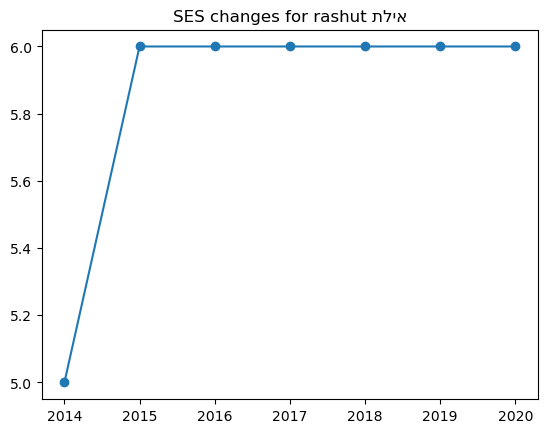

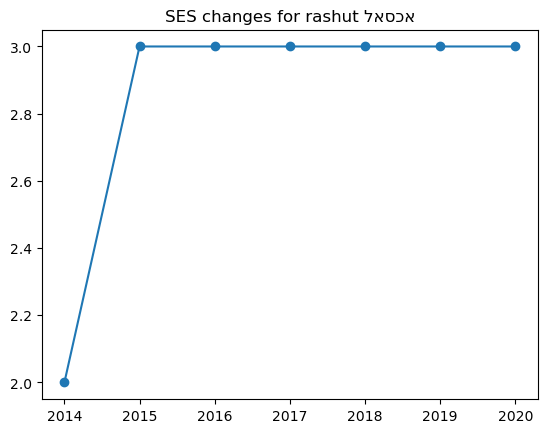

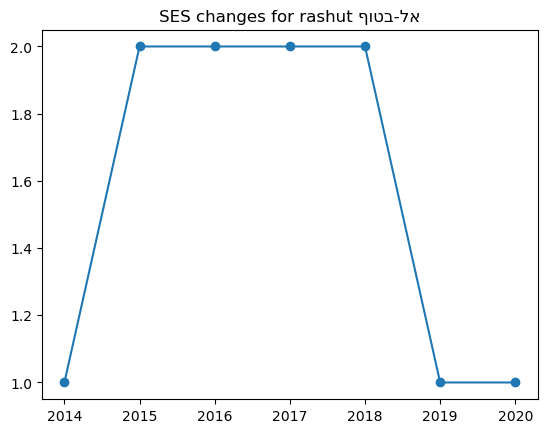

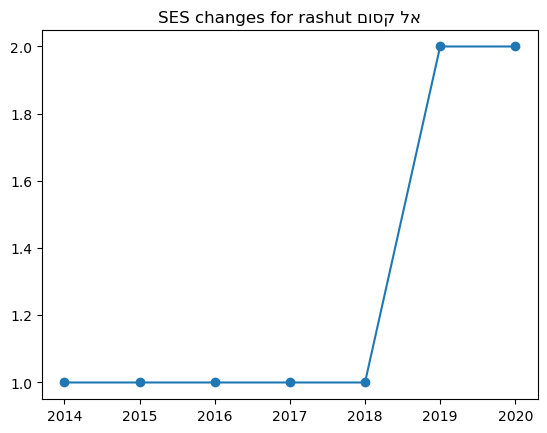

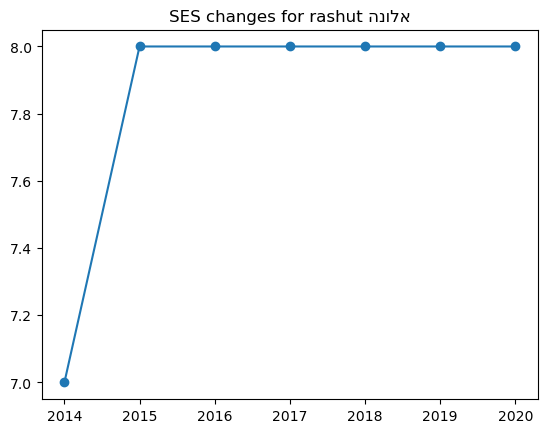

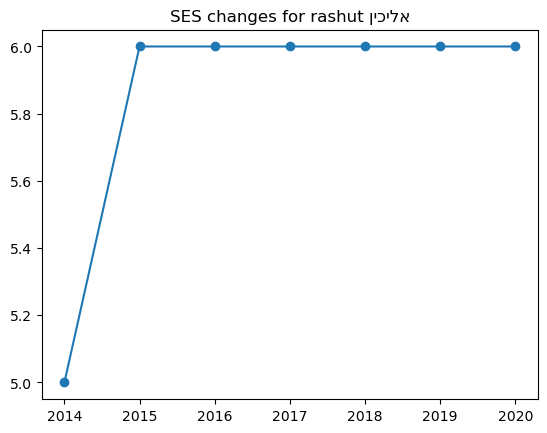

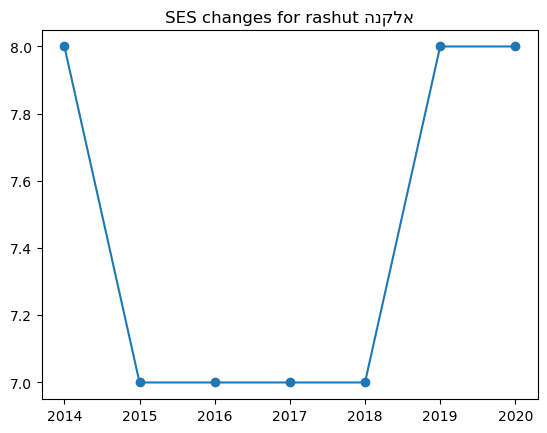

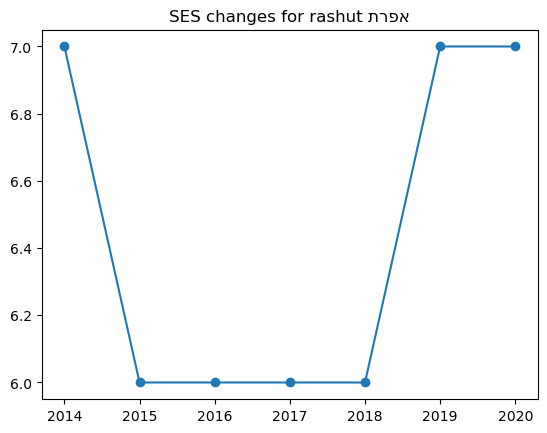

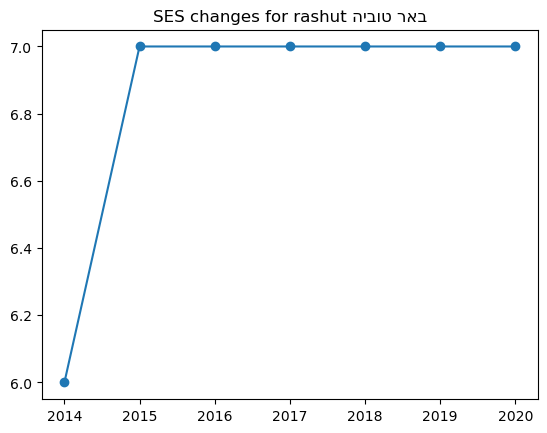

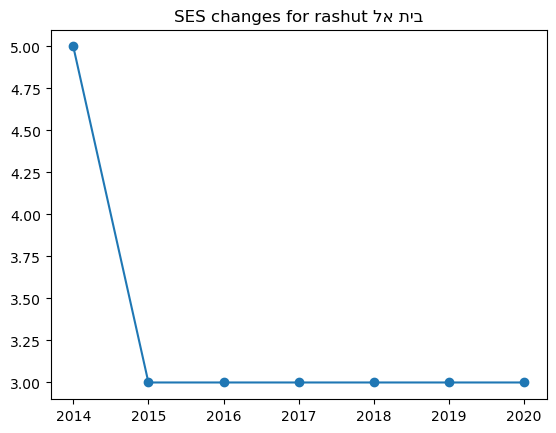

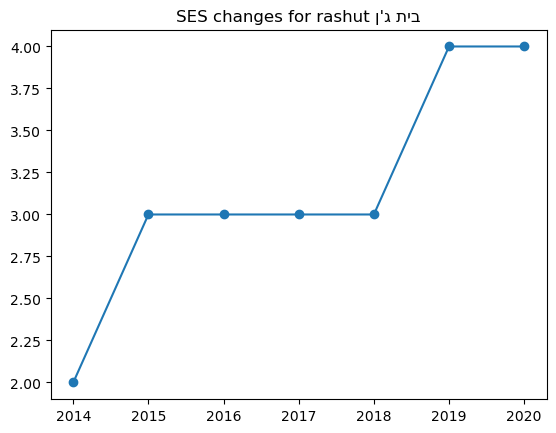

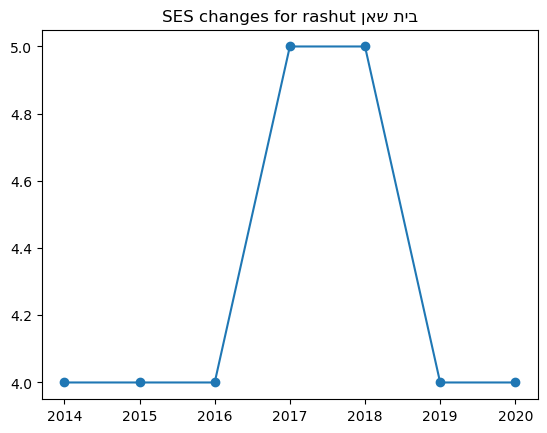

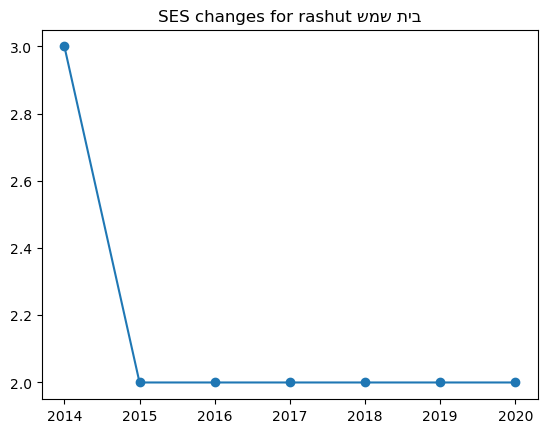

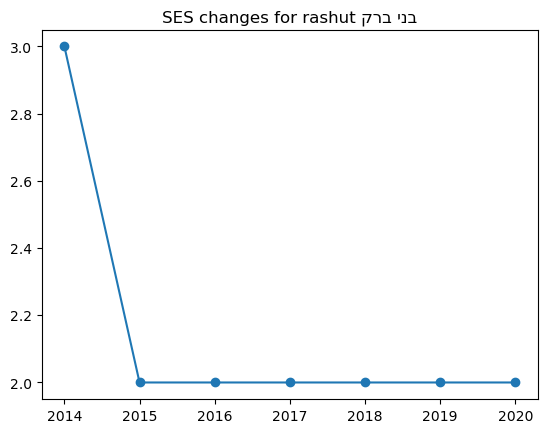

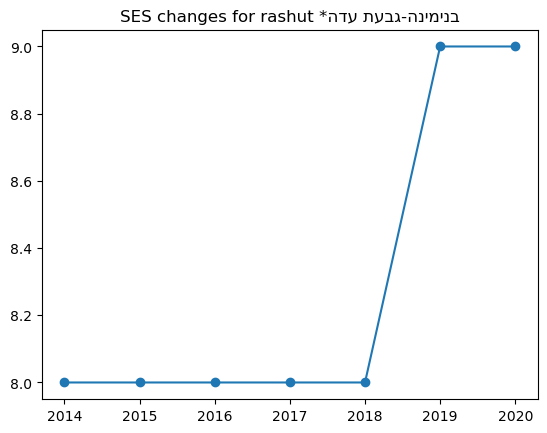

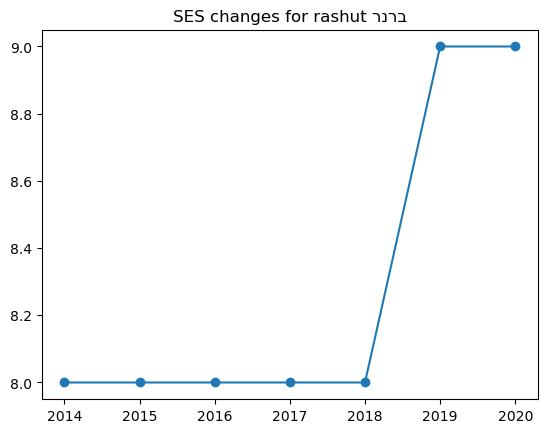

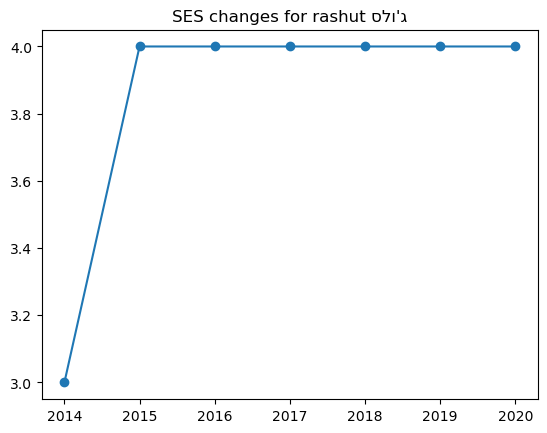

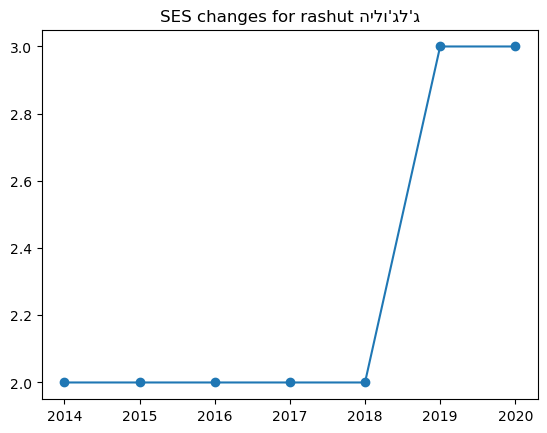

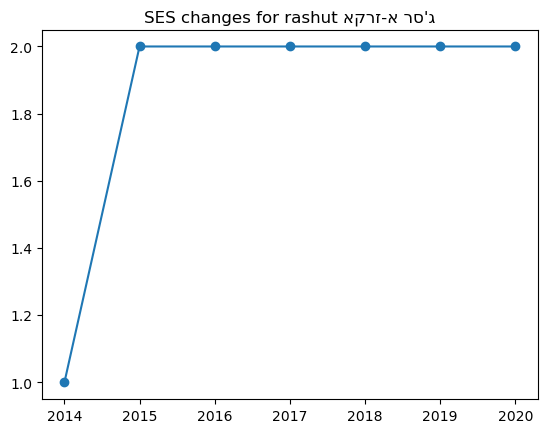

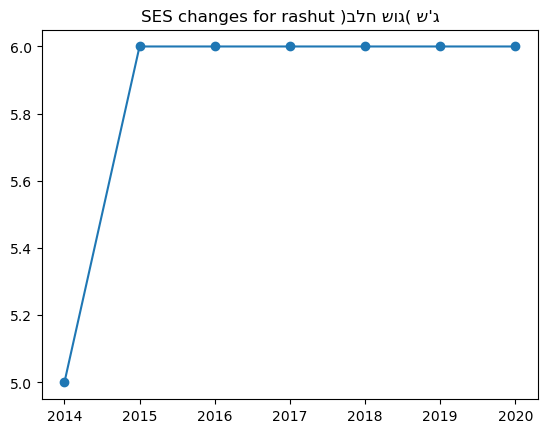

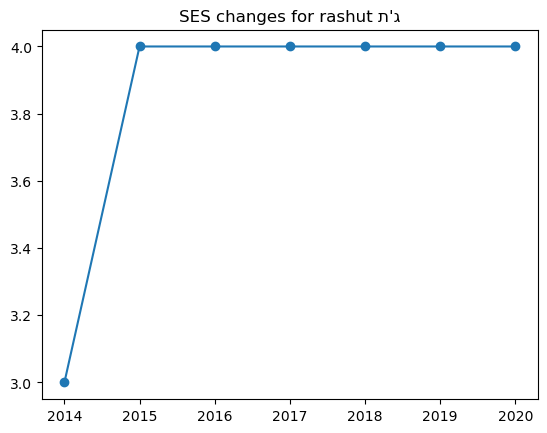

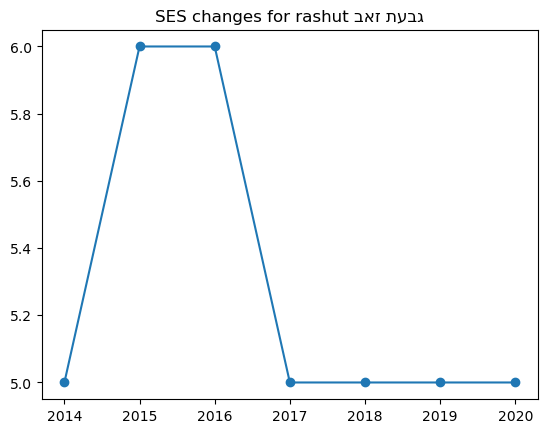

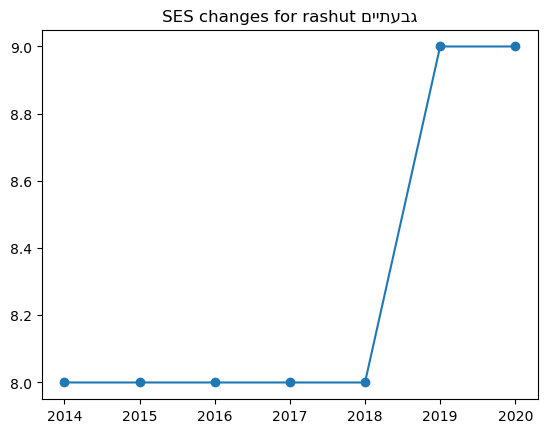

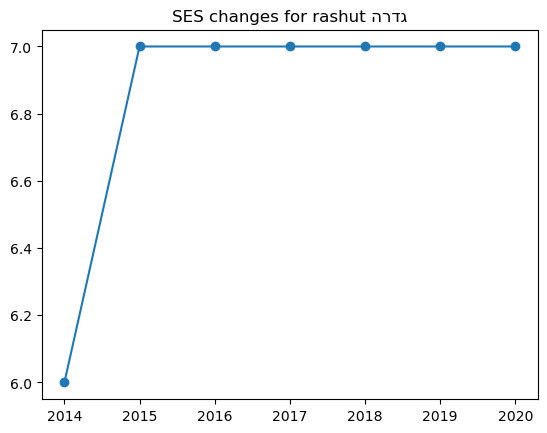

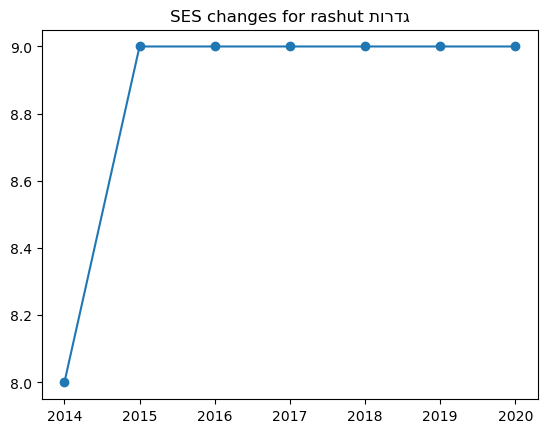

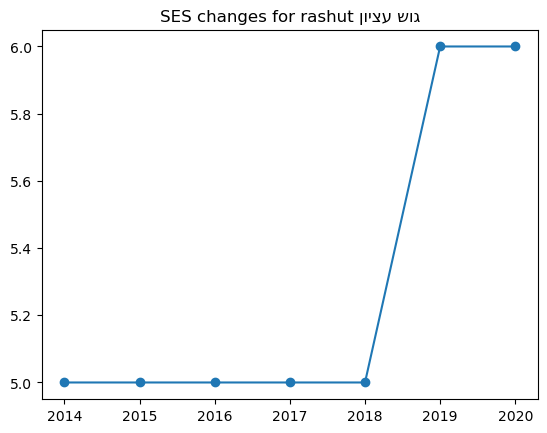

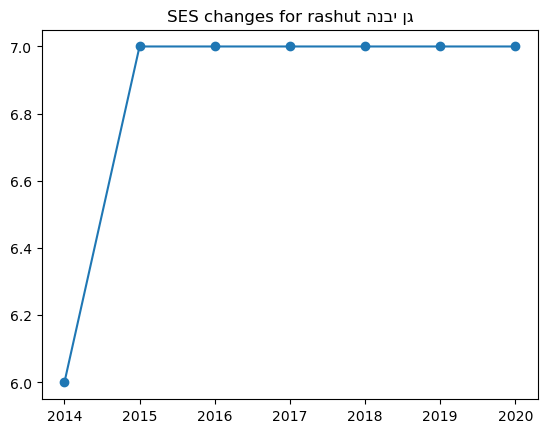

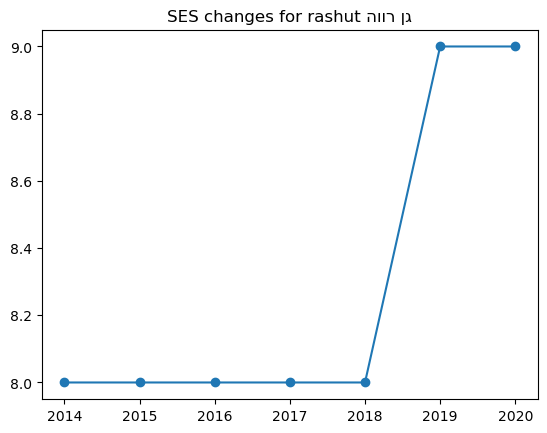

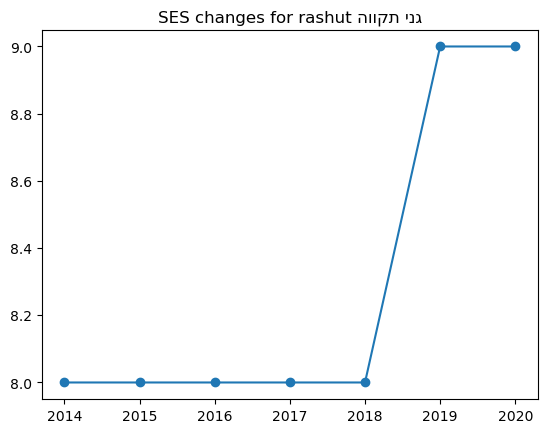

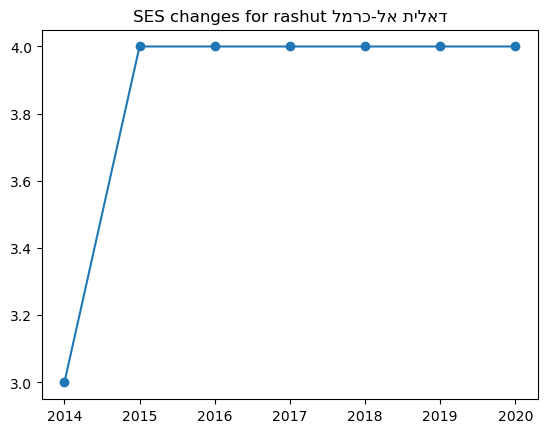

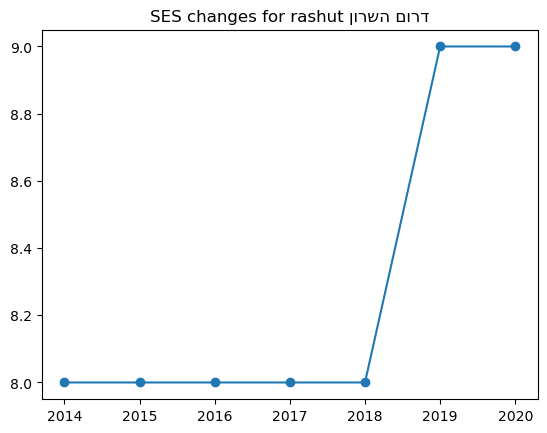

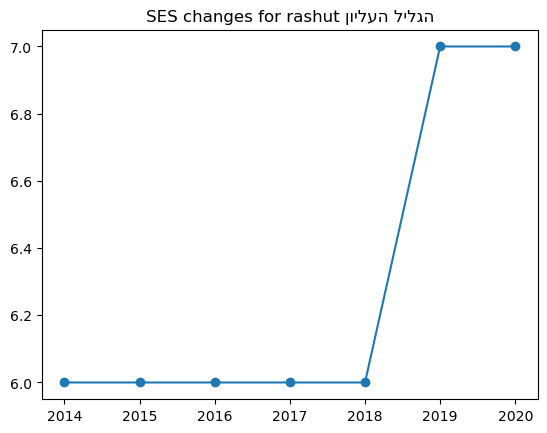

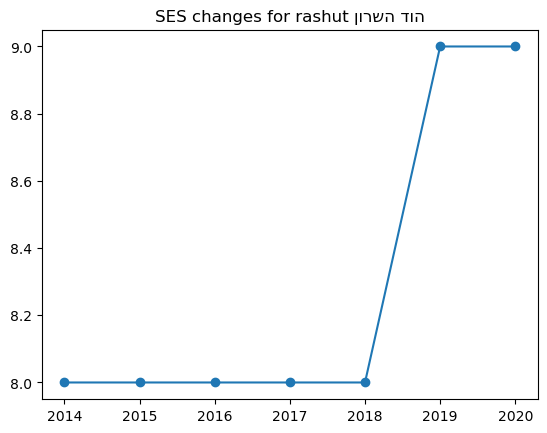

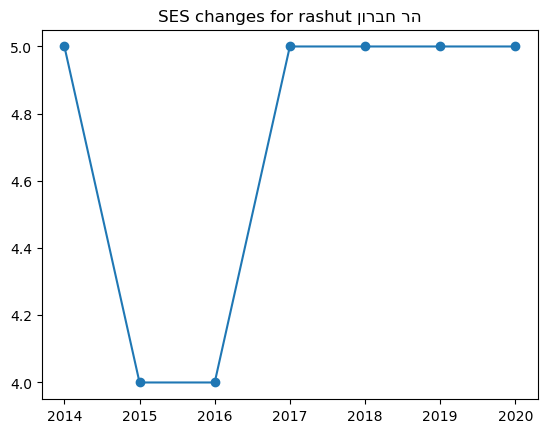

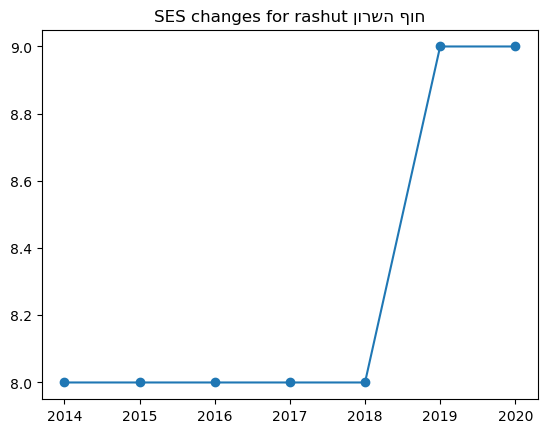

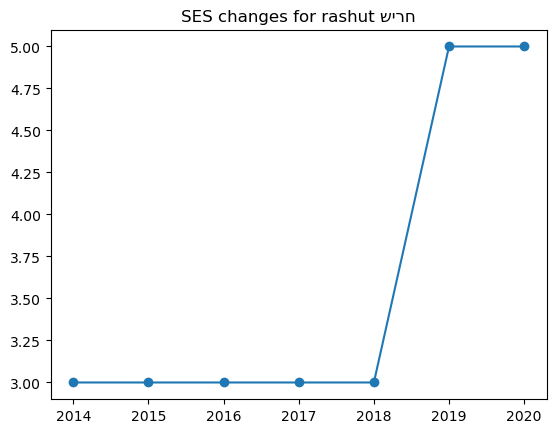

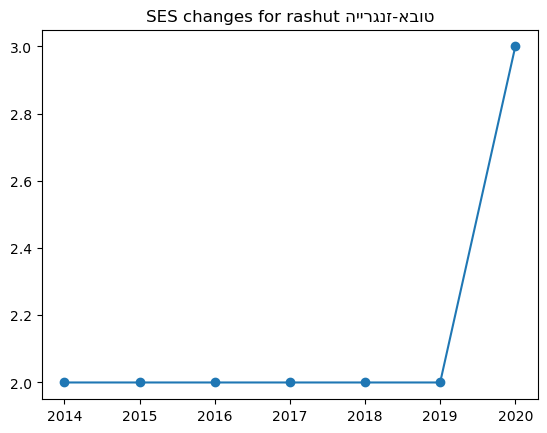

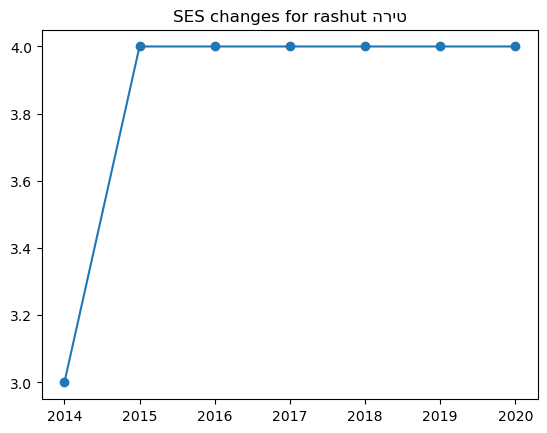

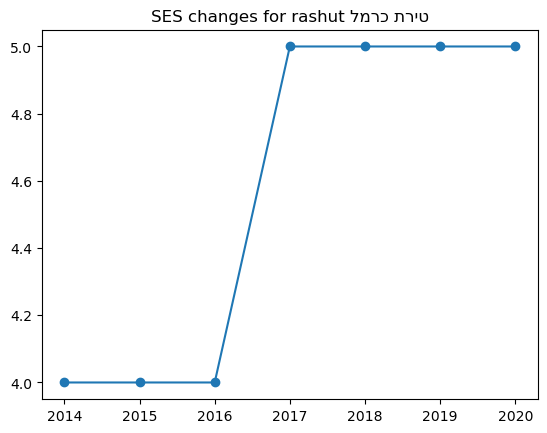

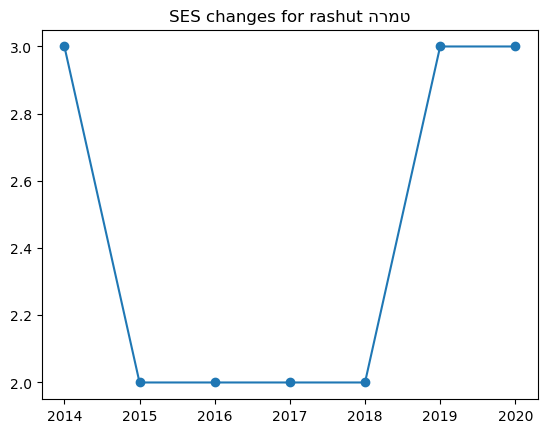

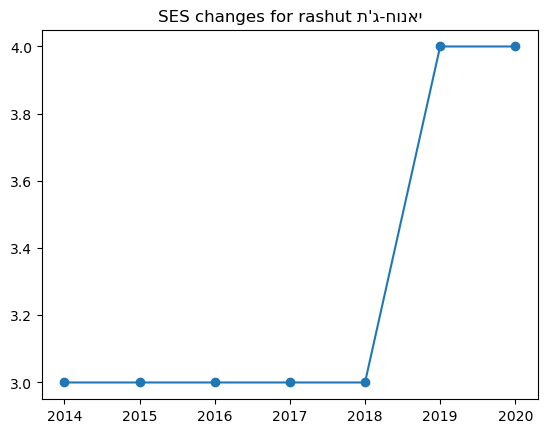

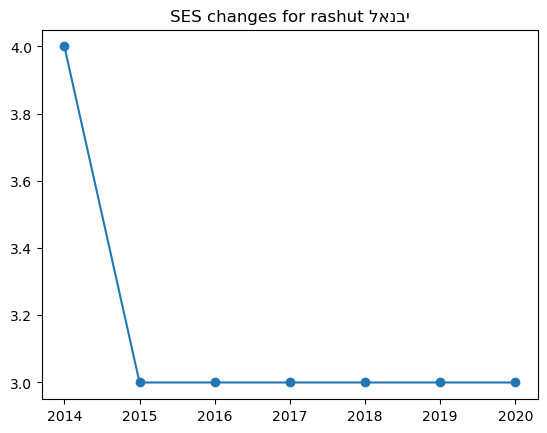

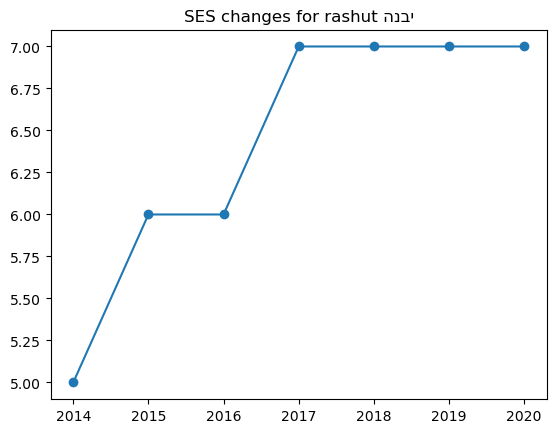

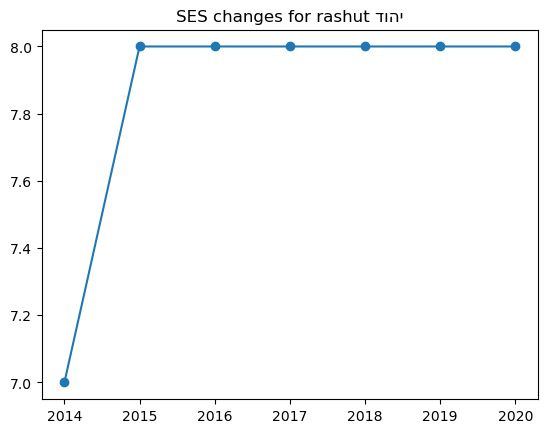

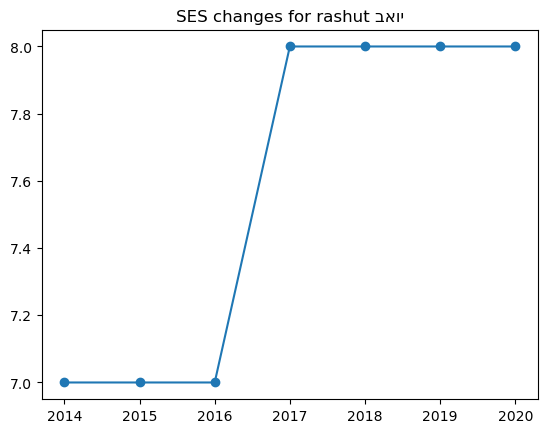

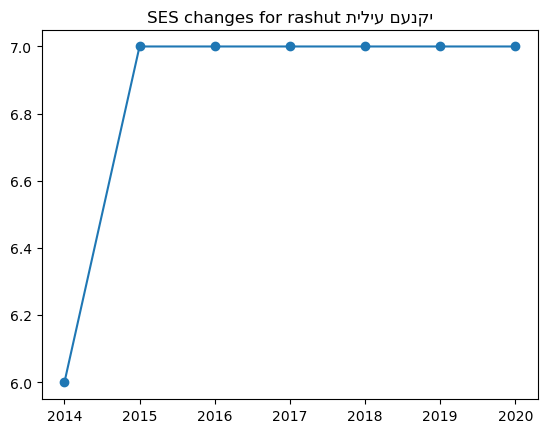

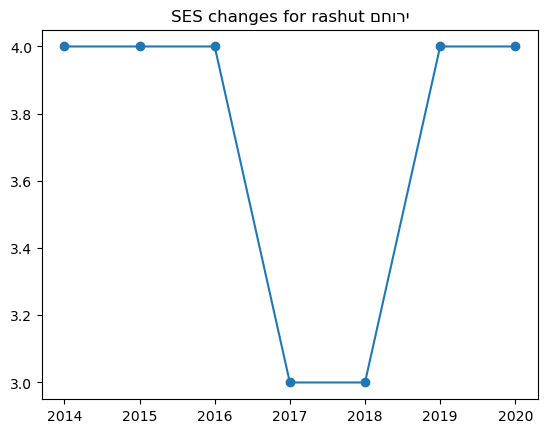

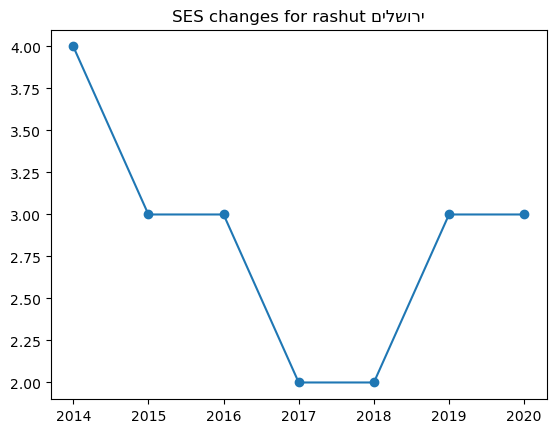

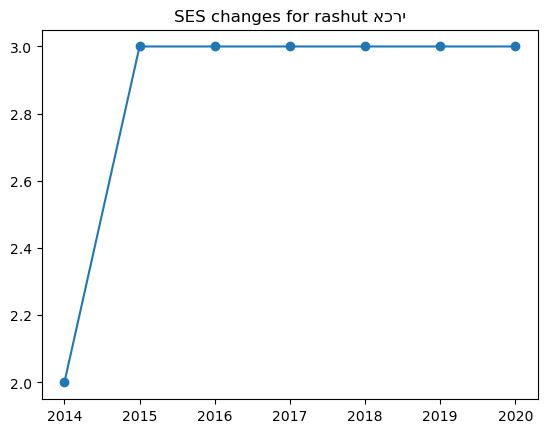

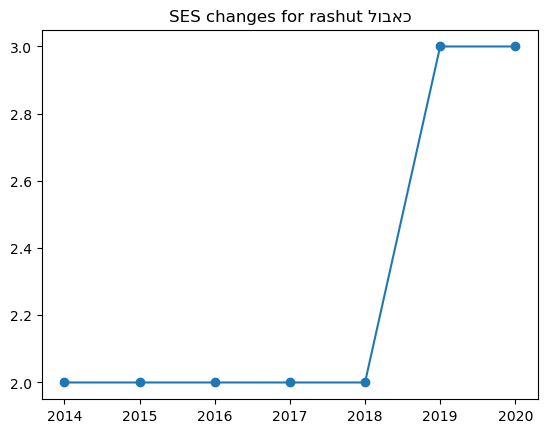

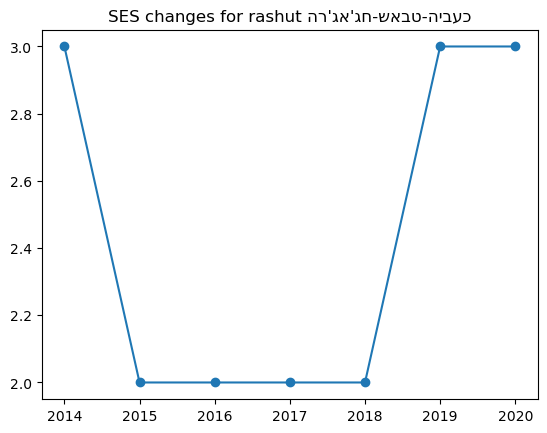

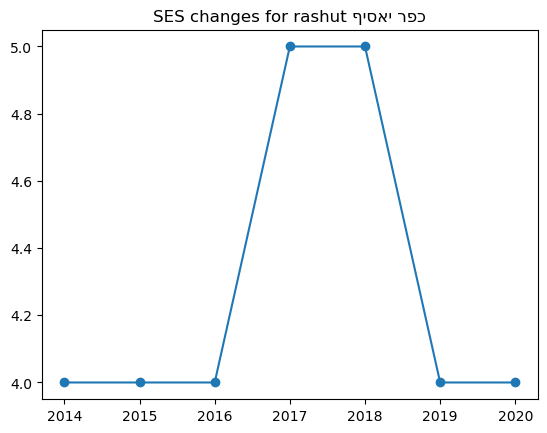

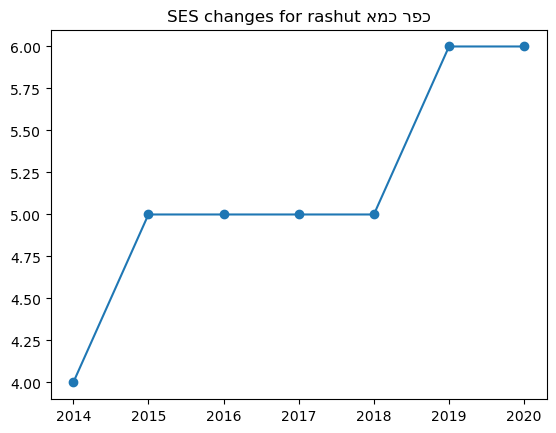

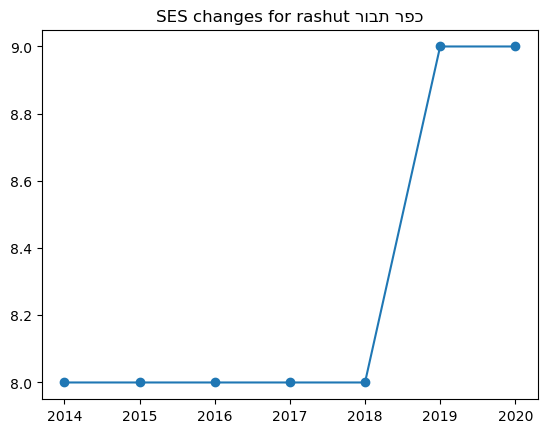

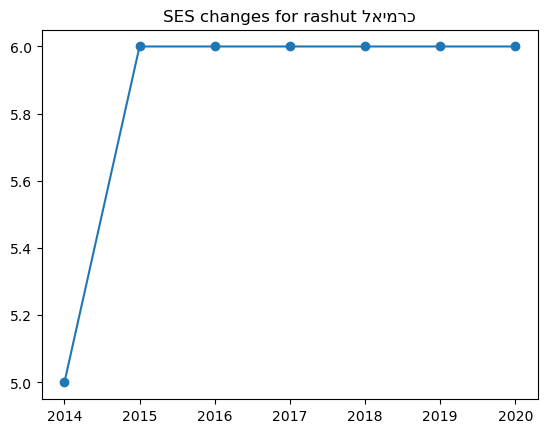

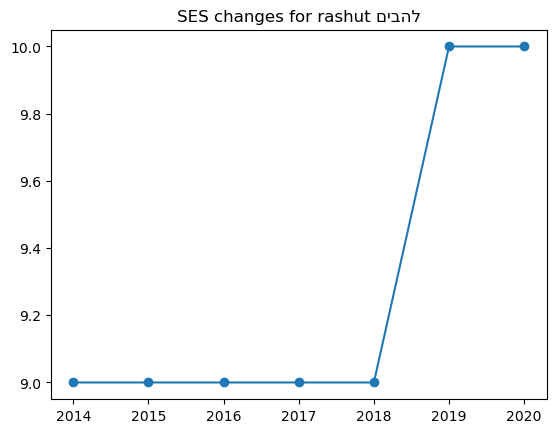

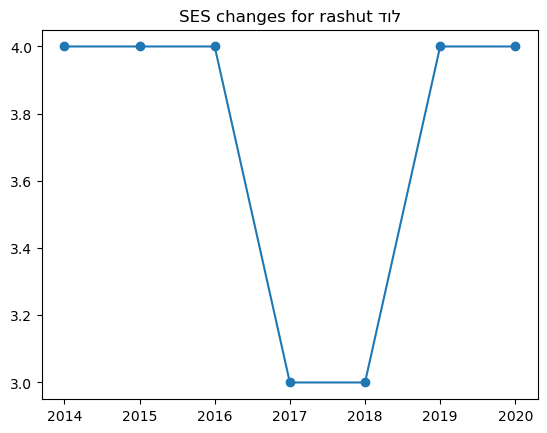

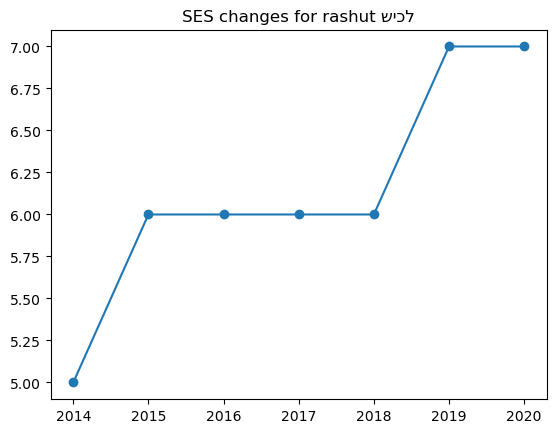

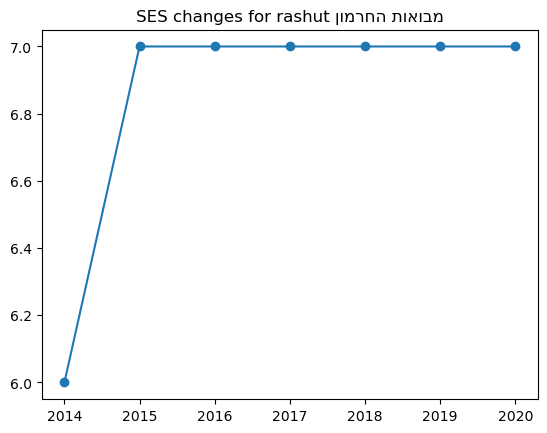

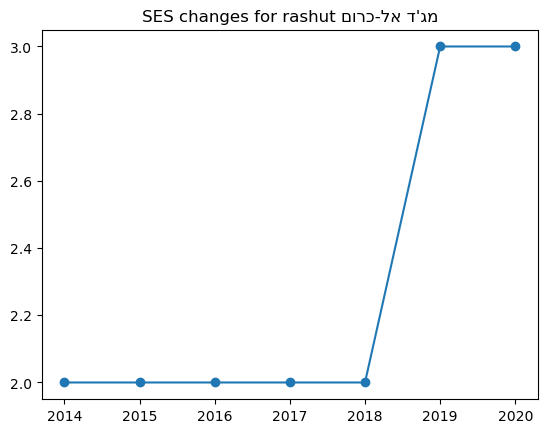

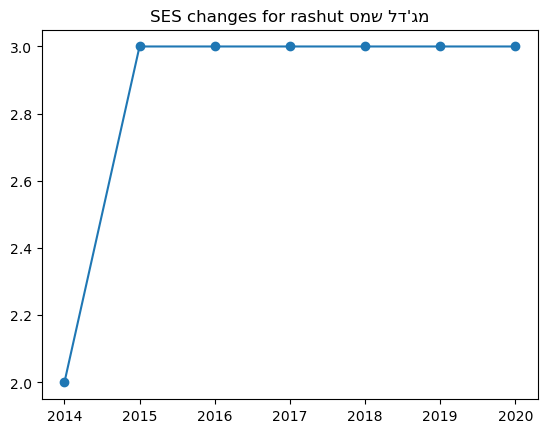

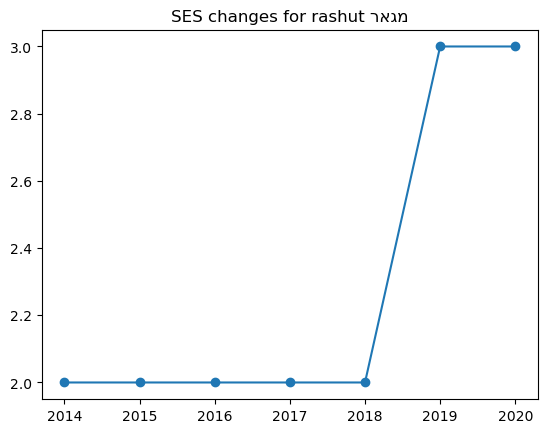

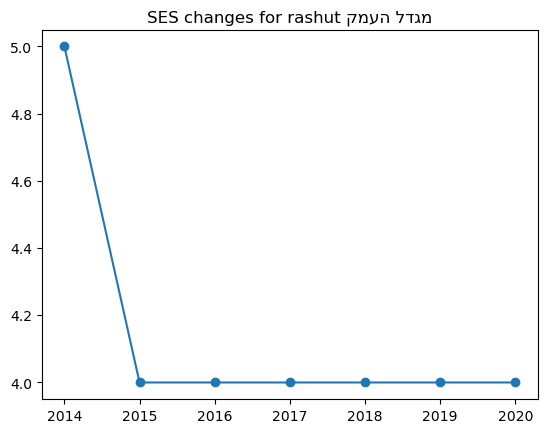

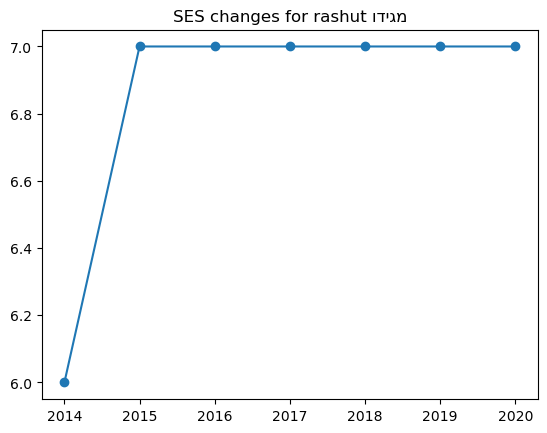

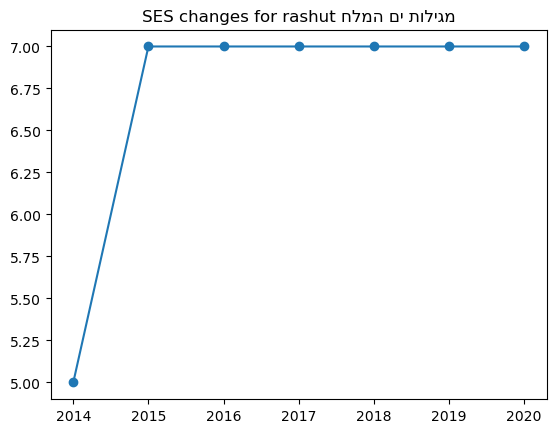

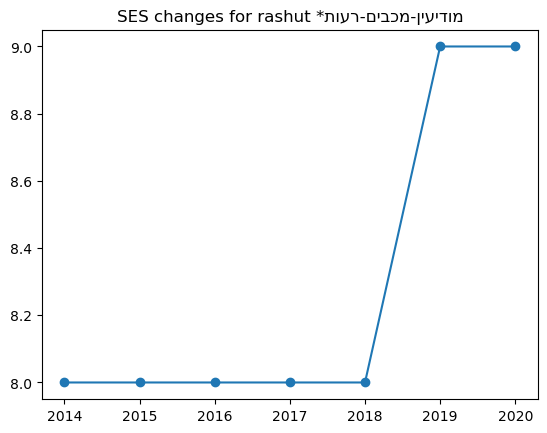

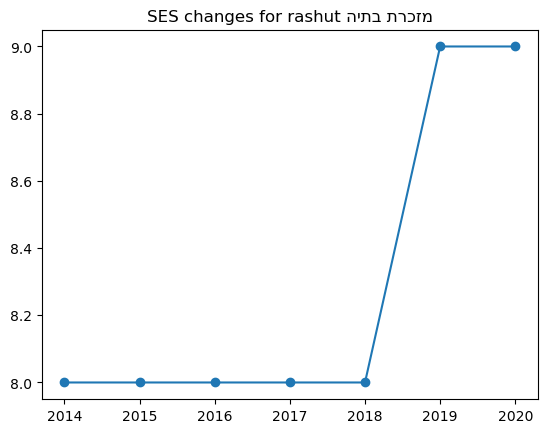

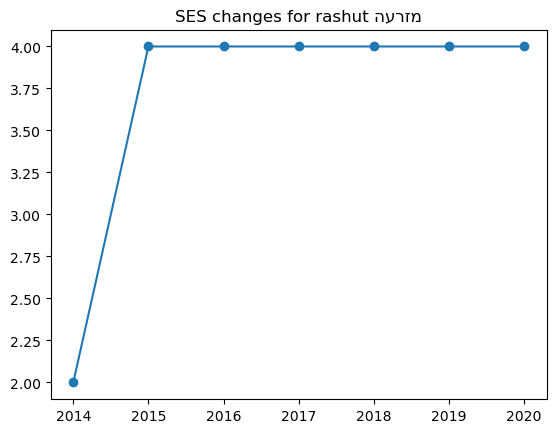

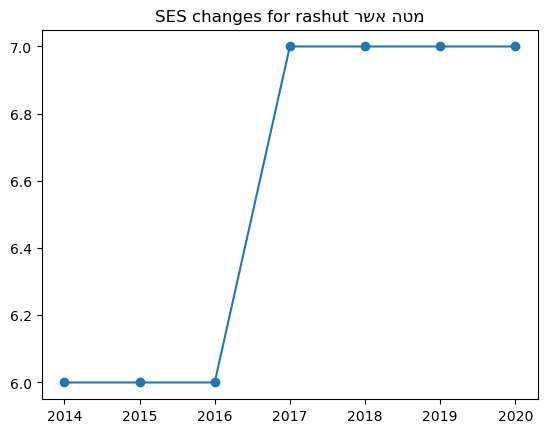

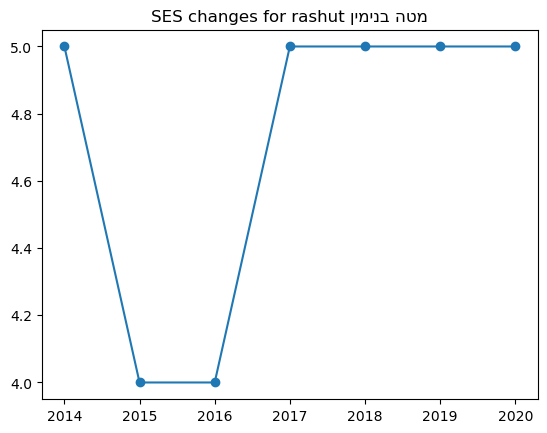

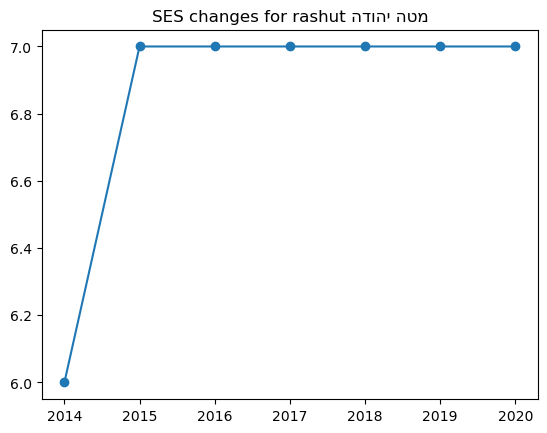

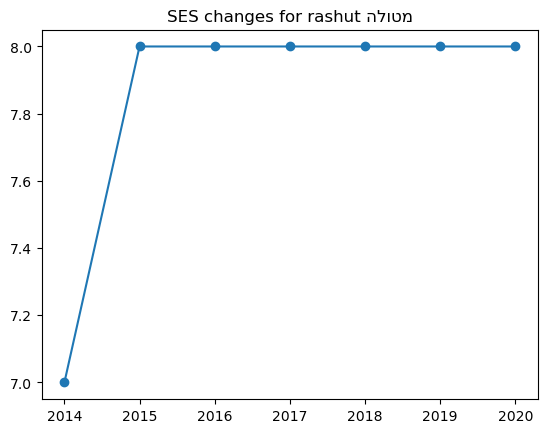

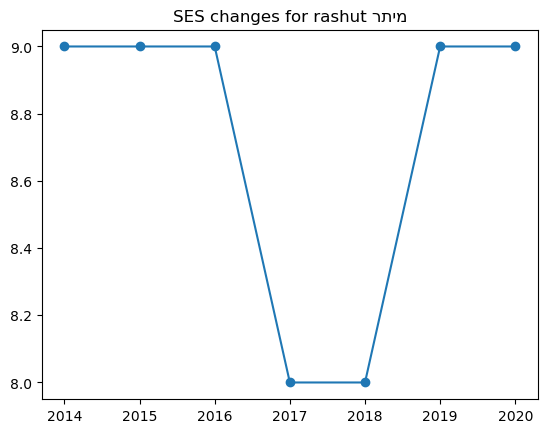

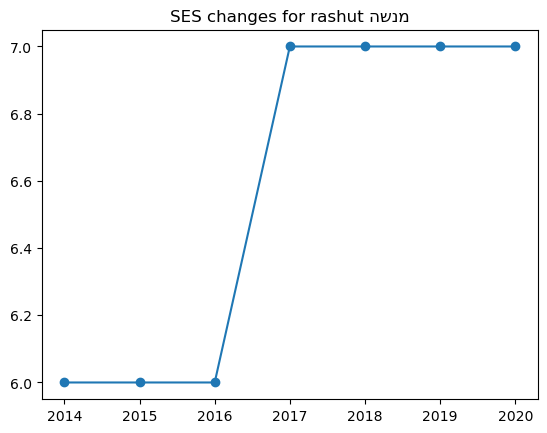

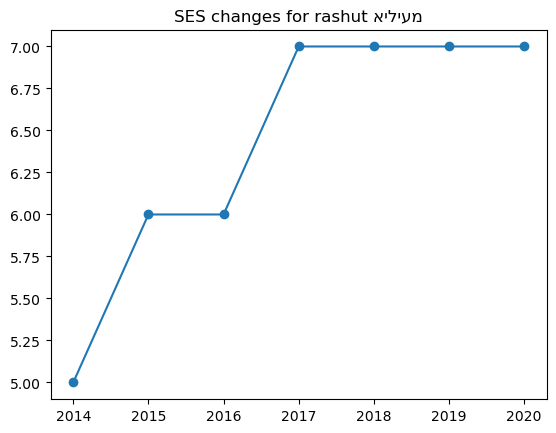

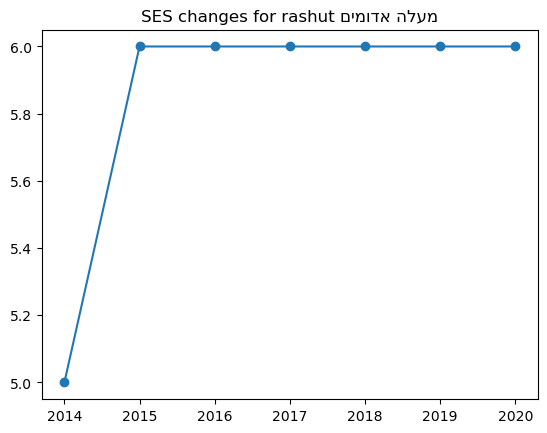

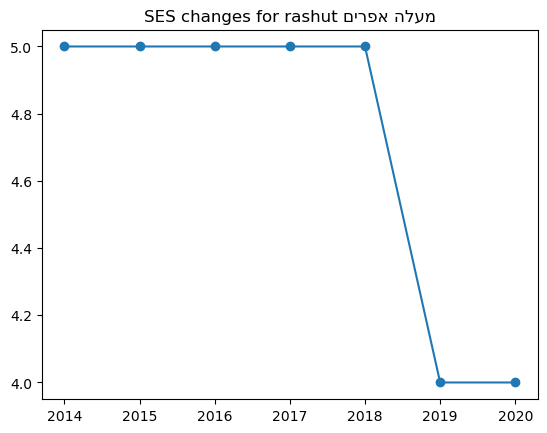

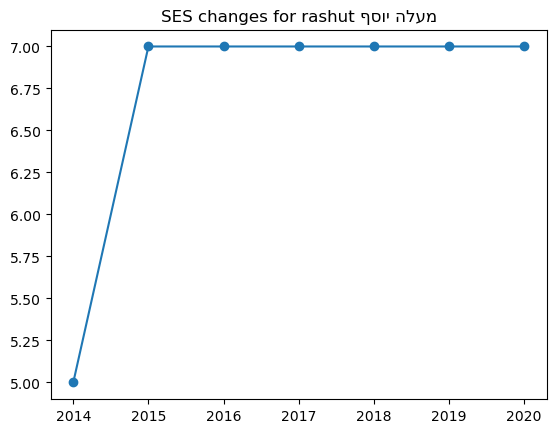

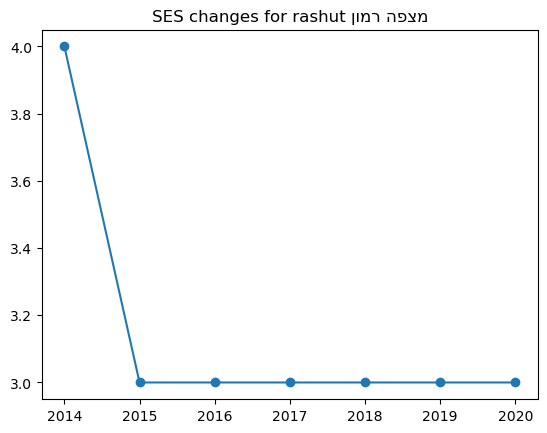

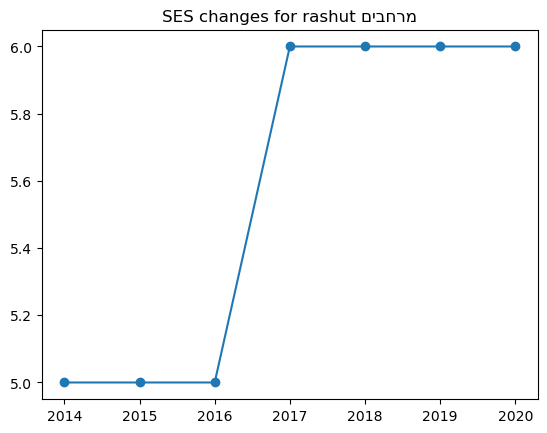

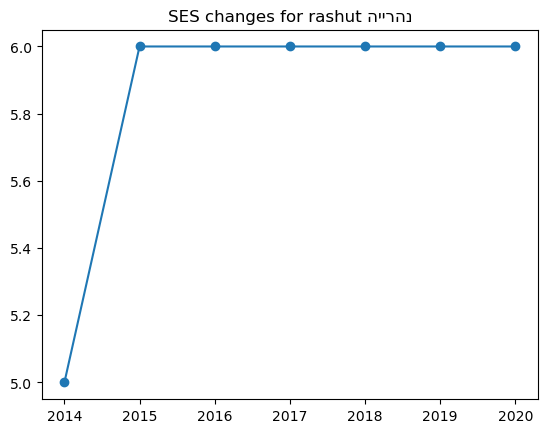

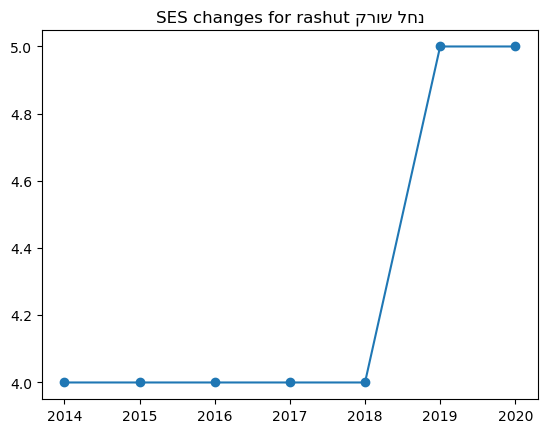

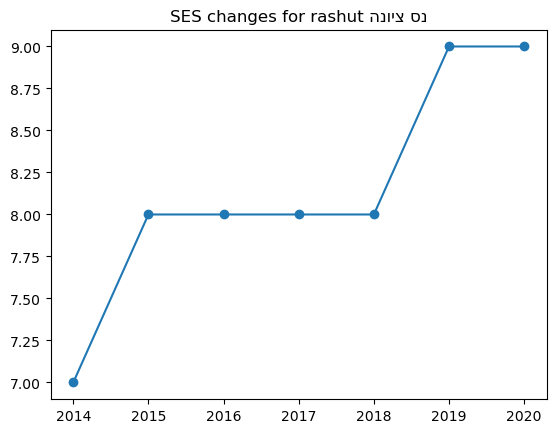

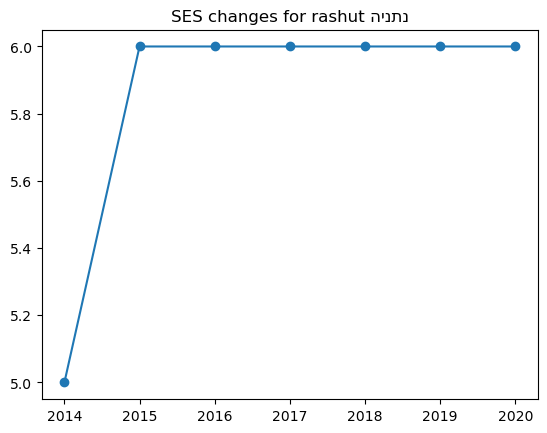

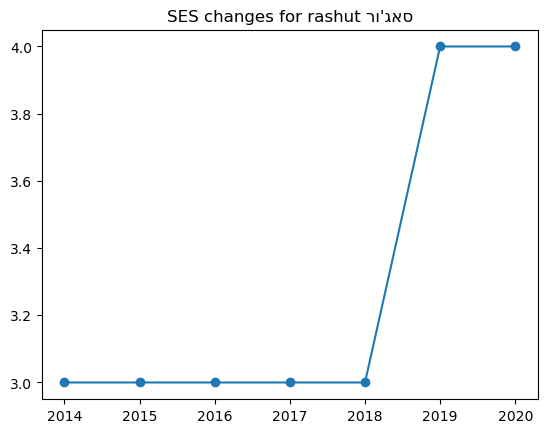

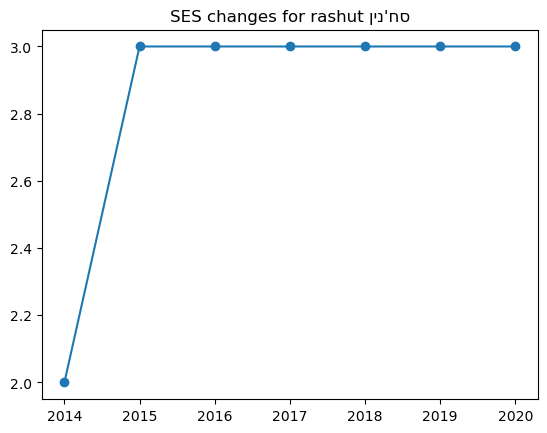

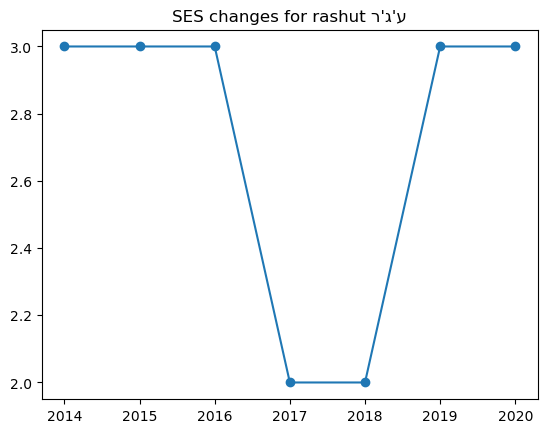

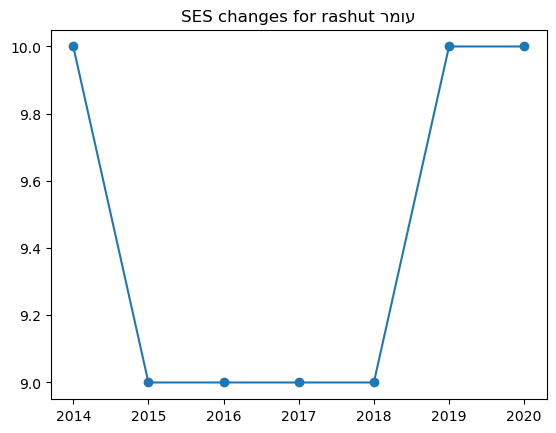

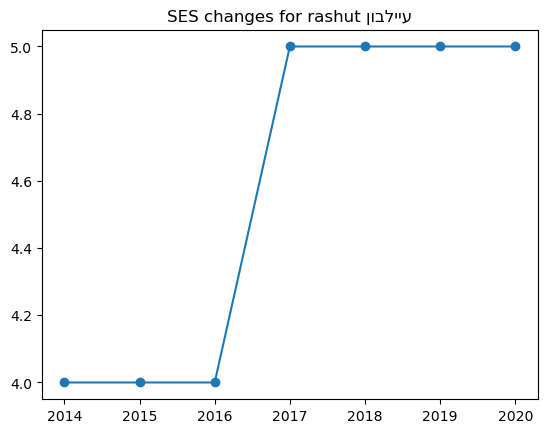

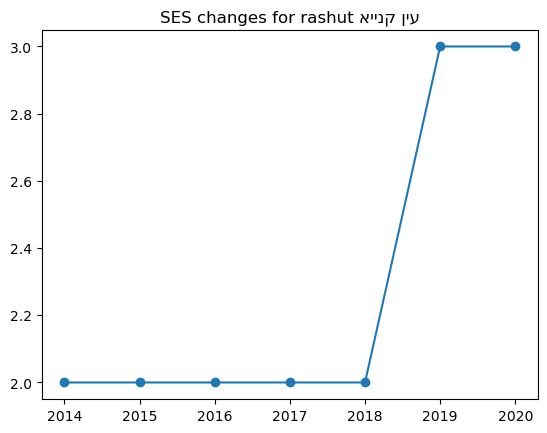

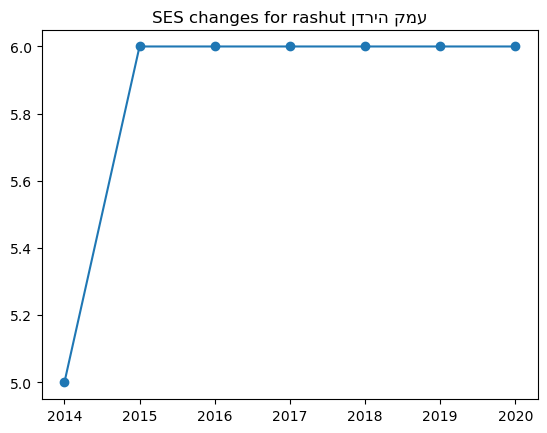

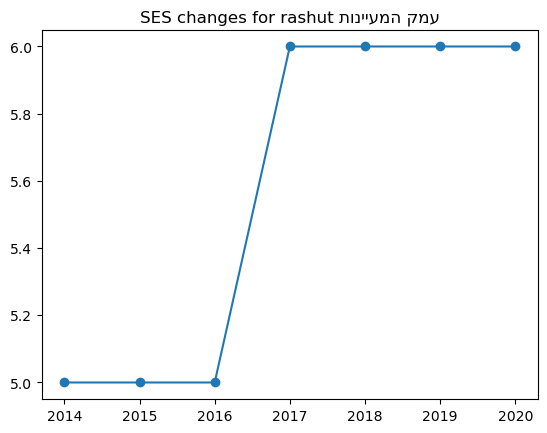

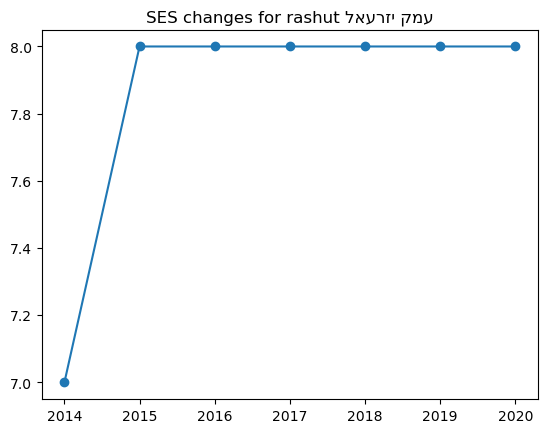

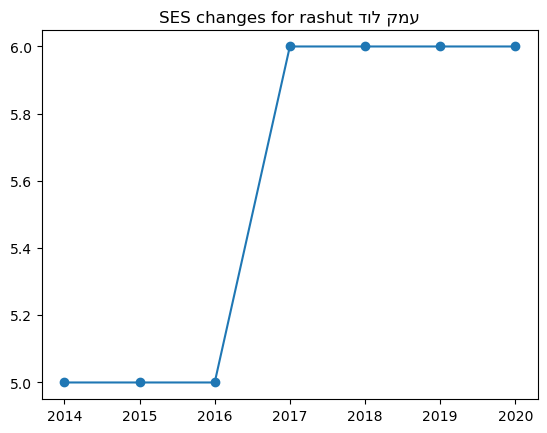

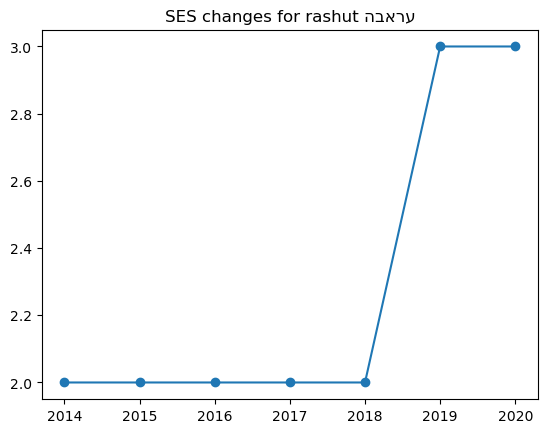

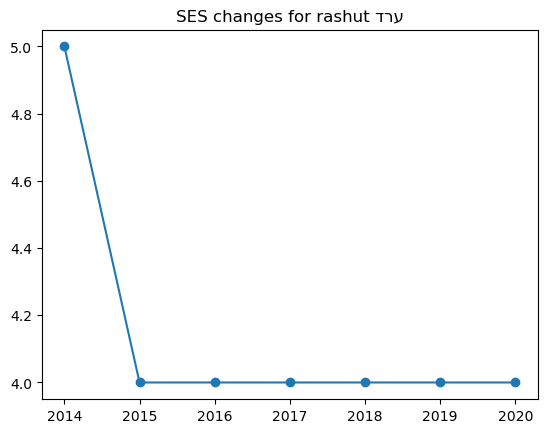

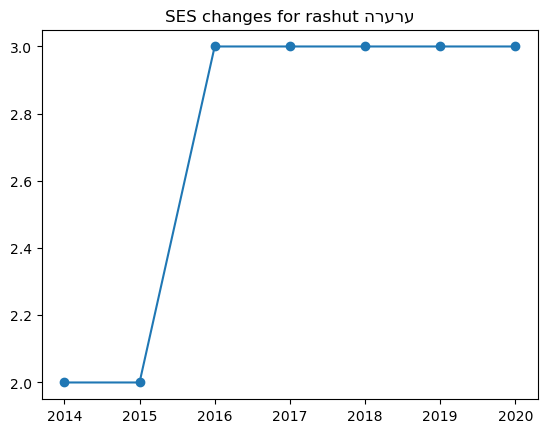

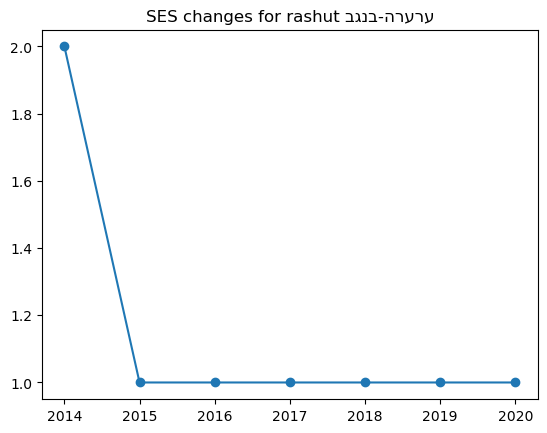

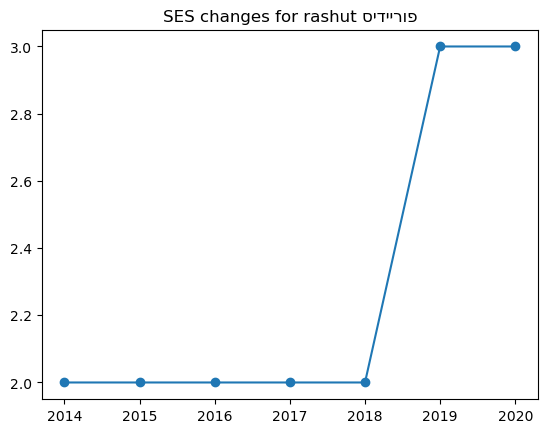

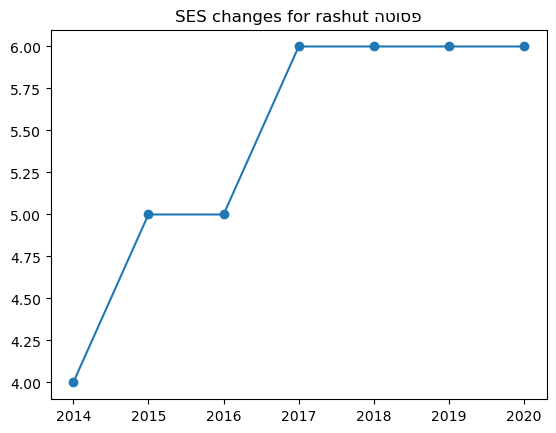

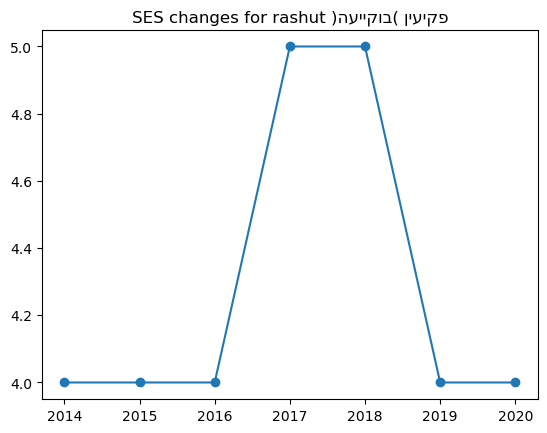

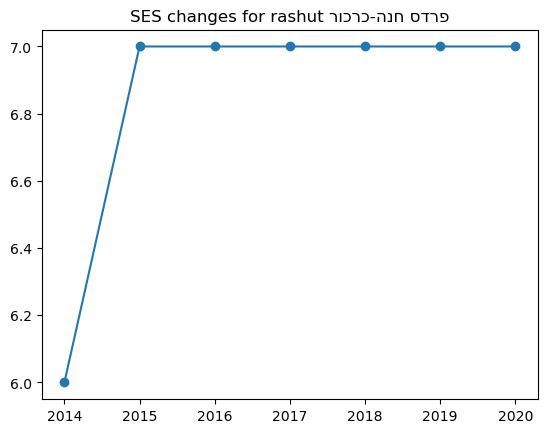

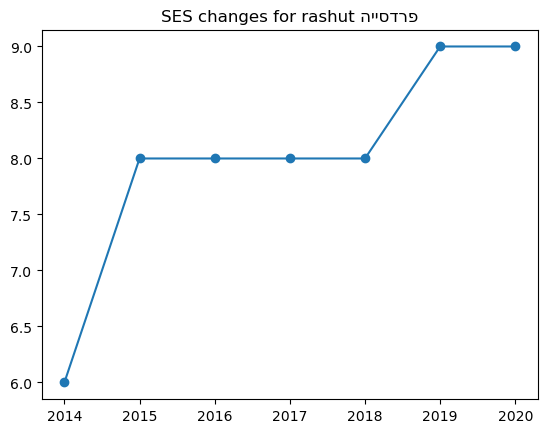

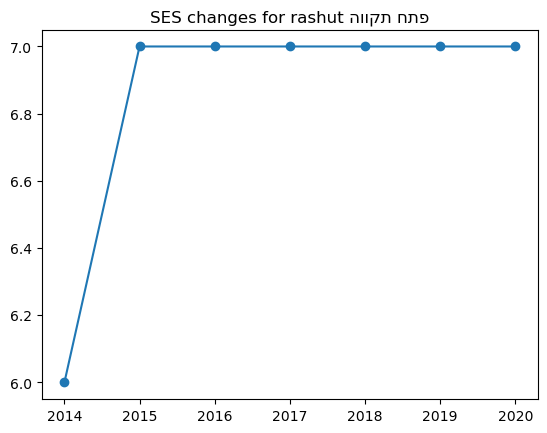

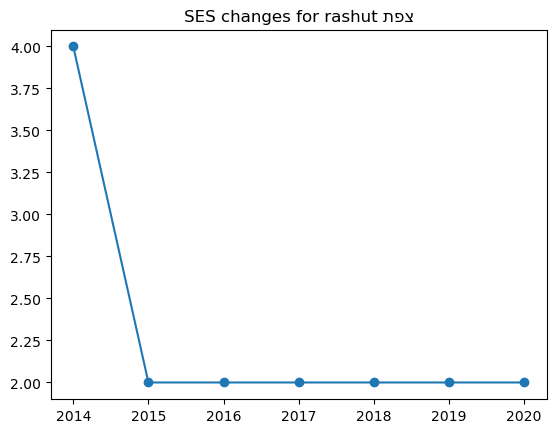

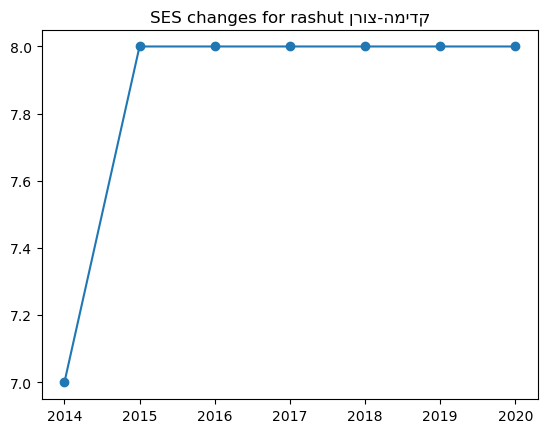

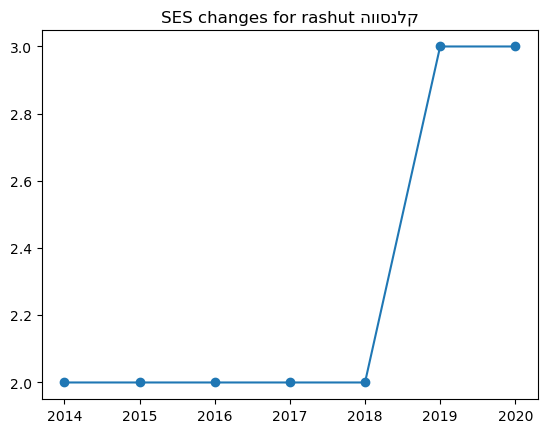

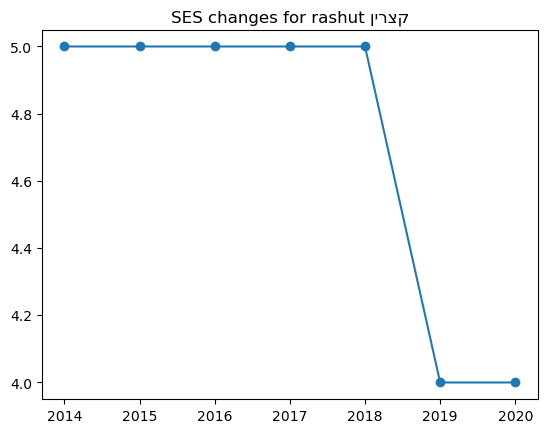

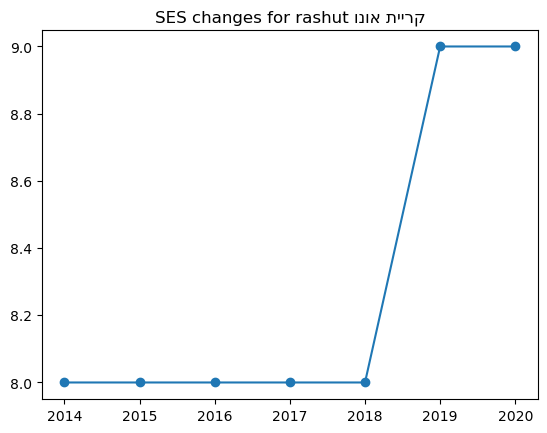

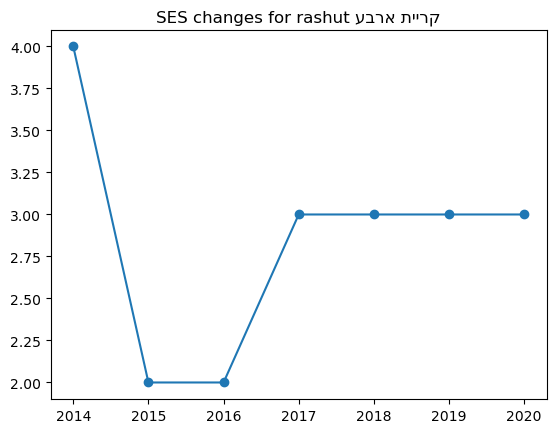

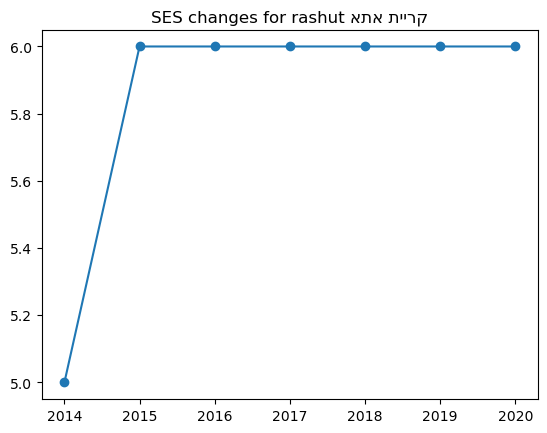

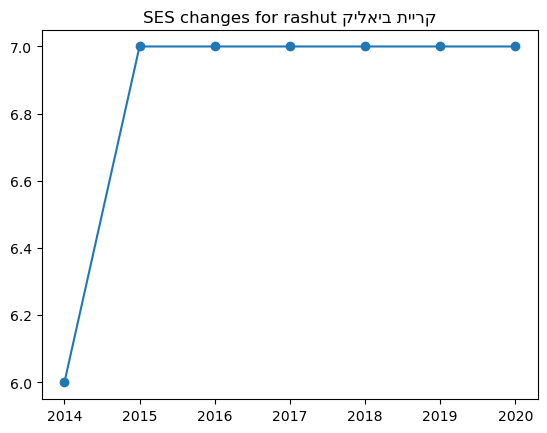

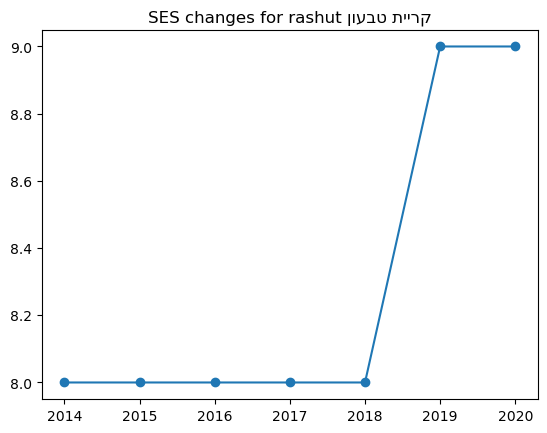

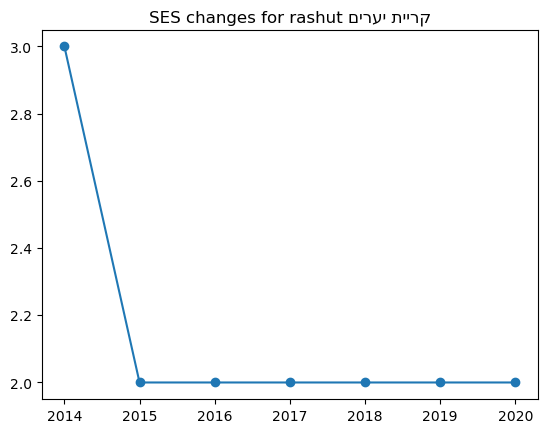

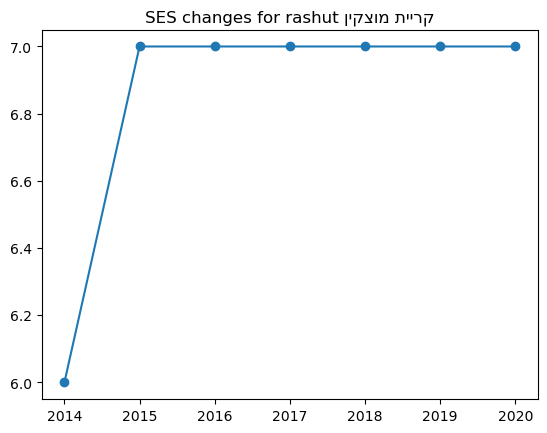

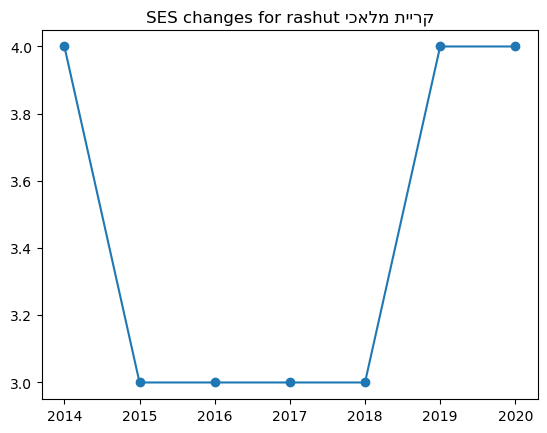

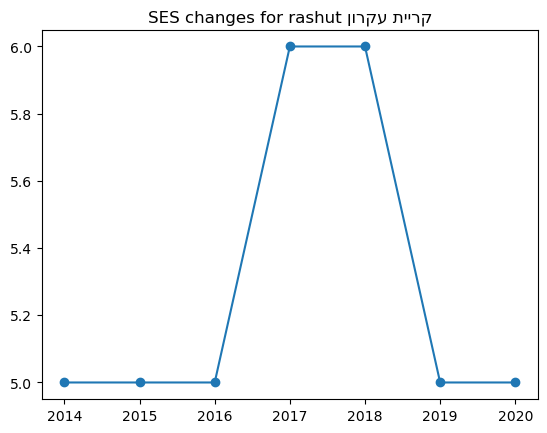

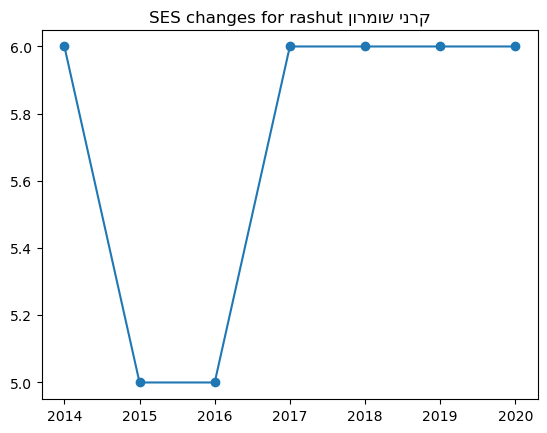

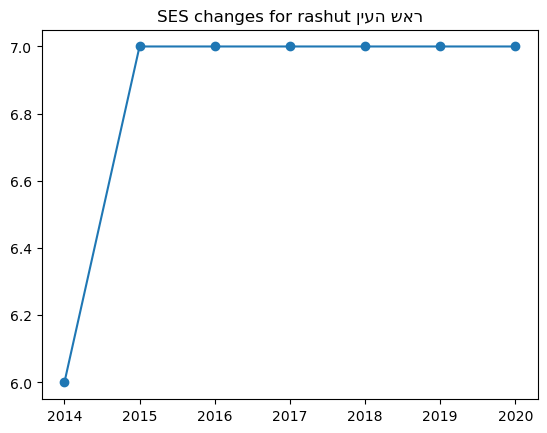

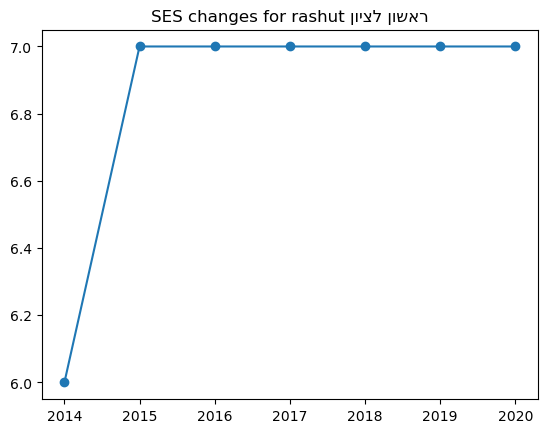

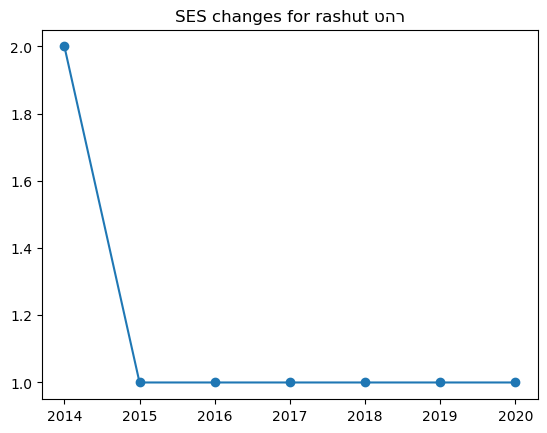

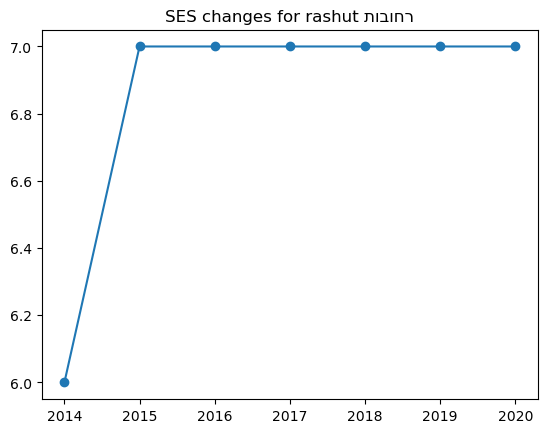

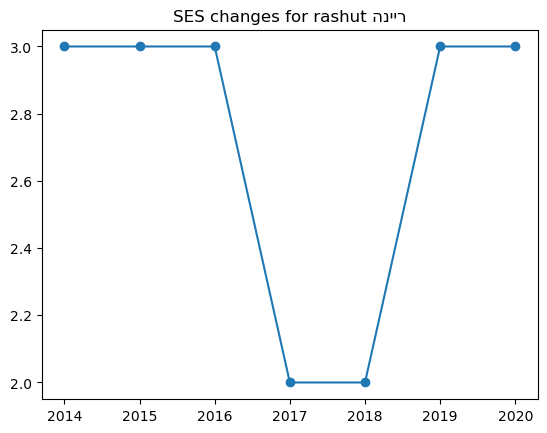

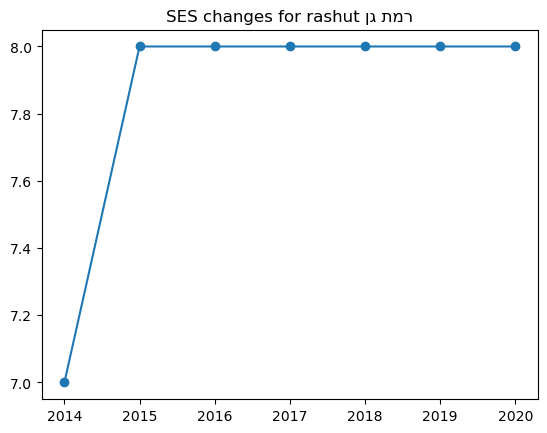

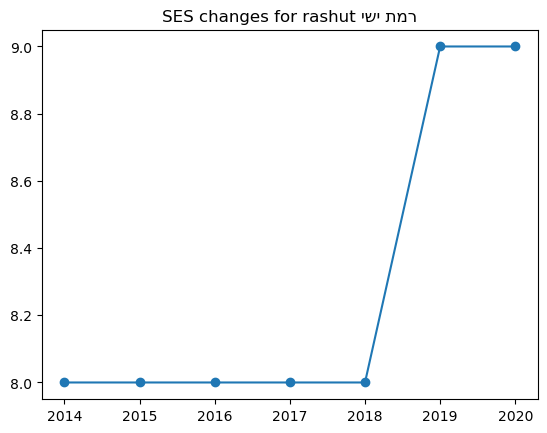

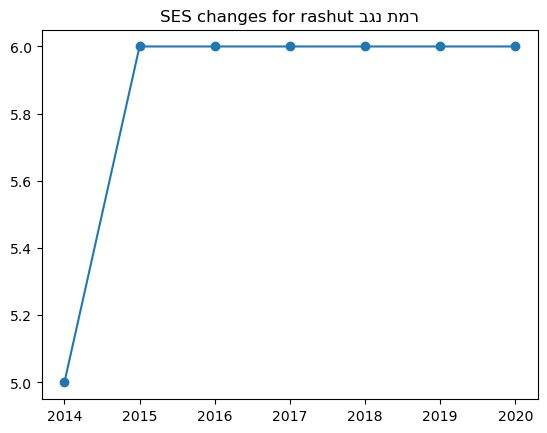

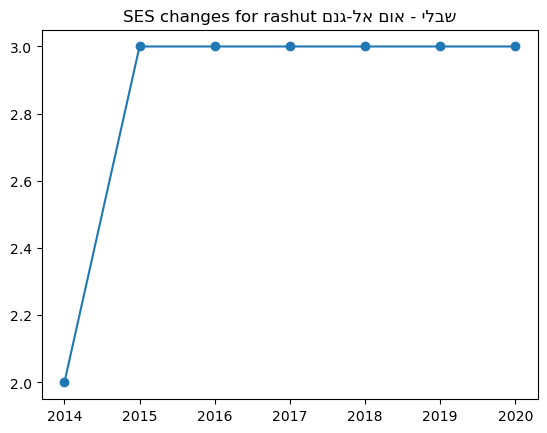

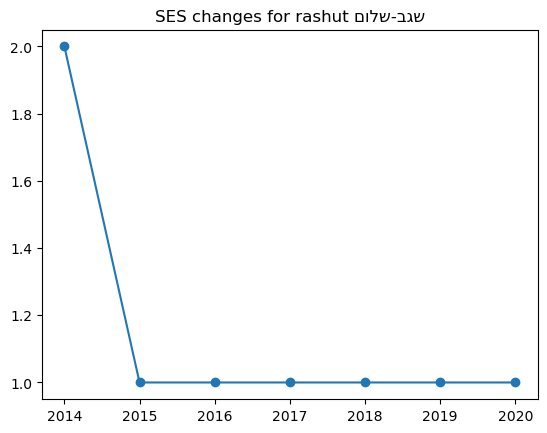

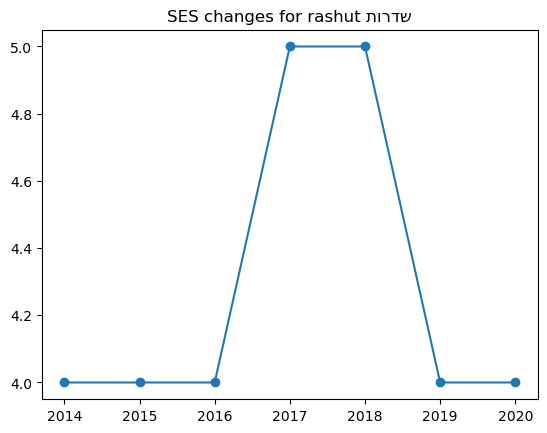

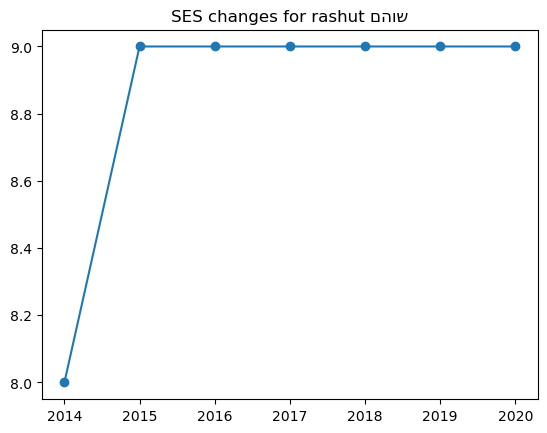

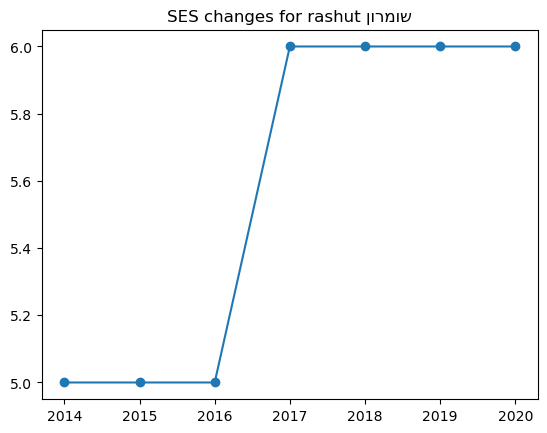

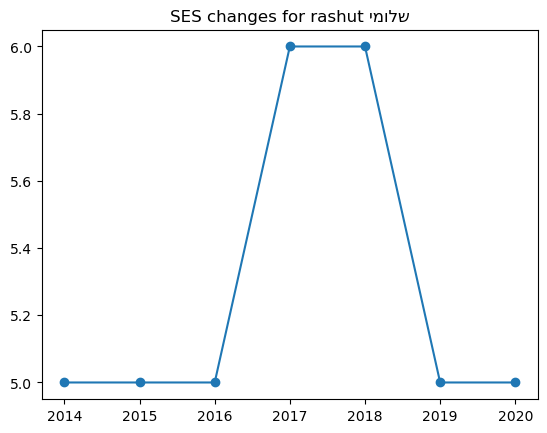

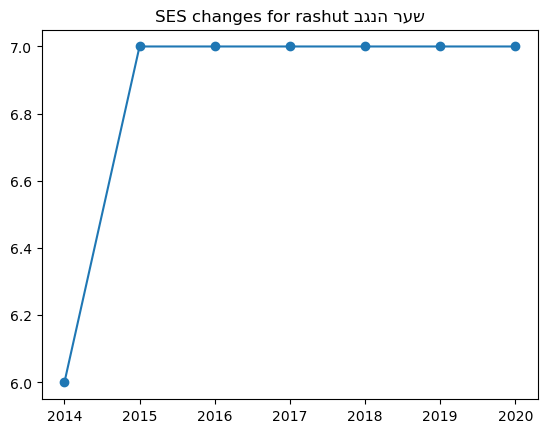

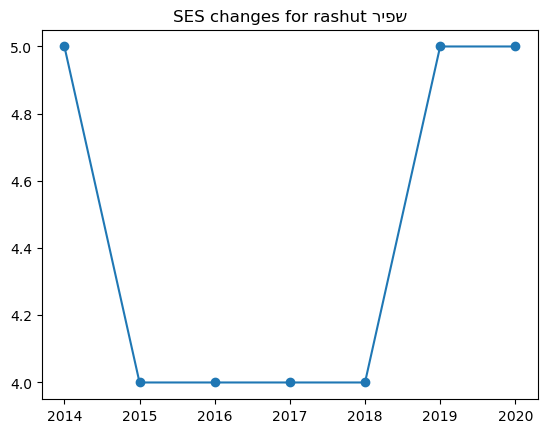

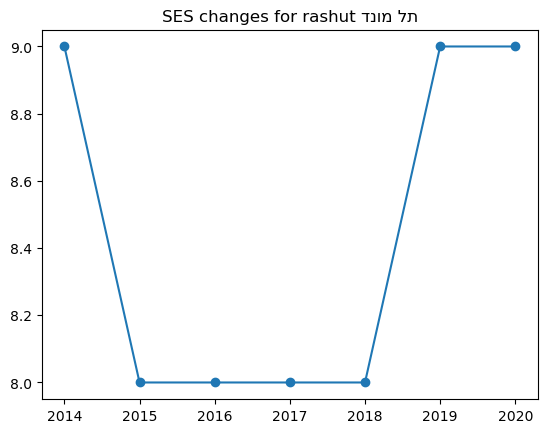

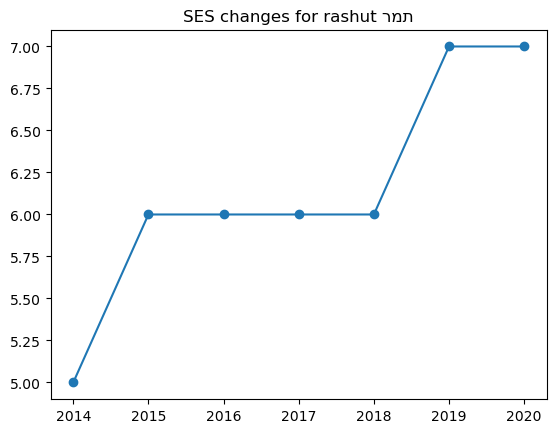

Percentage of changes in SES value: 0.6431372549019608
Average change in SES value: 0.6646341463414634


In [178]:
# keep track of the number of changes in the SES value
changes = 0
total = 0
avg_change = 0

for rashut_id in cleaned_df["ID"].unique():
    total += 1
    # get a list of all the rows with the same rashut_id in SES column
    ses_list = cleaned_df[cleaned_df["ID"] == rashut_id]["SES"].tolist()
    
    

    # if the list contains more than one value
    if len(set(ses_list)) > 1:
        changes += 1
        avg_change += ses_list[-1] - ses_list[0]
        # This rashut changed its PERIPH value over the years
        # show a graph of the changes by year
        # plot a line graph and the points in the graph
        plt.plot(cleaned_df[cleaned_df["ID"] == rashut_id]["YEAR"], ses_list, "o-")
        rashut_name = cleaned_df[cleaned_df["ID"] == rashut_id]["RASHUT"].iloc[0]
        plt.title("SES changes for rashut " + str(rashut_name)[::-1])  # print the name in reverse because it's in hebrew
        plt.show()

print("Percentage of changes in SES value: " + str(changes / total))
print("Average change in SES value: " + str(avg_change / changes))

## PERIPH

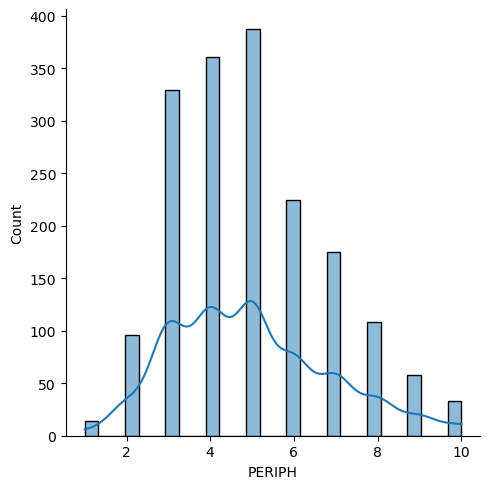

In [179]:
sn.displot(cleaned_df["PERIPH"], kde=True, rug=False)

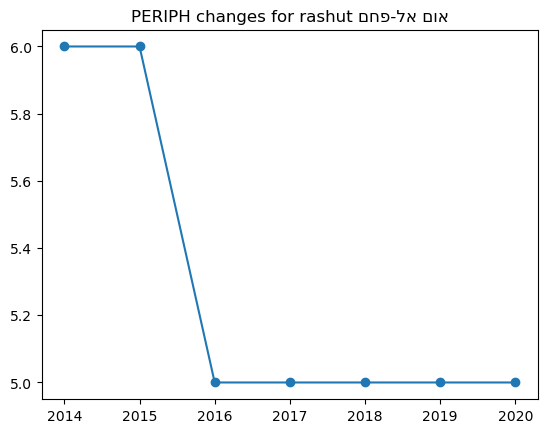

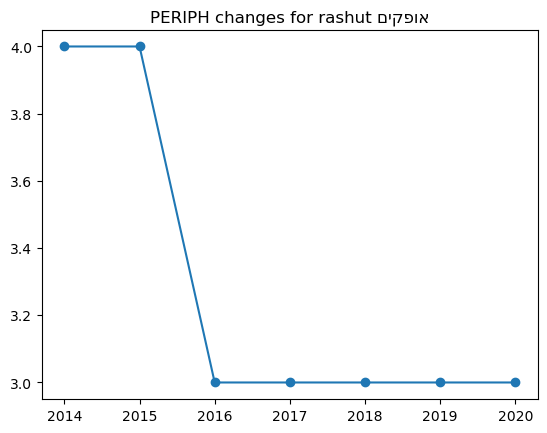

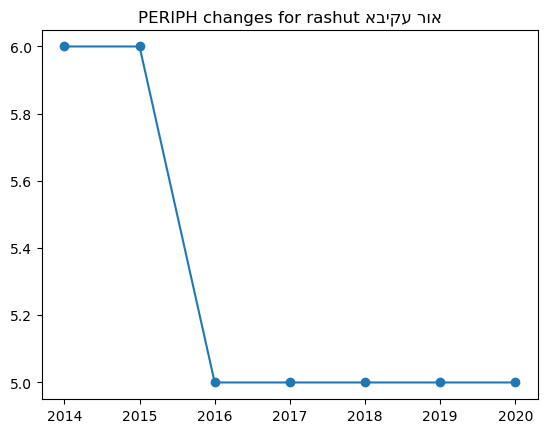

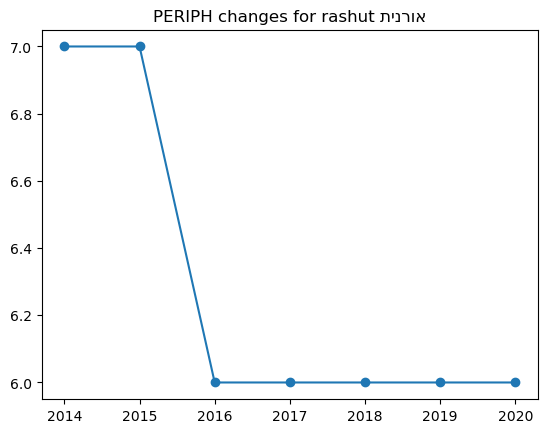

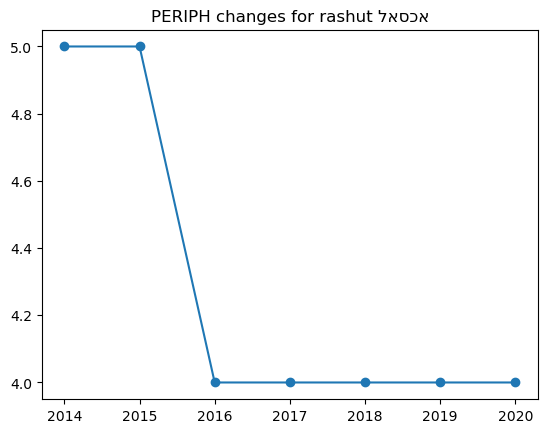

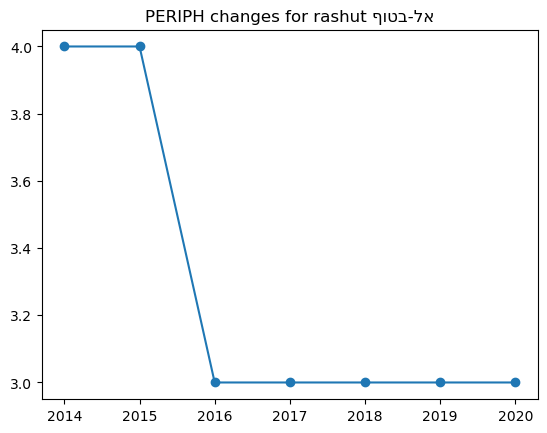

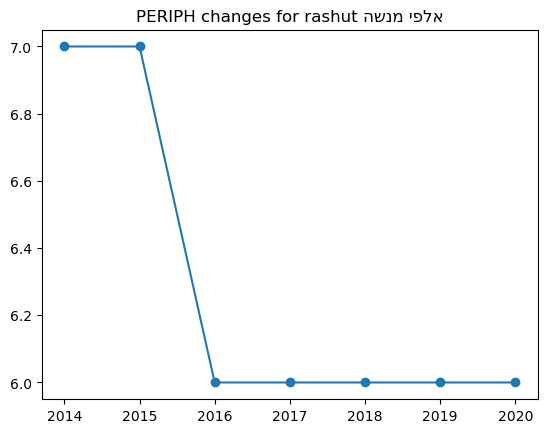

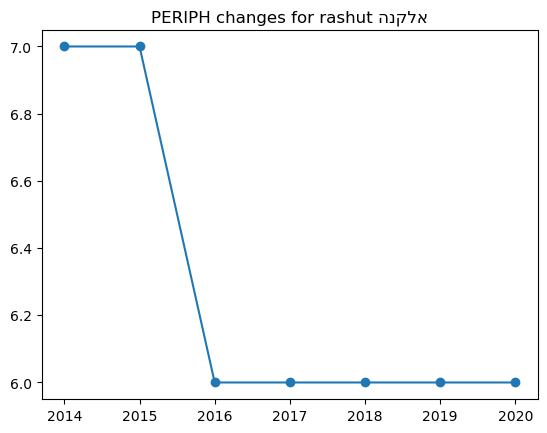

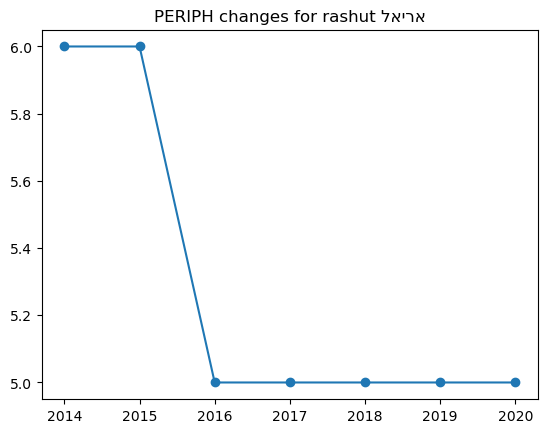

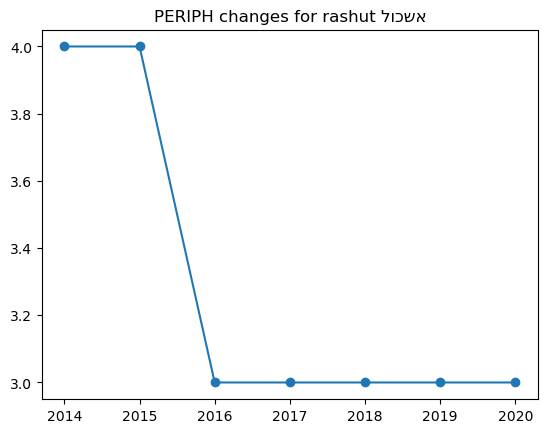

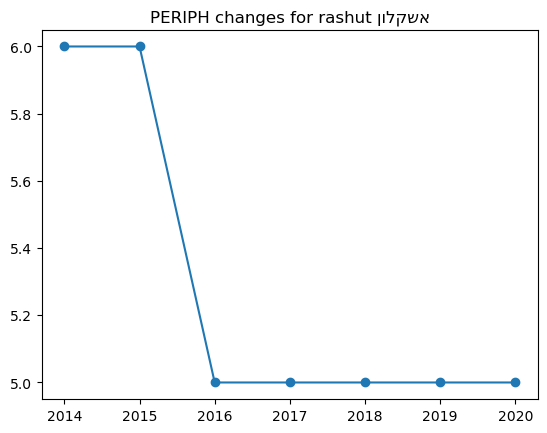

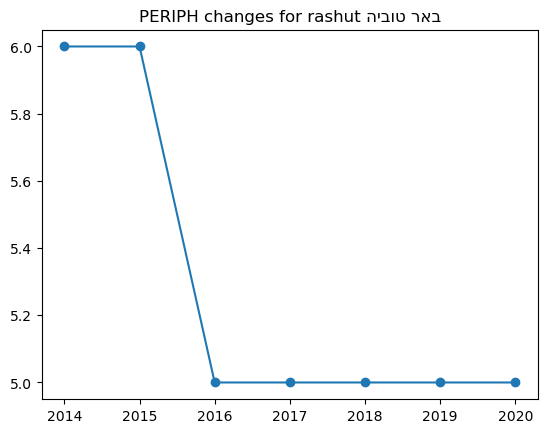

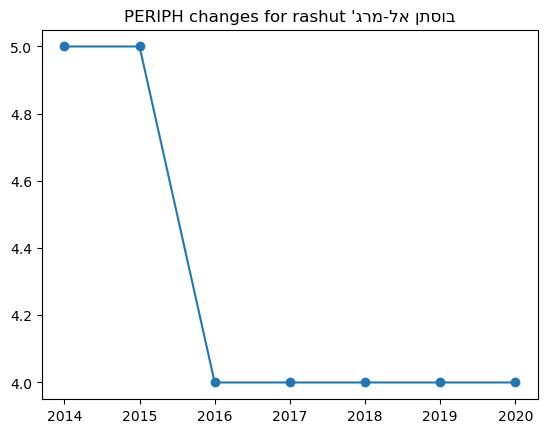

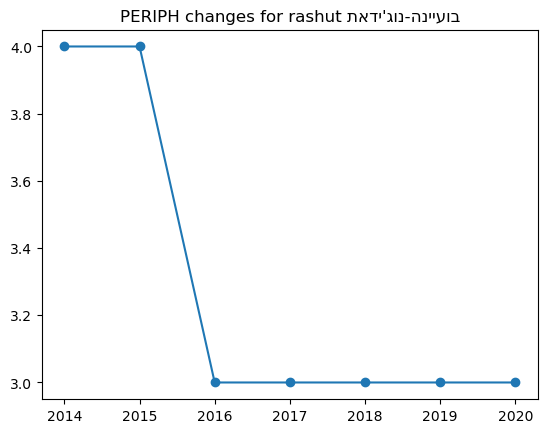

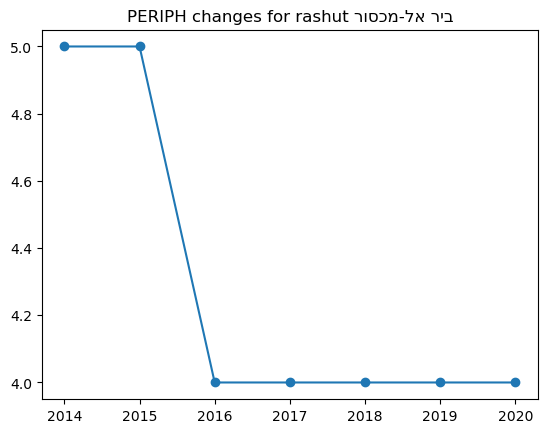

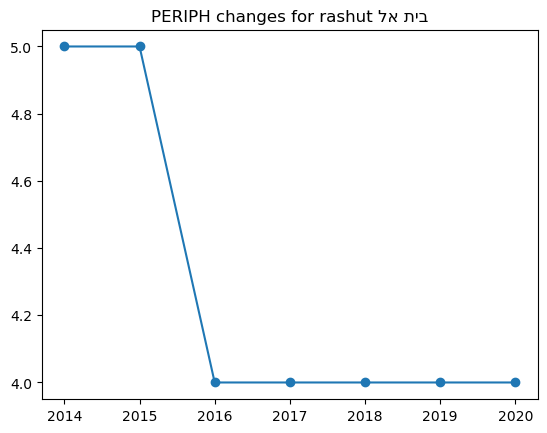

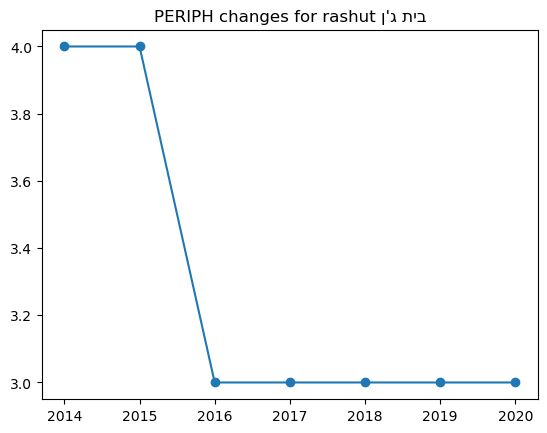

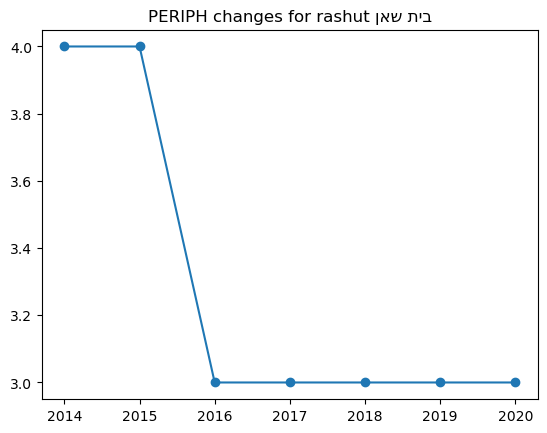

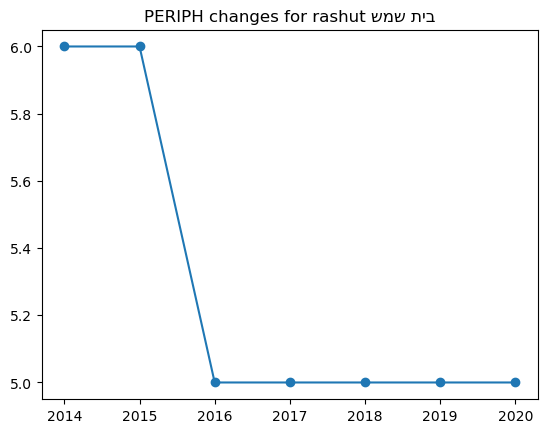

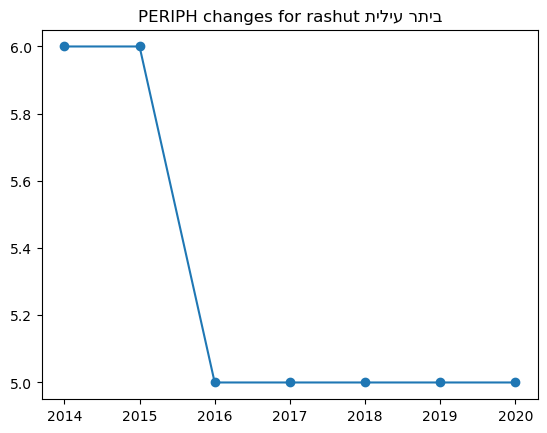

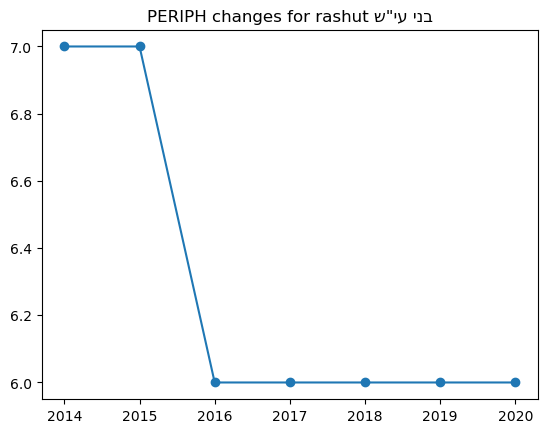

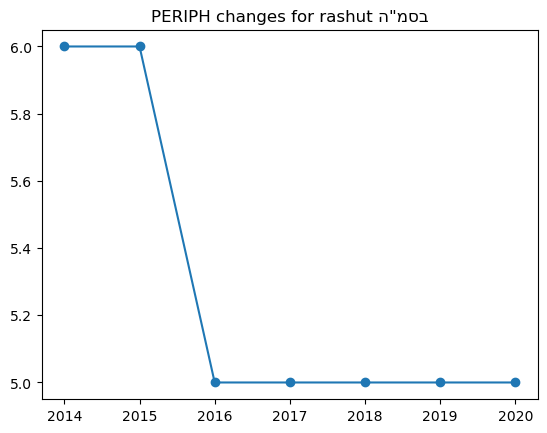

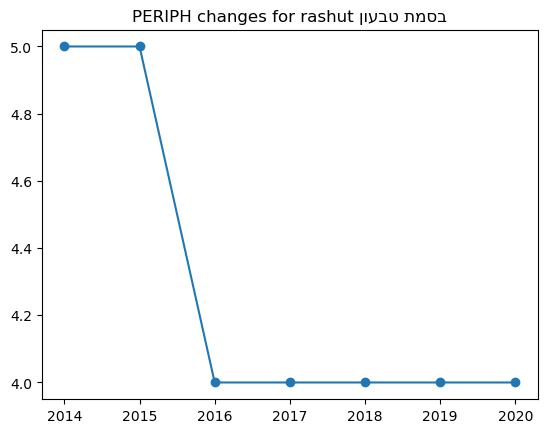

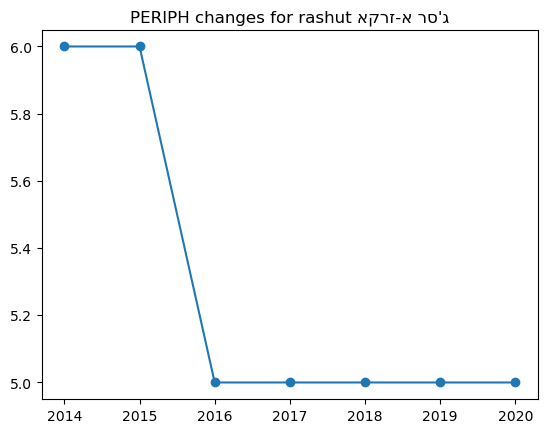

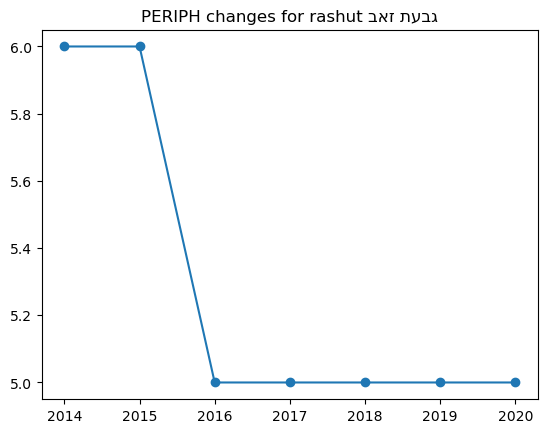

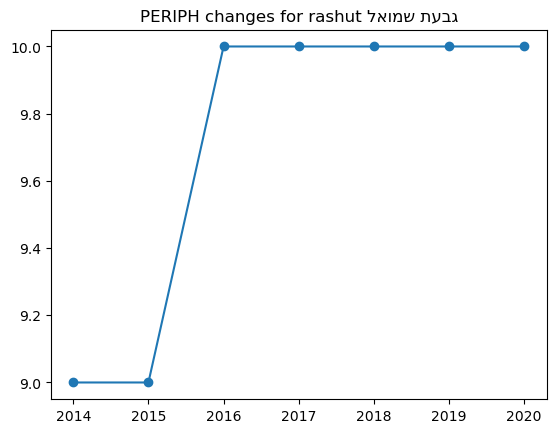

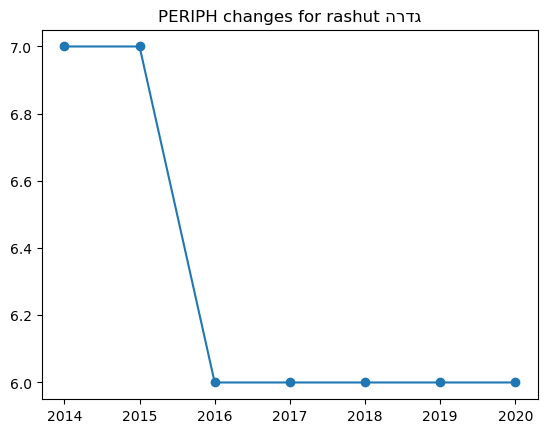

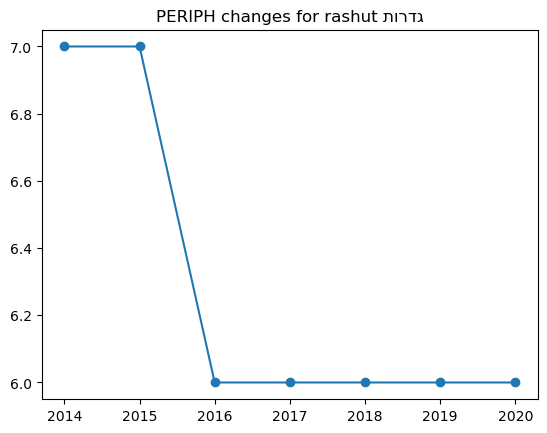

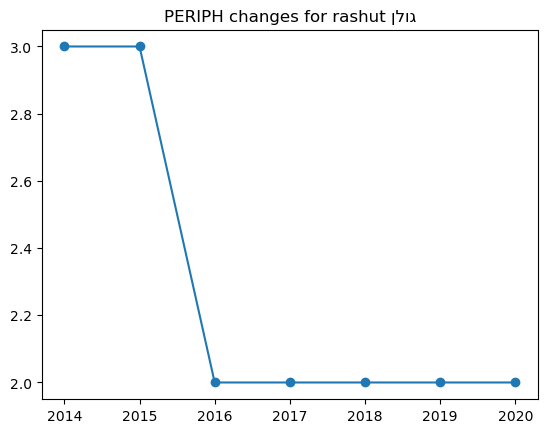

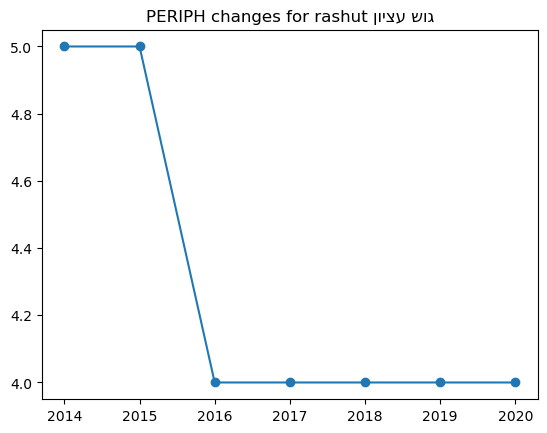

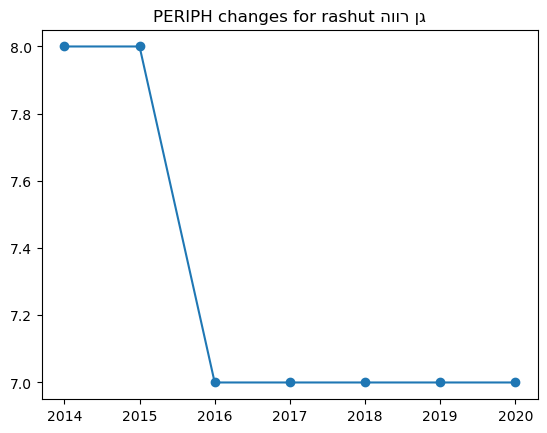

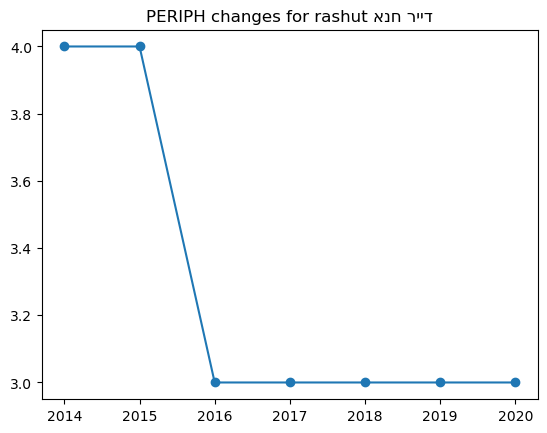

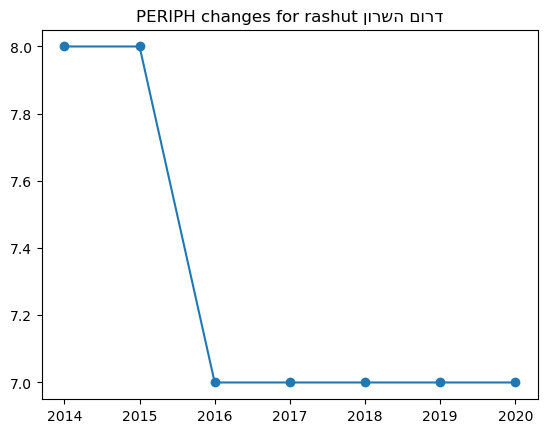

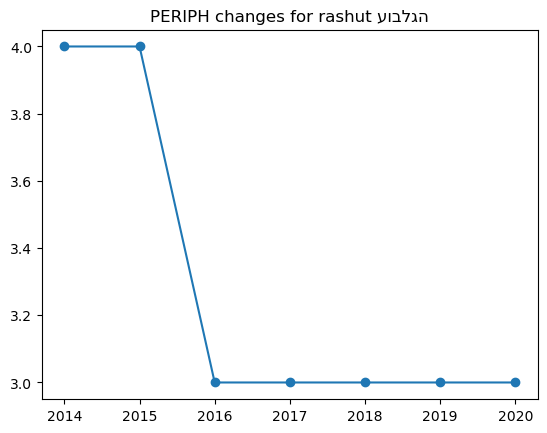

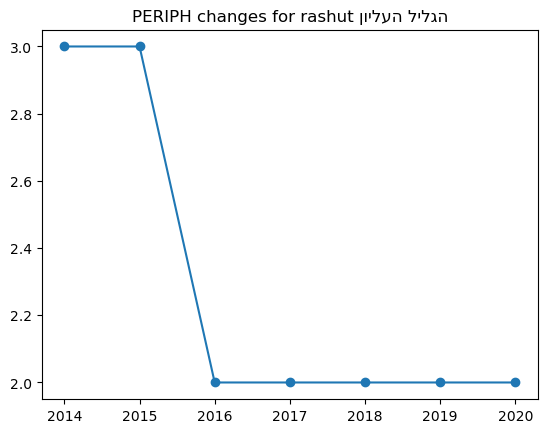

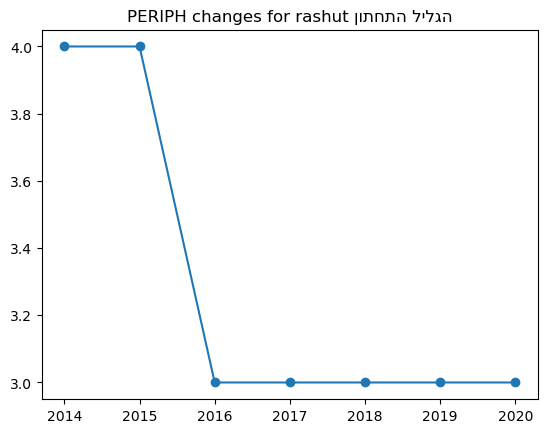

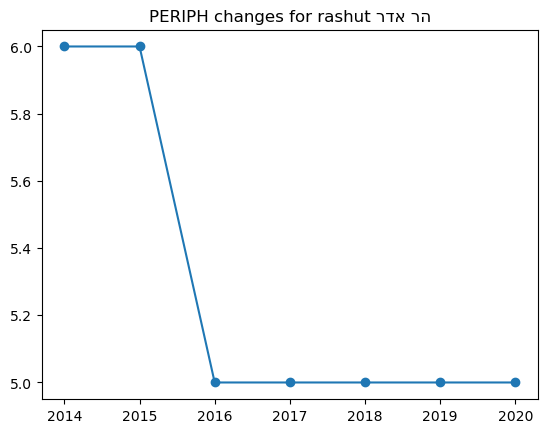

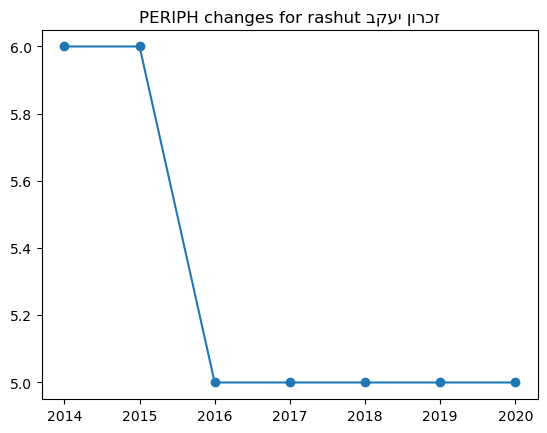

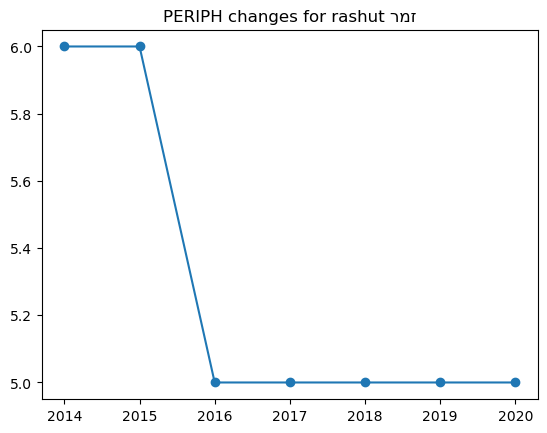

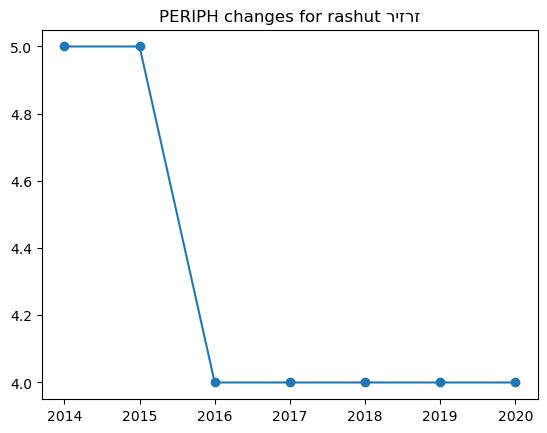

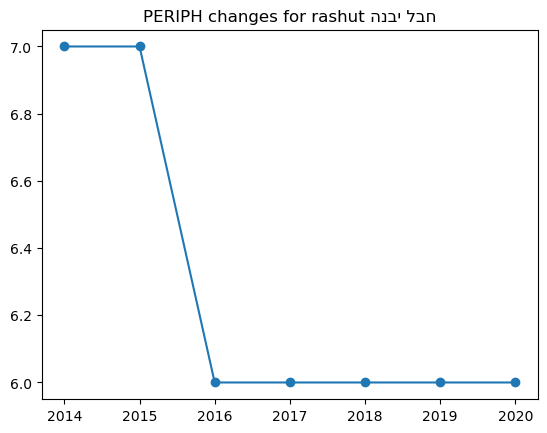

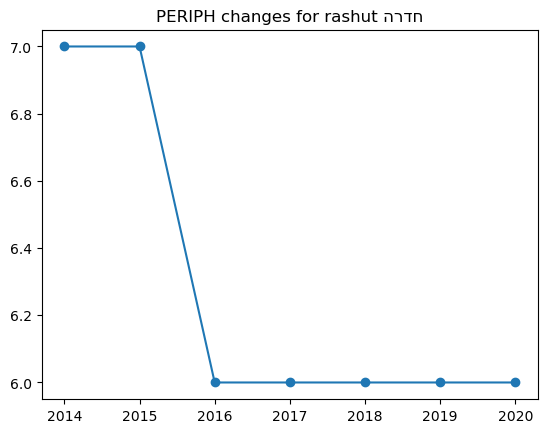

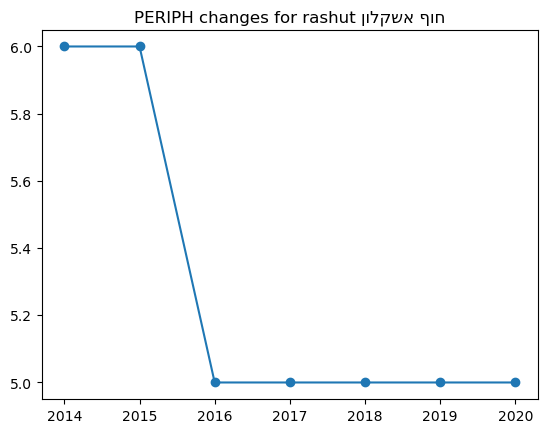

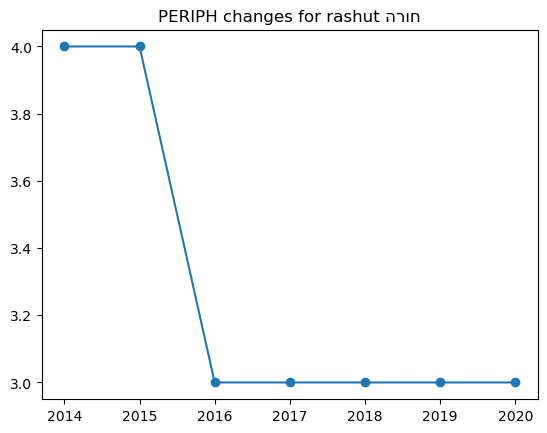

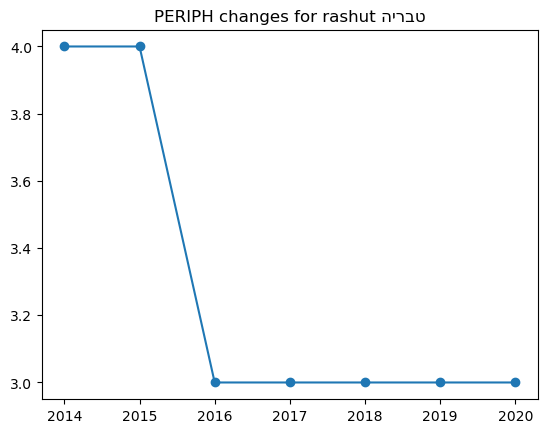

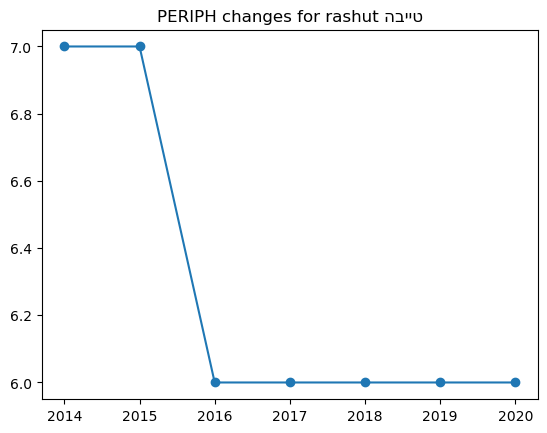

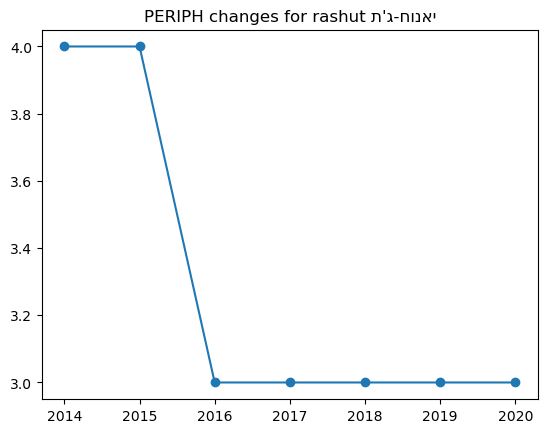

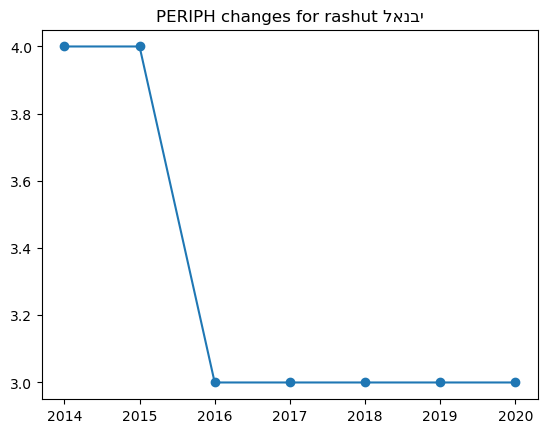

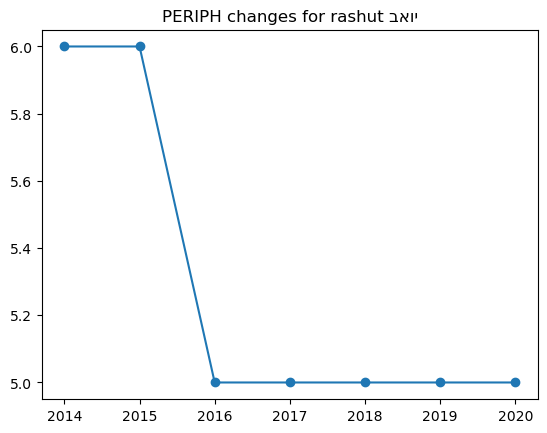

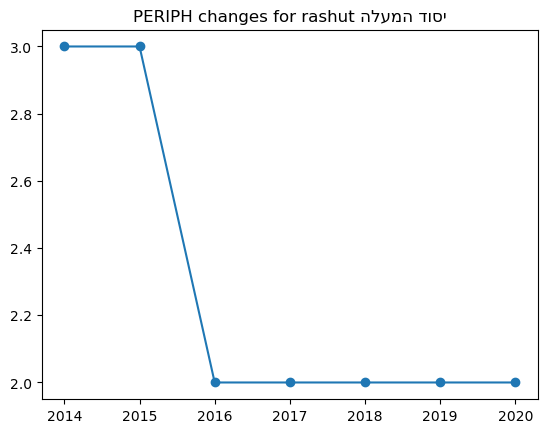

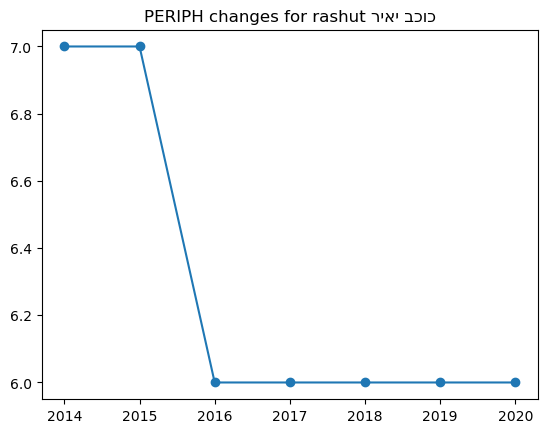

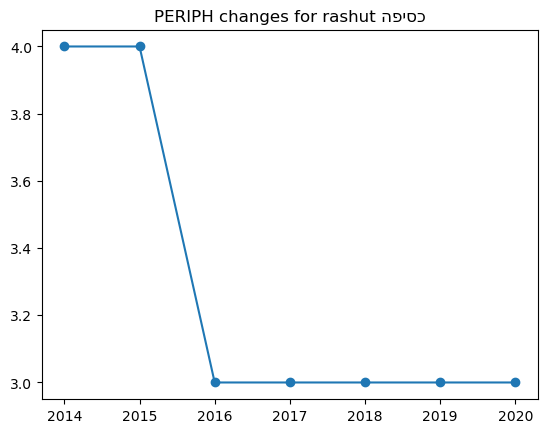

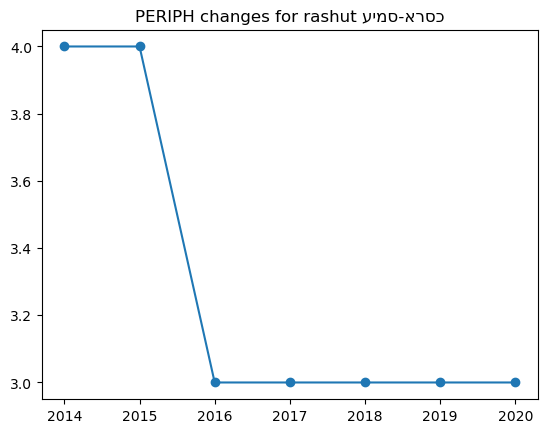

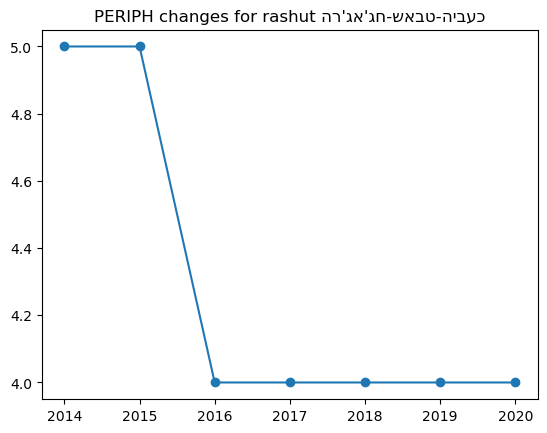

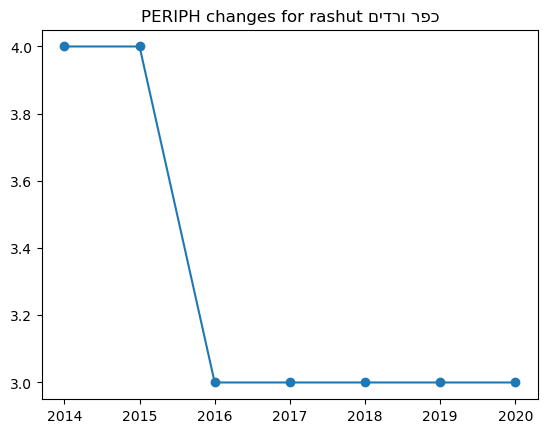

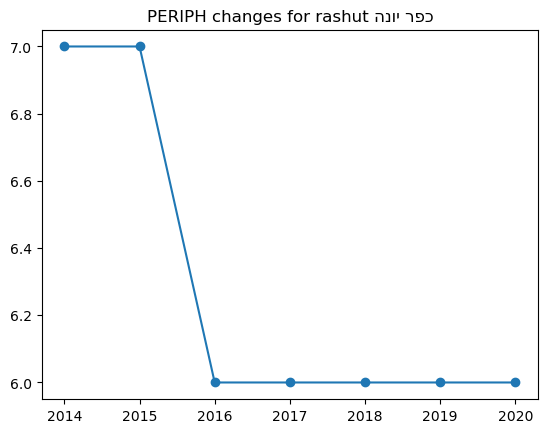

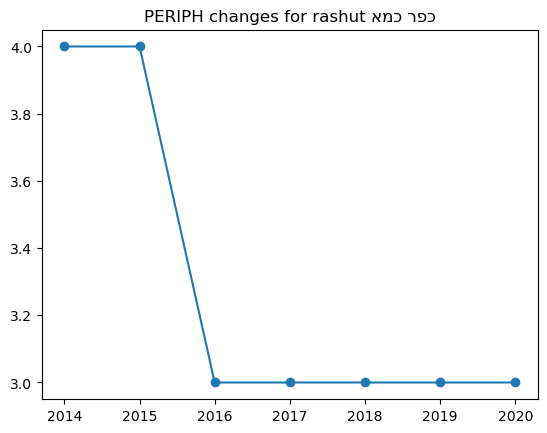

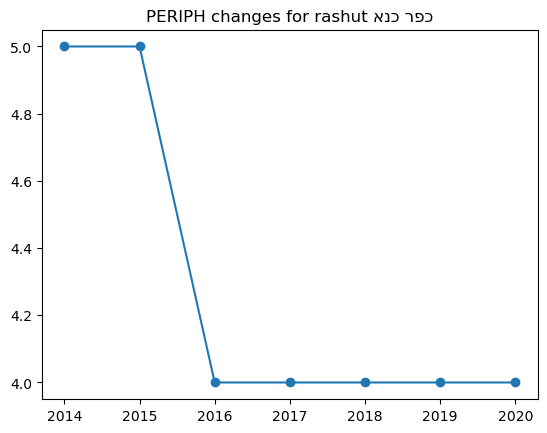

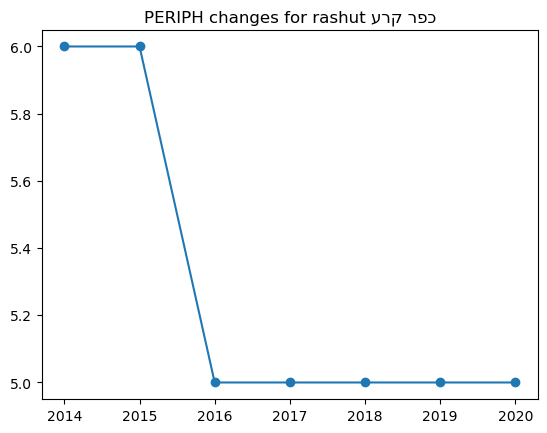

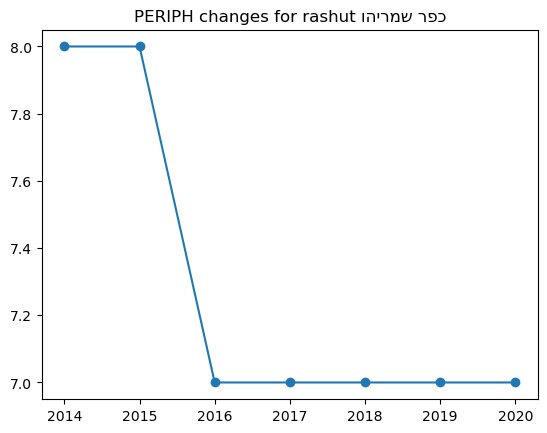

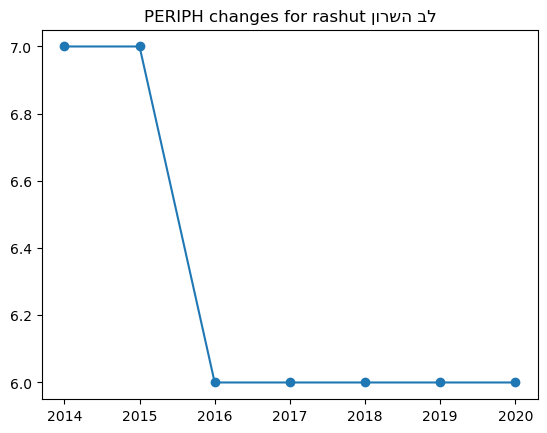

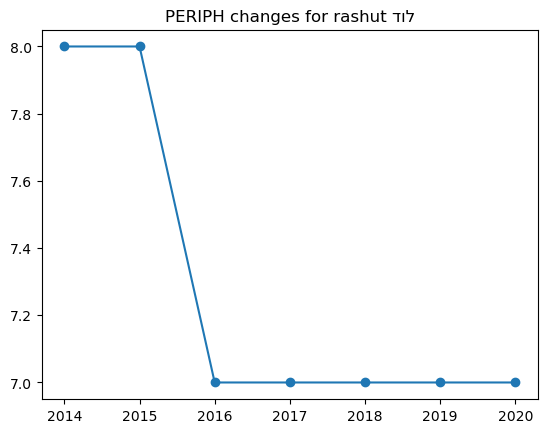

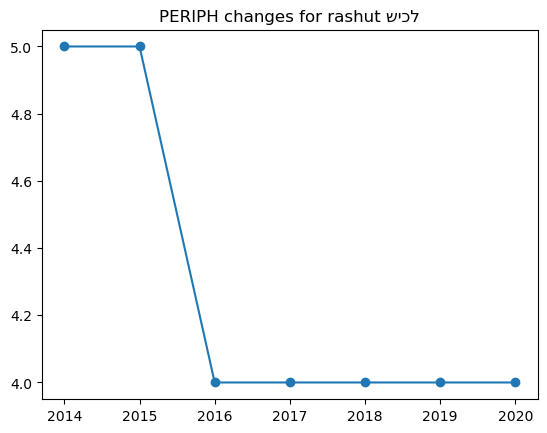

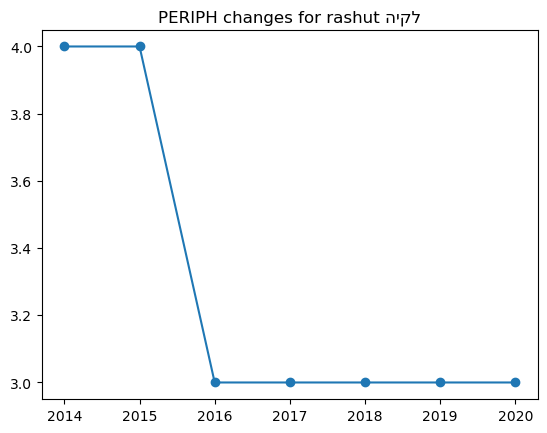

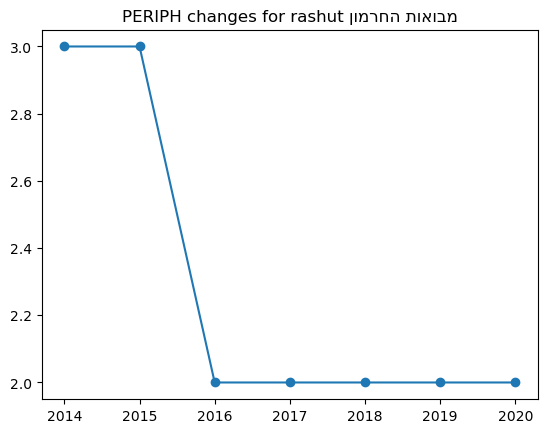

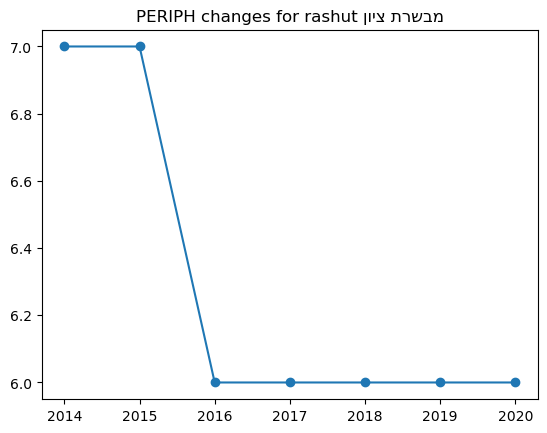

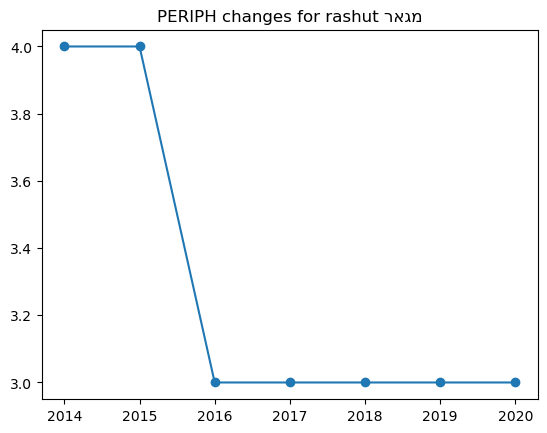

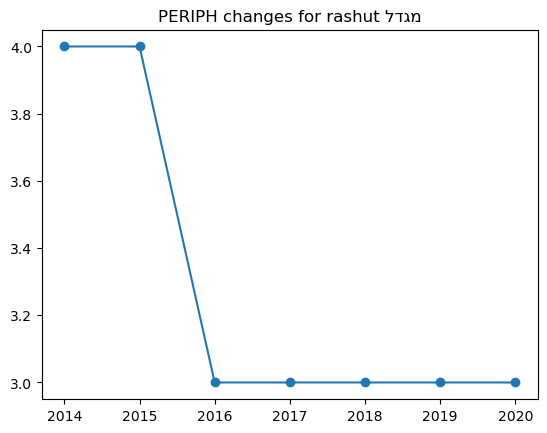

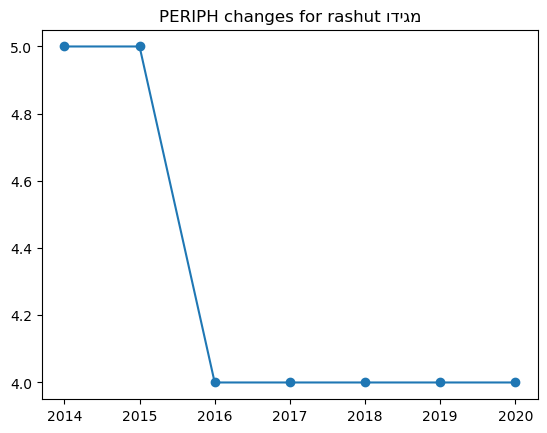

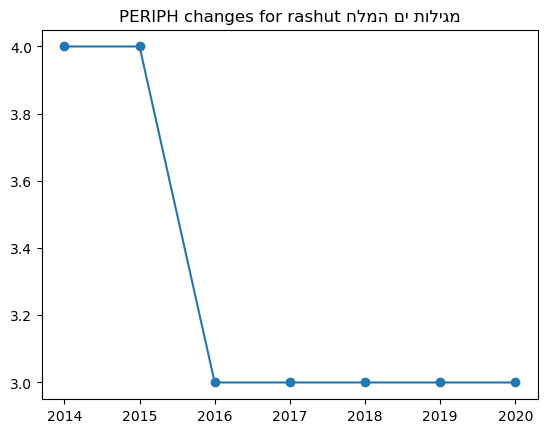

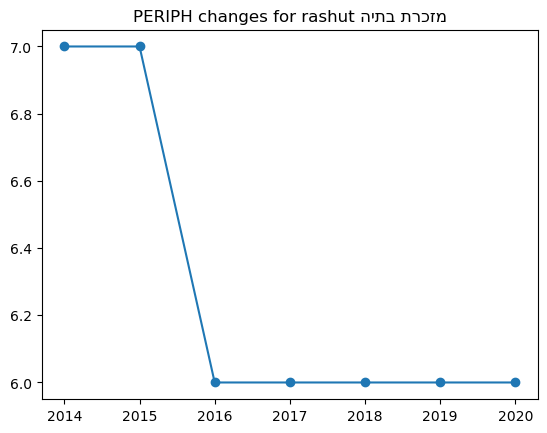

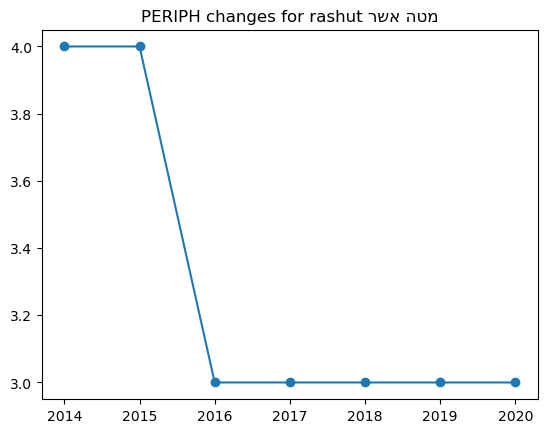

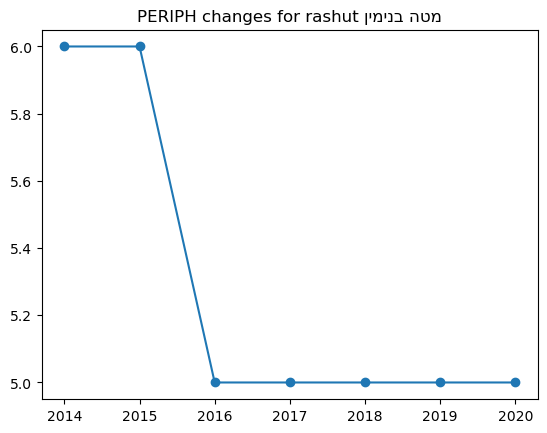

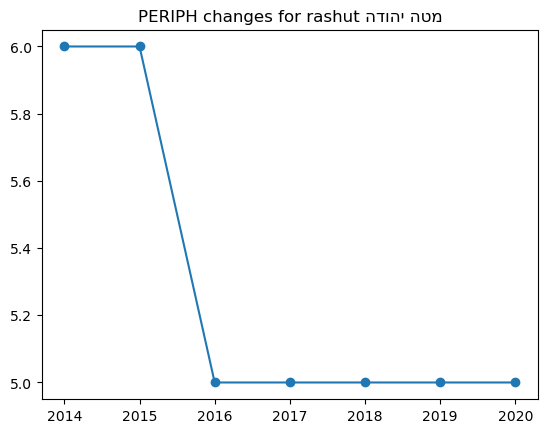

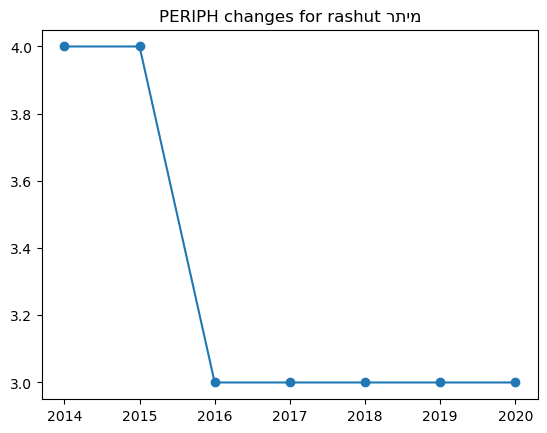

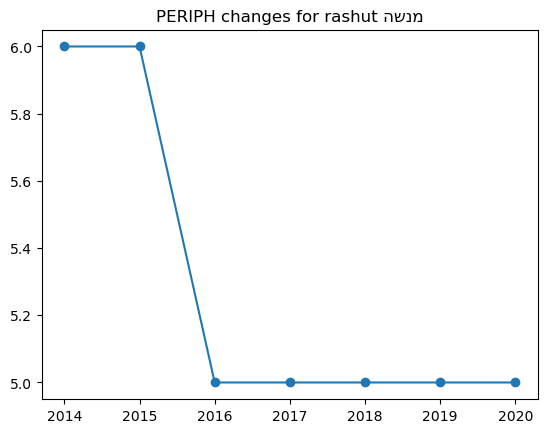

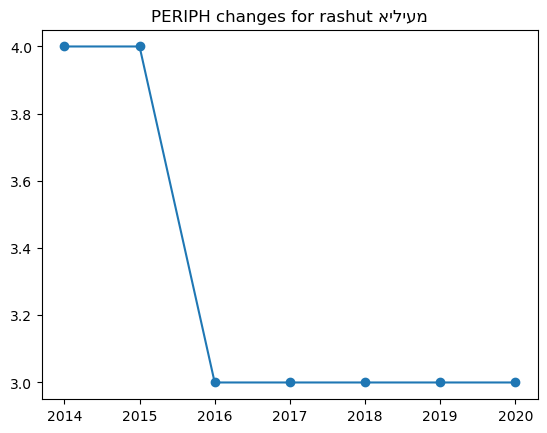

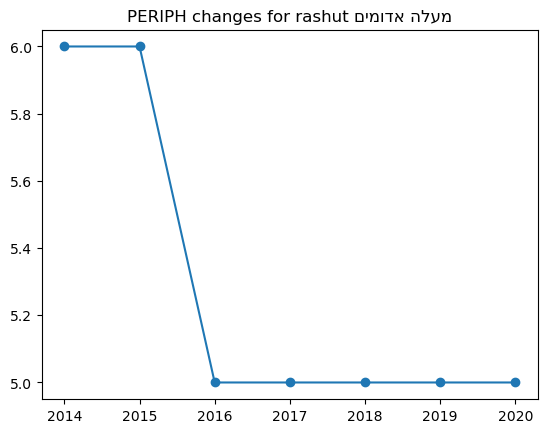

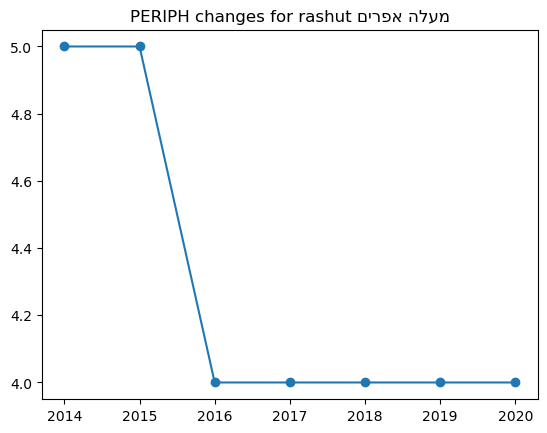

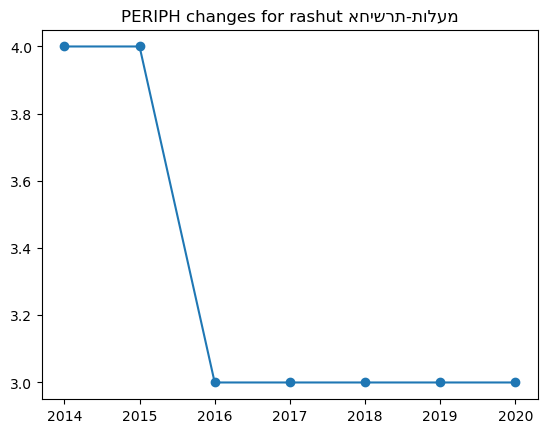

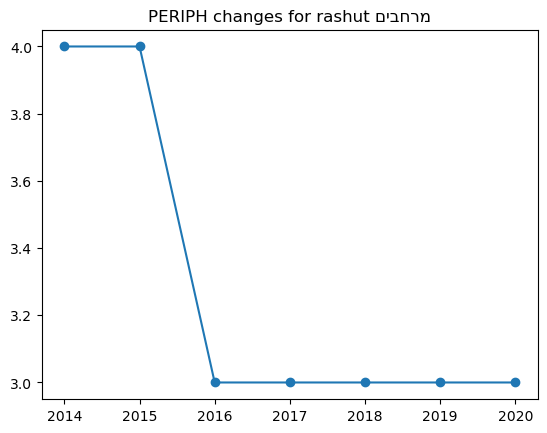

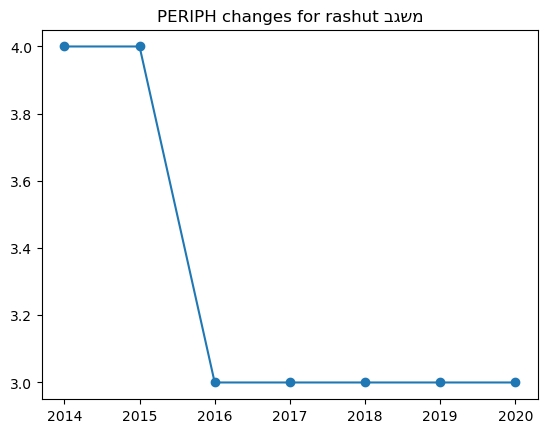

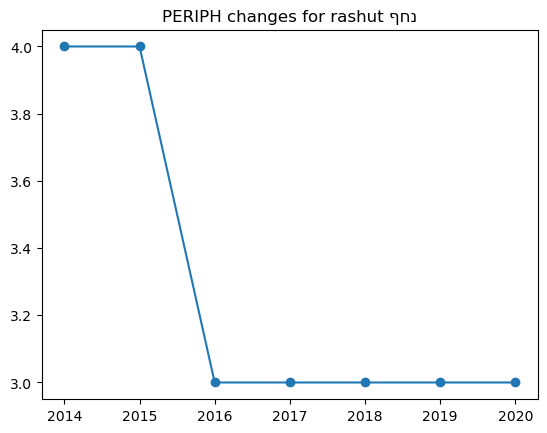

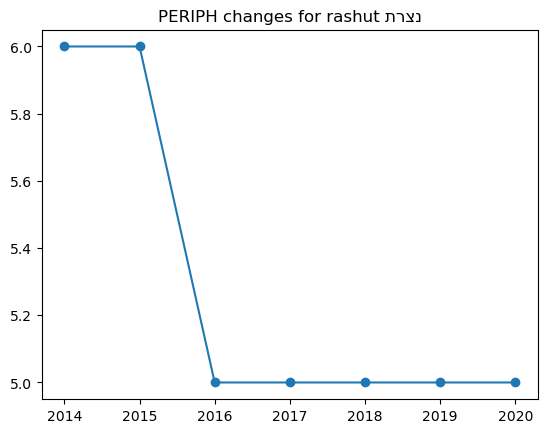

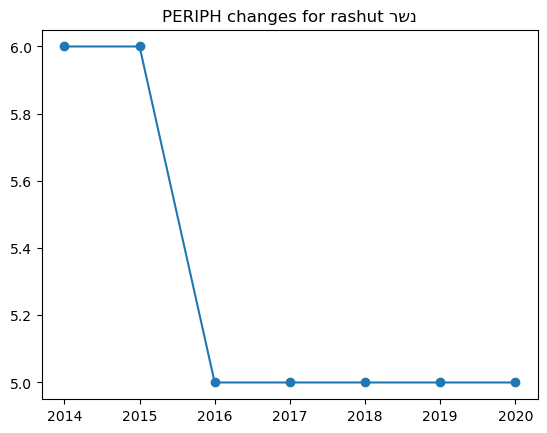

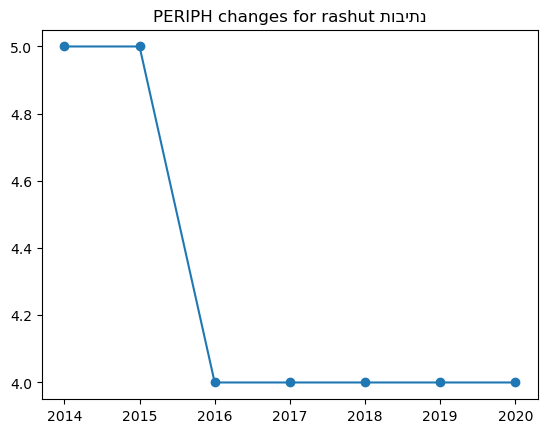

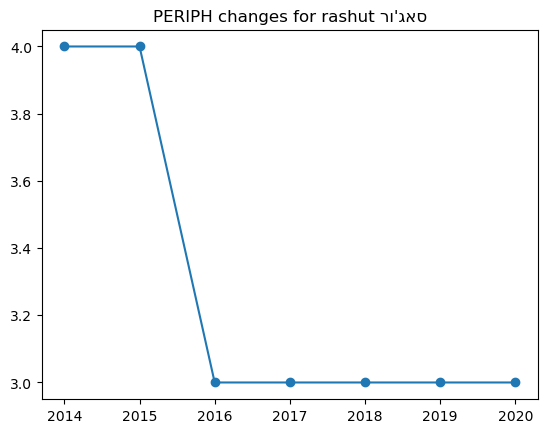

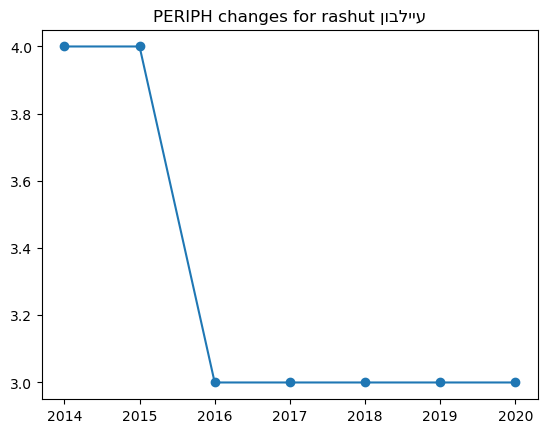

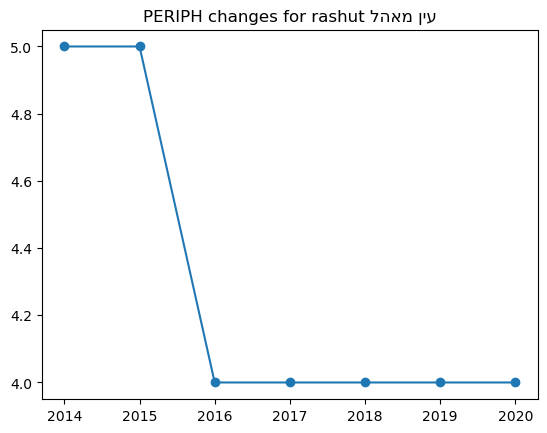

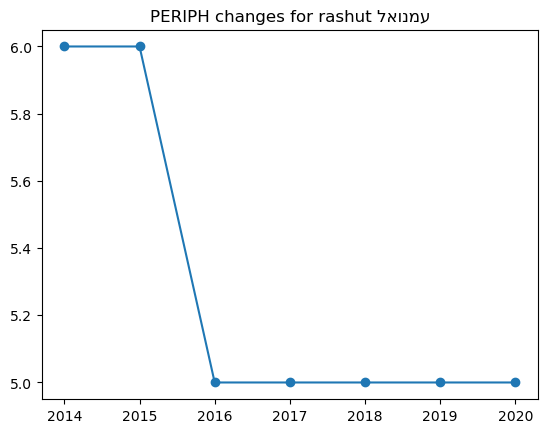

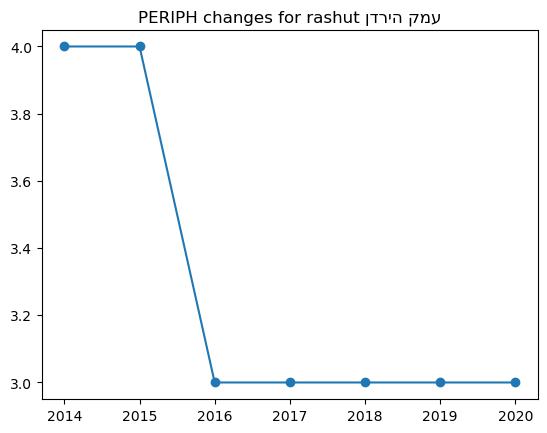

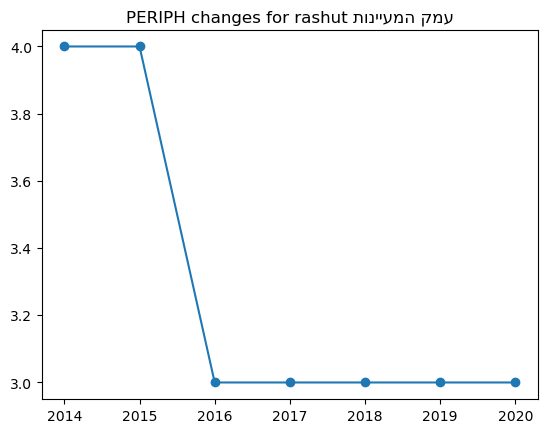

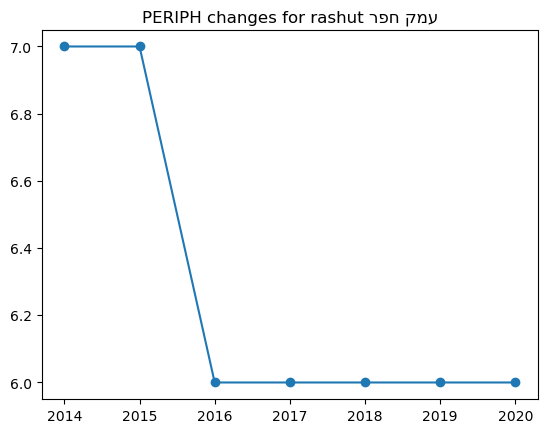

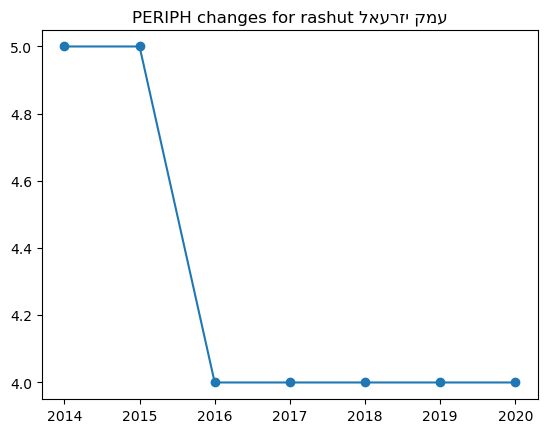

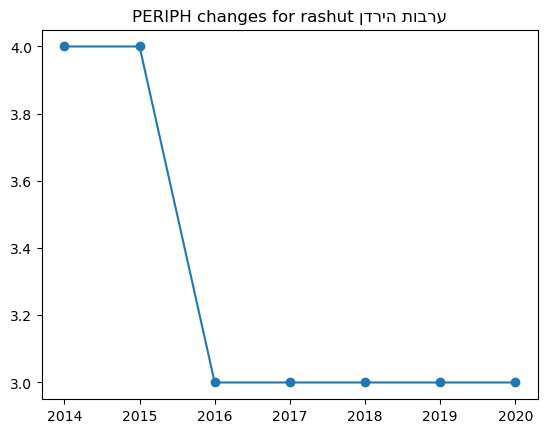

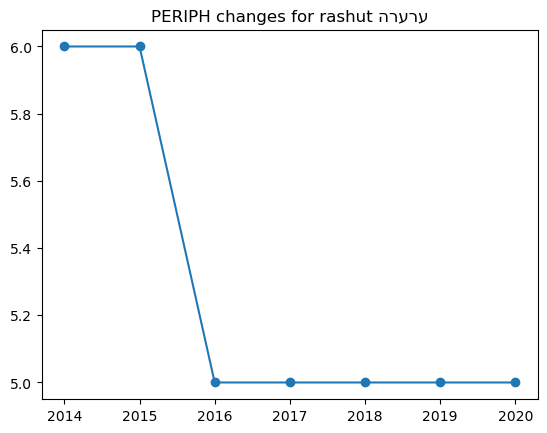

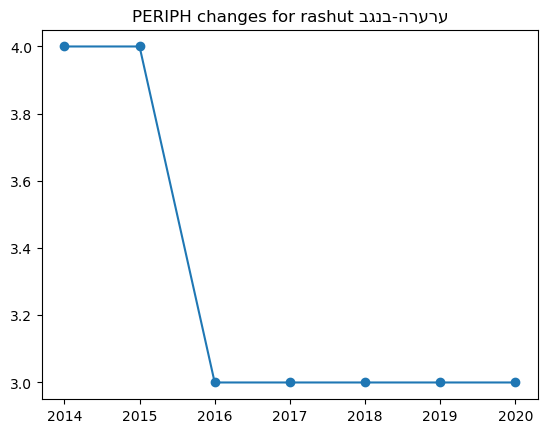

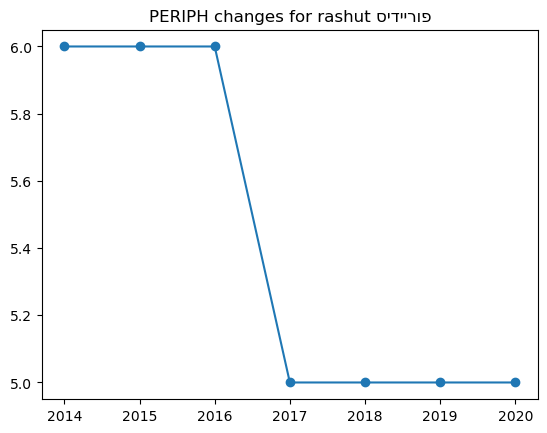

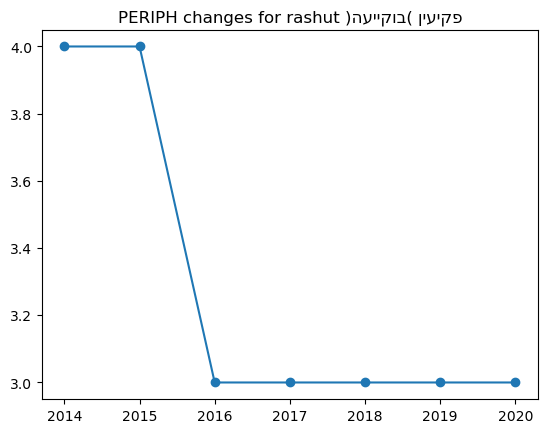

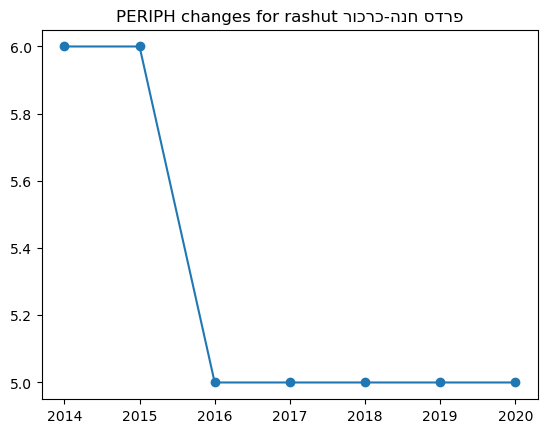

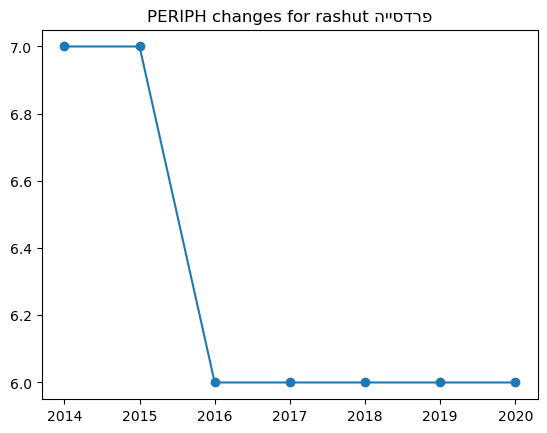

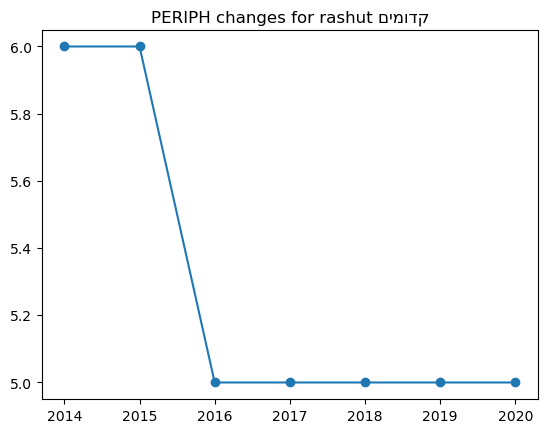

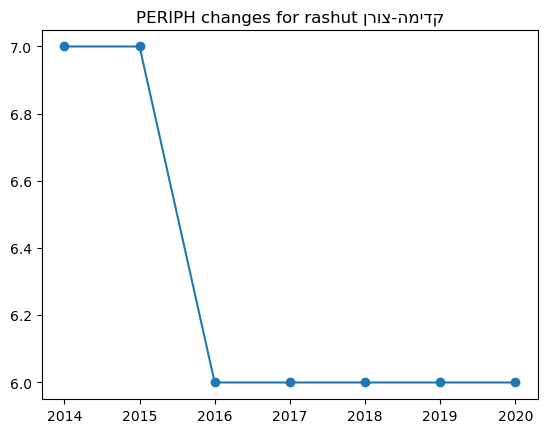

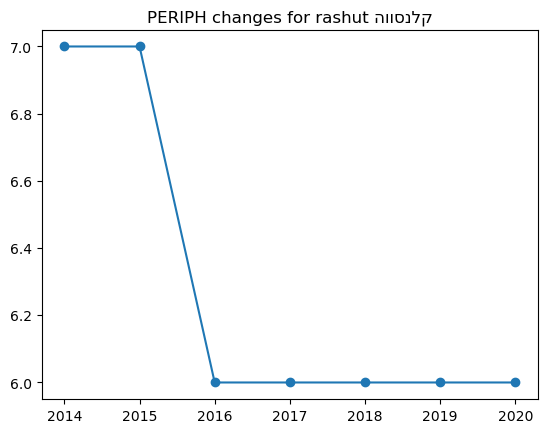

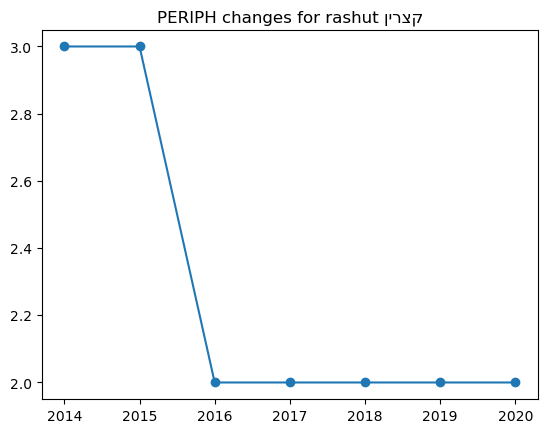

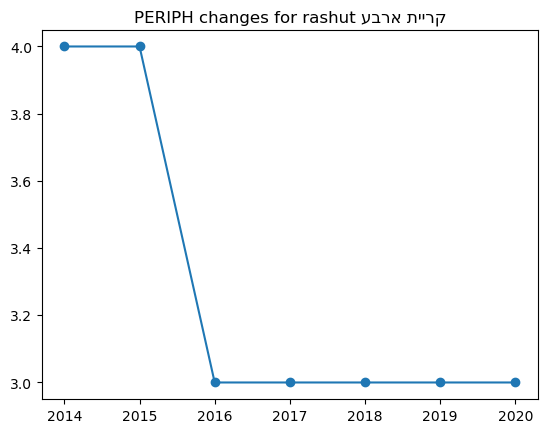

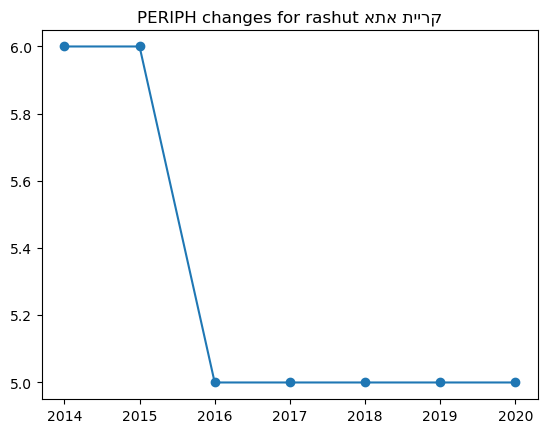

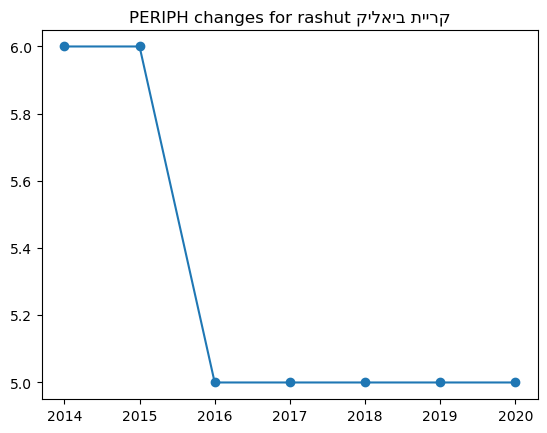

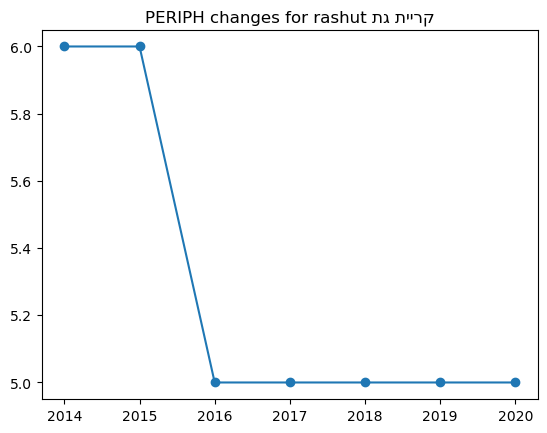

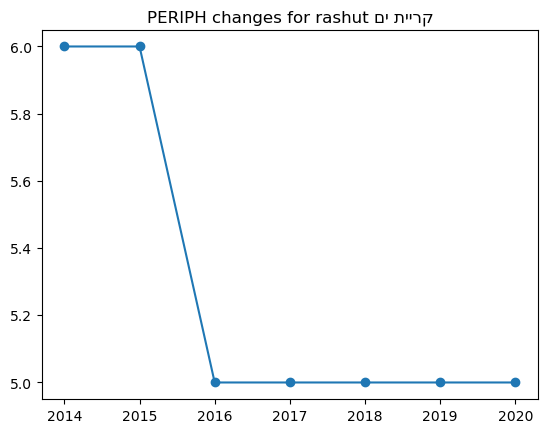

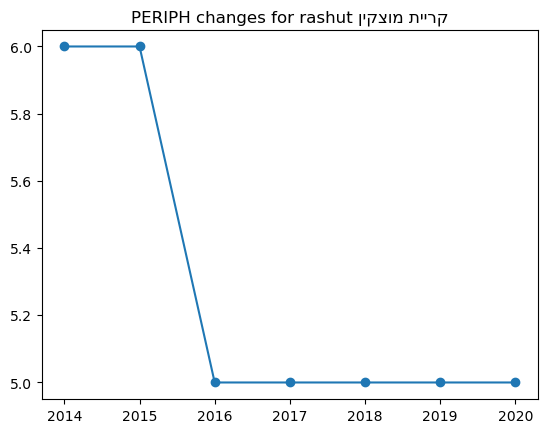

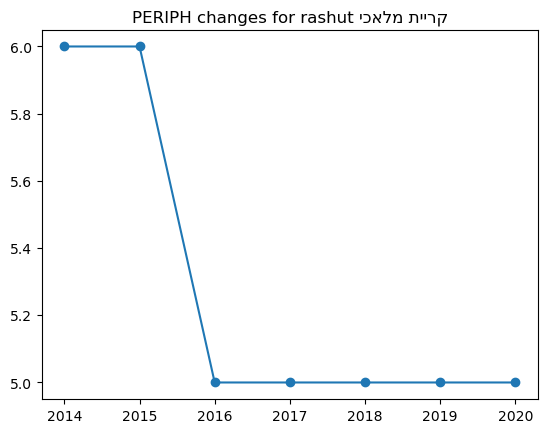

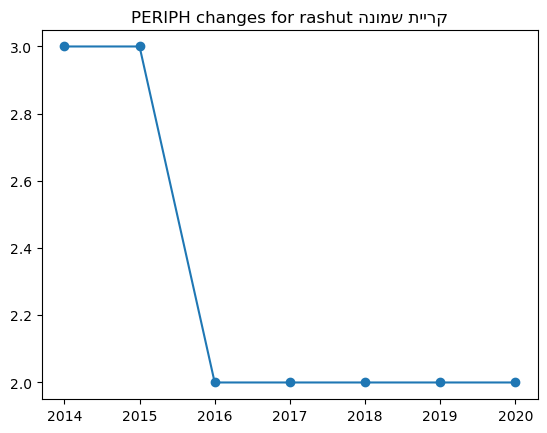

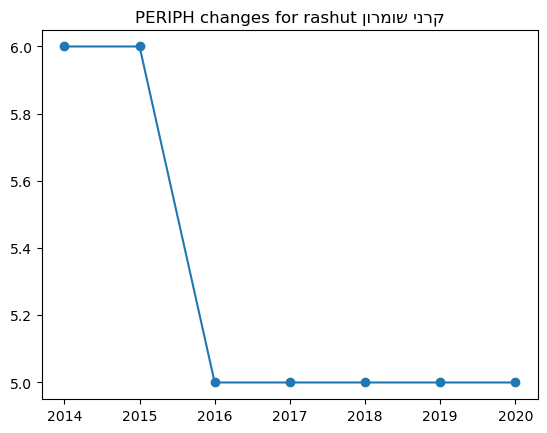

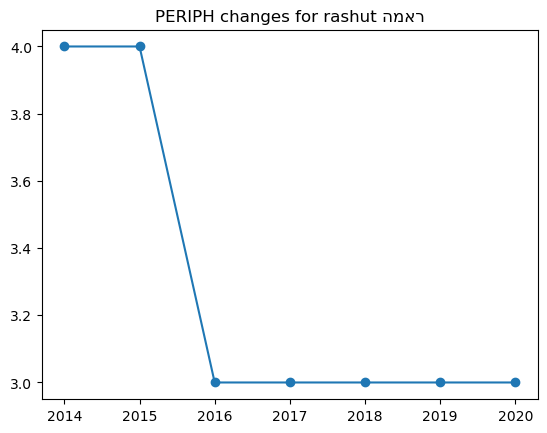

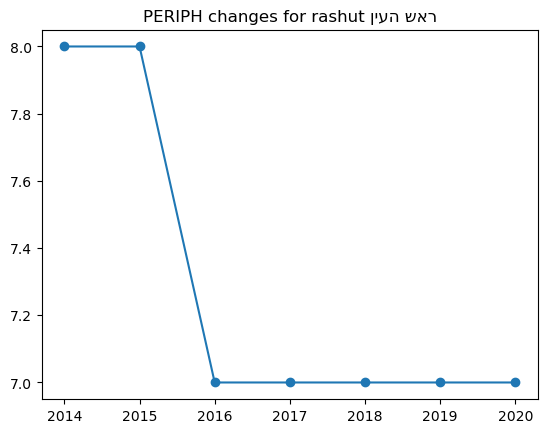

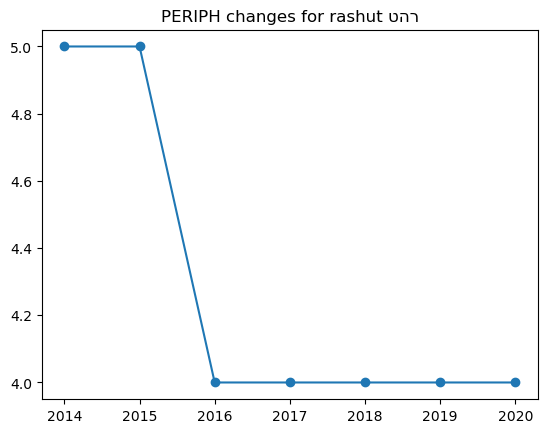

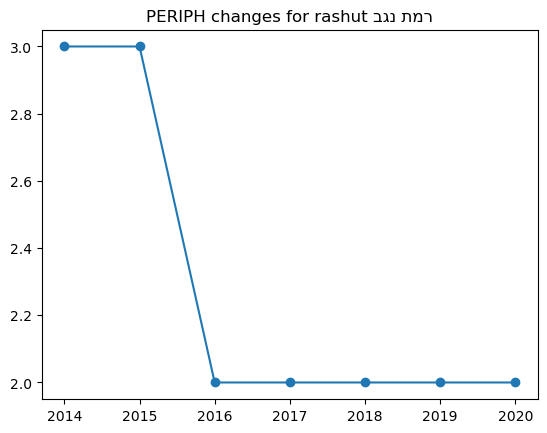

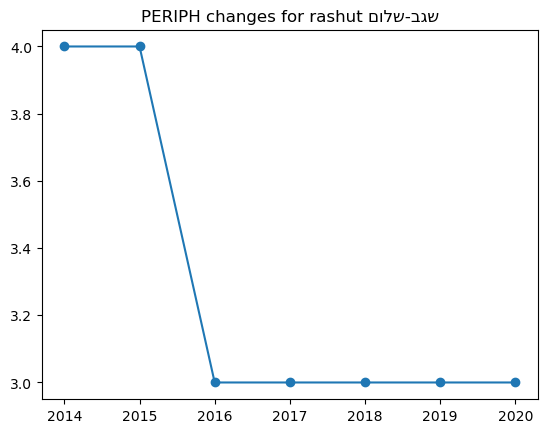

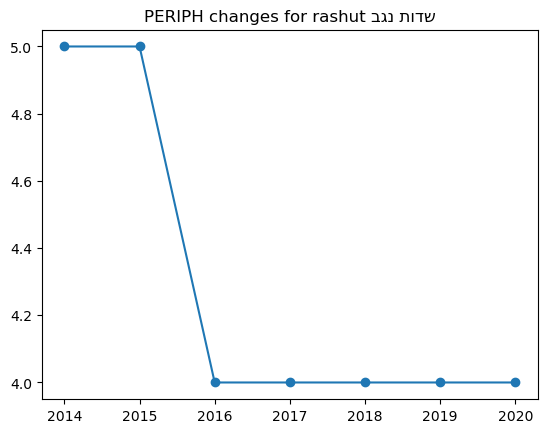

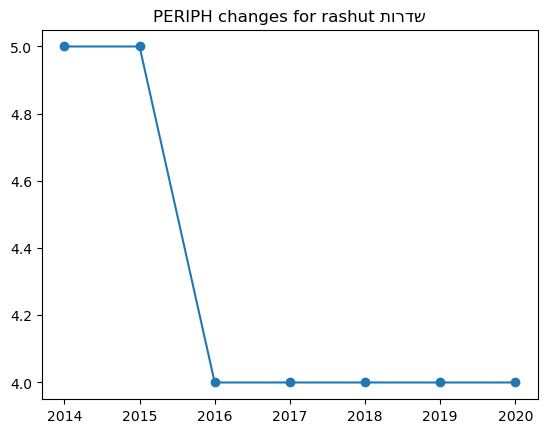

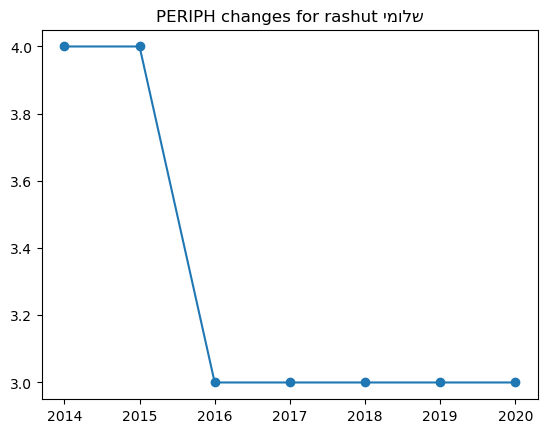

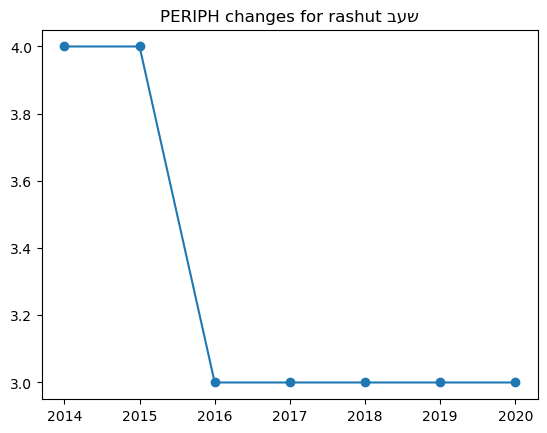

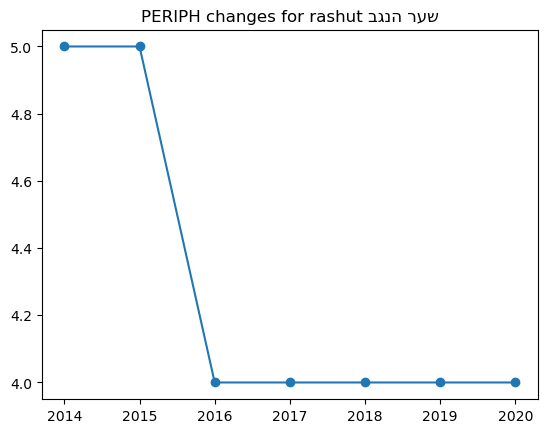

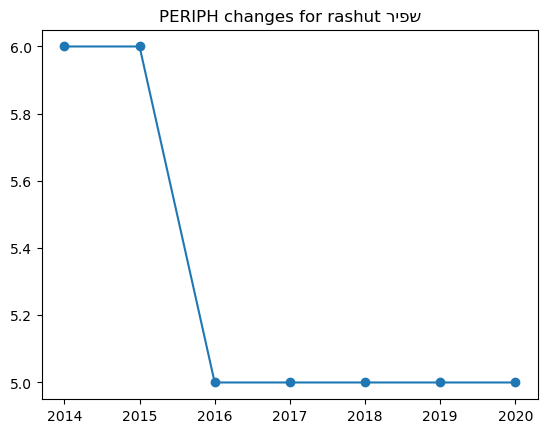

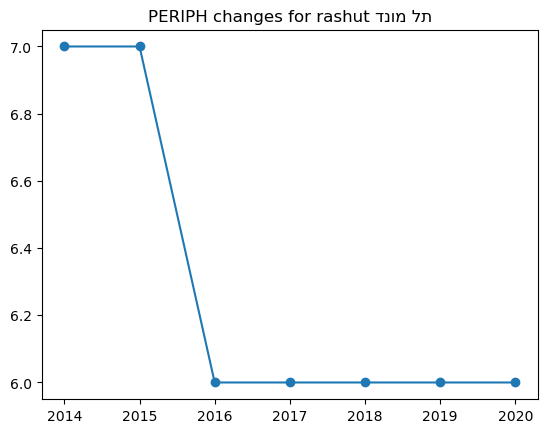

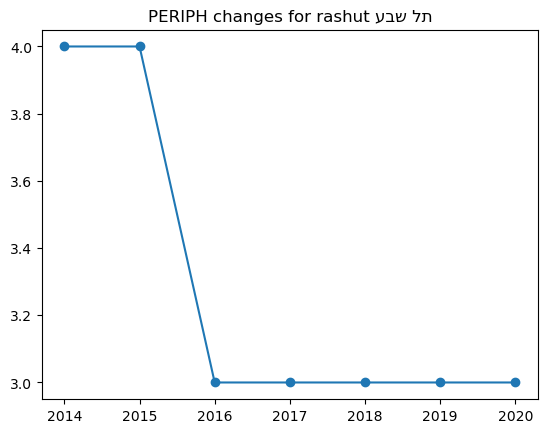

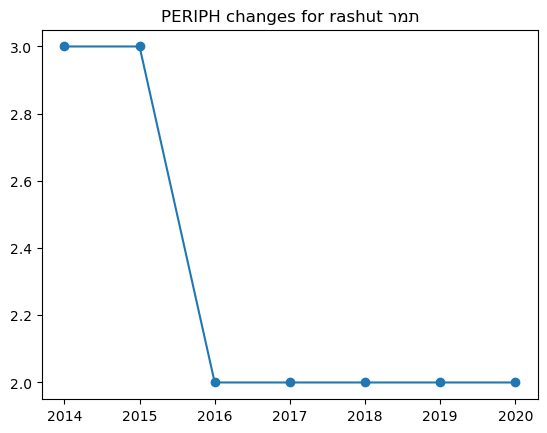

Percentage of changes in PERIPH value: 0.5137254901960784
Average change in PERIPH value: -0.9923664122137404


In [180]:
# keep track of the number of changes in the PERIPH value
changes = 0
total = 0
avg_change = 0

for rashut_id in cleaned_df["ID"].unique():
    total += 1
    # get a list of all the rows with the same rashut_id in PERIPH column
    periph_list = cleaned_df[cleaned_df["ID"] == rashut_id]["PERIPH"].tolist()
    
    

    # if the list contains more than one value
    if len(set(periph_list)) > 1:
        changes += 1
        avg_change += periph_list[-1] - periph_list[0]
        # This rashut changed its PERIPH value over the years
        # show a graph of the changes by year
        # plot a line graph and the points in the graph
        plt.plot(cleaned_df[cleaned_df["ID"] == rashut_id]["YEAR"], periph_list, "o-")
        rashut_name = cleaned_df[cleaned_df["ID"] == rashut_id]["RASHUT"].iloc[0]
        plt.title("PERIPH changes for rashut " + str(rashut_name)[::-1])  # print the name in reverse because it's in hebrew
        plt.show()

print("Percentage of changes in PERIPH value: " + str(changes / total))
print("Average change in PERIPH value: " + str(avg_change / changes))

## ALLOCATION

Instead of using the allocation, we'll be using the log of the allocation. This is coherent with the literature because of diminishing returns.

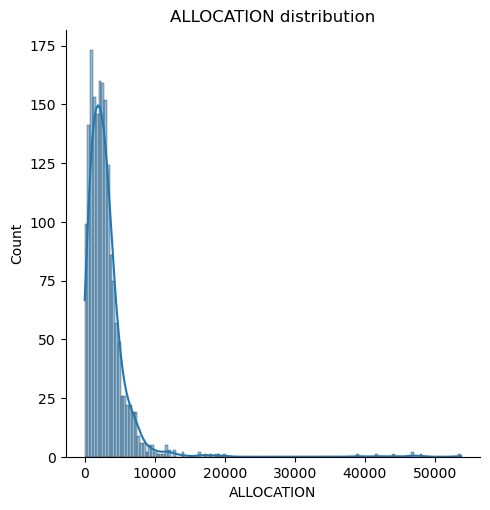

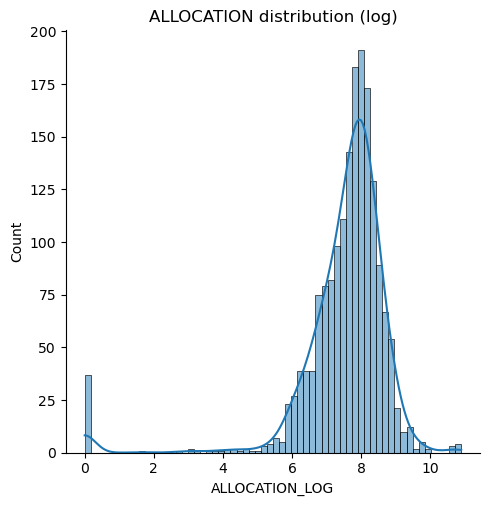

In [181]:
# plot ALLOCATION column (histogram) and show the distribution

# adding a new column to the dataframe
# the new column is the log of the ALLOCATION column

# to avoid a nans in the new column we will replace all the 0 values in the ALLOCATION column with 1
cleaned_df["ALLOCATION"] = cleaned_df["ALLOCATION"].replace(0, 1)
cleaned_df["ALLOCATION_LOG"] = np.log(cleaned_df["ALLOCATION"])


sn.displot(cleaned_df["ALLOCATION"], kde=True, rug=False).set(title="ALLOCATION distribution")
sn.displot(cleaned_df["ALLOCATION_LOG"], kde=True, rug=False).set(title="ALLOCATION distribution (log)")

## Other Covariates

## Notes
* Maybe MAJORITY and JEWISH are equivalent.

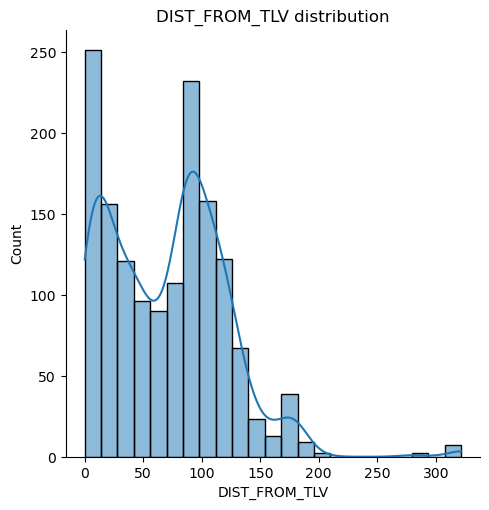

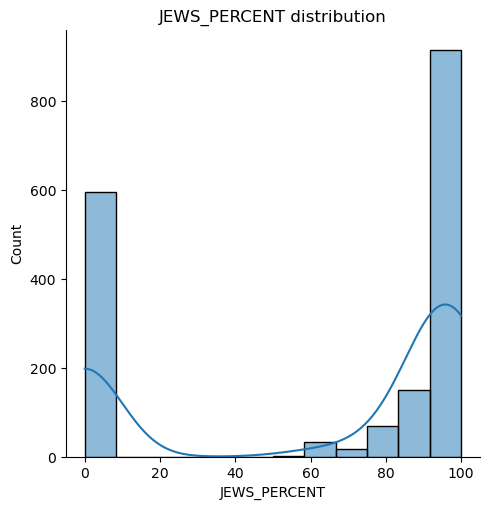

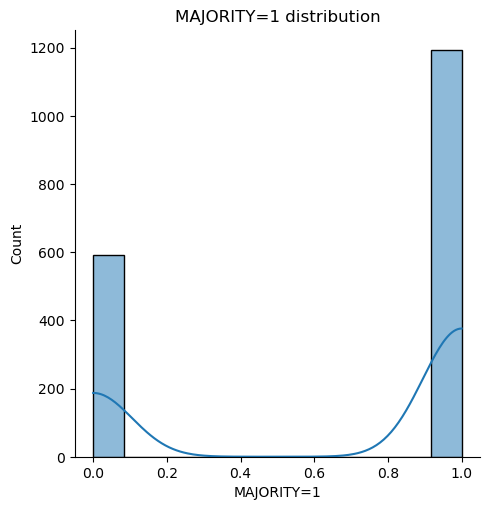

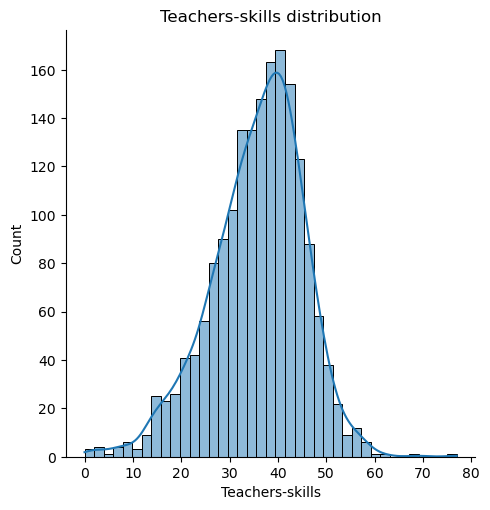

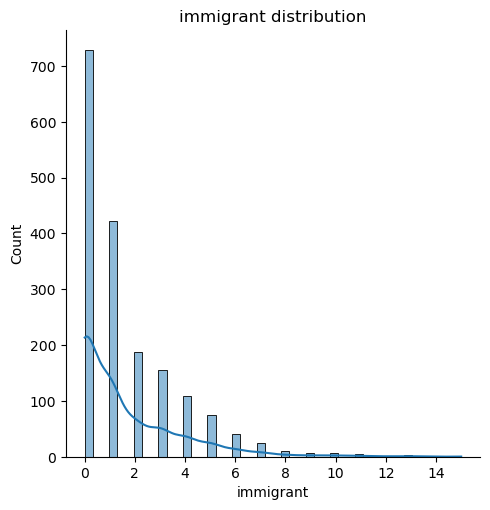

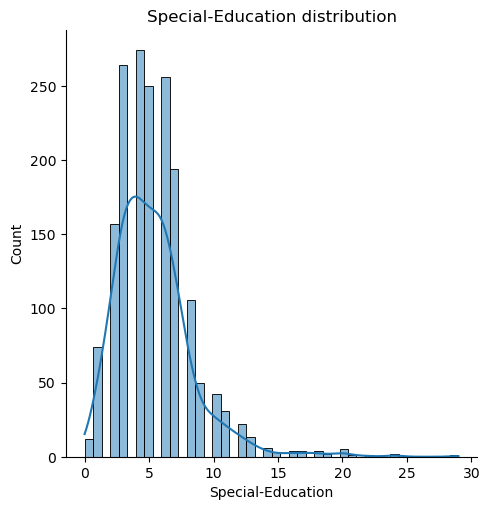

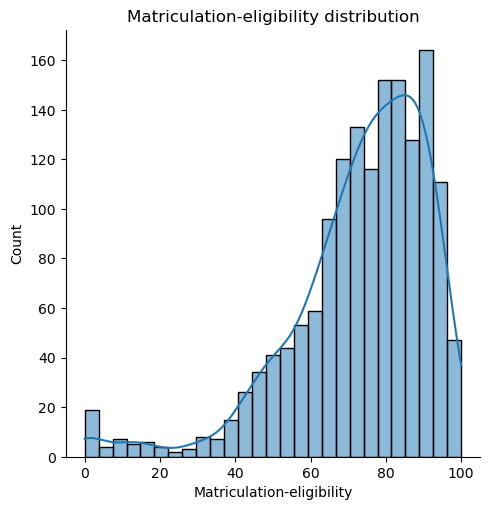

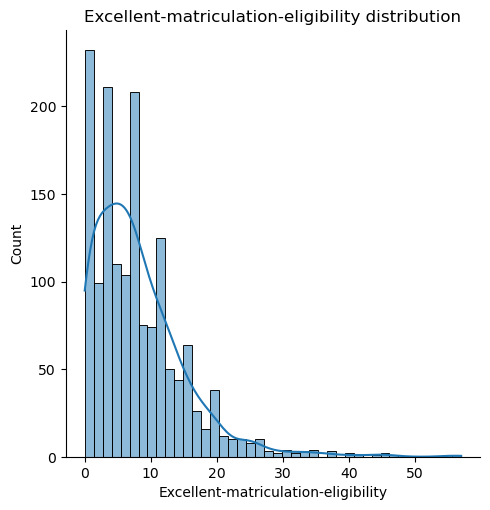

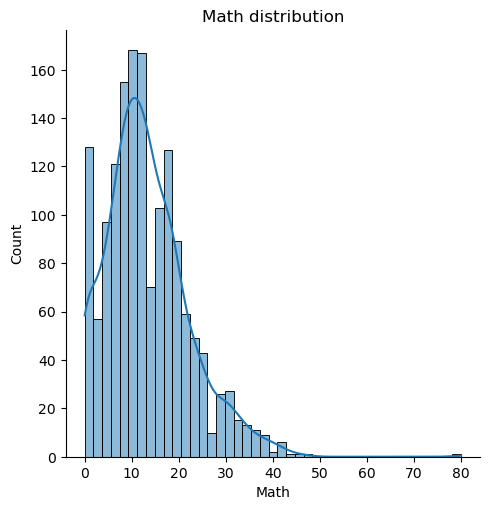

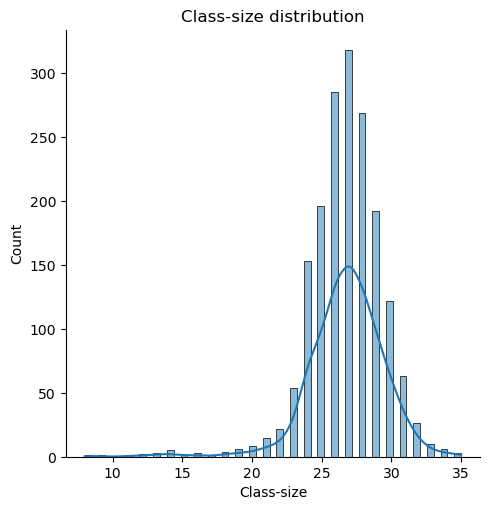

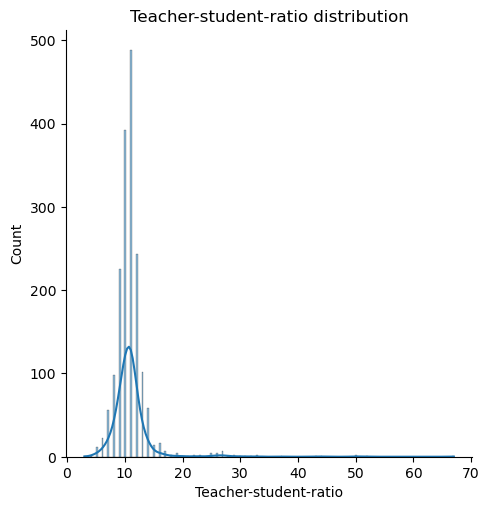

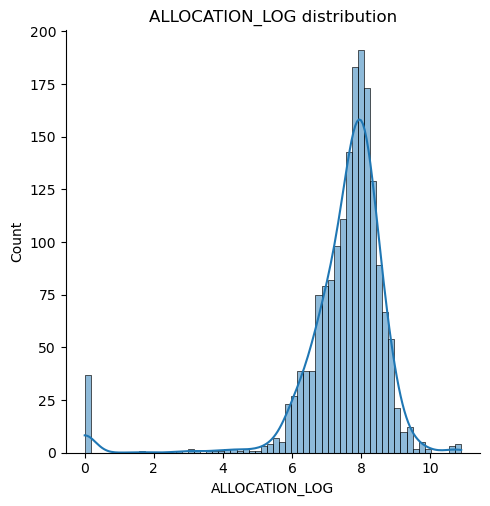

In [182]:
for col in cleaned_df.columns[cleaned_df.columns.tolist().index("DIST_FROM_TLV"):]:
    sn.displot(cleaned_df[col], kde=True, rug=False).set(title=col + " distribution")

## Teachers-skills

As we can see, the teachers-skills is a perfect normal distribution.
Is that also true when considering the DIST-FROM-TLV?

[Text(0.5, 1.0, 'Teachers-skills as a function of DIST_FROM_TLV')]

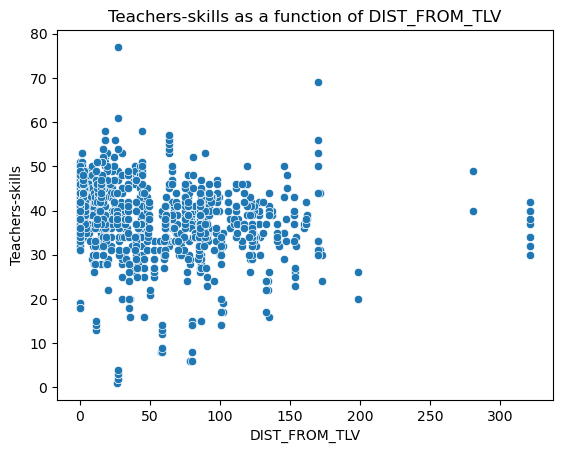

In [183]:
# Teachers-skills as a function of DIST_FROM_TLV
sn.scatterplot(data=cleaned_df[cleaned_df.JEWISH == 1], x="DIST_FROM_TLV", y="Teachers-skills").set(title="Teachers-skills as a function of DIST_FROM_TLV")


Apperently, the distribution of the teachers-skils is not the same for the different distances from Tel-Aviv.
This may be due to the fact the 100km from TLV is not the same to the north as it is to the south.

# Saving

In [184]:
cleaned_df.columns

Index(['RASHUT', 'ID', 'SES', 'PERIPH', 'JEWISH', 'ALLOCATION', 'YEAR',
       'YEAR_2014=ref.', 'DIST_FROM_TLV', 'JEWS_PERCENT', 'MAJORITY=1',
       'Teachers-skills', 'immigrant', 'Special-Education',
       'Matriculation-eligibility', 'Excellent-matriculation-eligibility',
       'Math', 'Class-size', 'Teacher-student-ratio', 'ALLOCATION_LOG'],
      dtype='object')

In [185]:
# save cleaned dataframe to csv
cleaned_df = cleaned_df.drop(["ALLOCATION", "MAJORITY=1", "YEAR_2014=ref."], axis=1)
cleaned_df.to_csv("cleaned-dataset.csv", index=False)